# * HOUSING: PRICE PREDICTION

# Problem Statement:

# Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

# A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

# The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

* Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

# Business Goal:

# You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


# Technical Requirements:

In [1]:
# import neccessary Liabries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\yjjai\Downloads\Project-Housing--2---1---1-\Project-Housing_splitted\train.csv")

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [5]:
# let's check the shape of data
df.shape

(1168, 81)

So , here we have 1168 rows and 81 columns

# Data is Duplicated ?

In [6]:
df.duplicated().sum()

0

In [7]:
# let's check the data type of dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

 only 3 columns are float64

Then All column are int64 and object


In [9]:
# Missing Values
pd.set_option('display.max_rows', 500)
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# Dropped the columns are more then 500 columns are Null Values
df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],inplace=True,axis=1)

# Exploratory Data Analysis: Univarient

In [11]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']


print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 38
Number of Continuous features: 38


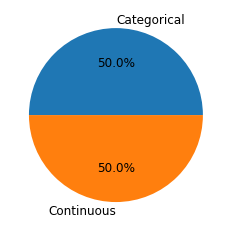

In [12]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')
plt.show()

# Value count Function

In [13]:
df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [14]:
df['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [15]:
df['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [16]:
df['GarageYrBlt'].value_counts()

2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
1998.0    25
1977.0    24
1999.0    23
2002.0    23
2008.0    21
1993.0    20
1976.0    20
2009.0    18
1962.0    18
1968.0    18
2000.0    18
1957.0    18
1966.0    18
1950.0    18
2001.0    18
1958.0    17
1965.0    17
1974.0    17
1997.0    17
1995.0    17
1960.0    16
1994.0    15
1959.0    14
1970.0    14
1978.0    14
1990.0    14
1954.0    14
1969.0    14
1963.0    13
1996.0    13
1961.0    13
1956.0    13
1964.0    13
1955.0    12
1988.0    12
1971.0    12
1980.0    12
1920.0    12
1940.0    12
1979.0    11
1981.0    10
1967.0    10
1992.0    10
1973.0    10
1953.0     9
1948.0     9
1972.0     9
1985.0     9
1989.0     8
1987.0     8
1975.0     8
1949.0     7
1983.0     7
1991.0     7
1941.0     7
1925.0     7
1986.0     6
1939.0     6
1930.0     6
1936.0     5
1951.0     5
1984.0     4
1935.0     4
1916.0     4
1926.0     4
1945.0     4
1946.0     4
1952.0     3
1922.0     3
1923.0     3
1932.0     3
1982.0     3

In [17]:
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [18]:
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [19]:
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [20]:
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [21]:
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [22]:
df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [23]:
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [24]:
df['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0       7
35.0       7
95.0       7
62.0       7
61.0       7
94.0       6
54.0       6
44.0       6
96.0       6
81.0       6
120.0      6
98.0       6
41.0       6
107.0      5
87.0       5
30.0       5
36.0       5
105.0      5
89.0       5
58.0       5
93.0       5
91.0       4
49.0       4
83.0       3
103.0      3
110.0      3
130.0      3
48.0       3
99.0       3
104.0      3
108.0      3
56.0       3
47.0       3
32.0       3
37.0       3
116.0      2
121.0      2
109.0      2
313.0      2

# Fill The Null Values

In [25]:
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [26]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [27]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.988470   10484.749144     6.104452   
std     416.159877    41.940650    22.437056    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.988470    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.047152   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [28]:
# Drop UNwanted columns 
df.drop(['Id'],inplace=True,axis=1)

# EXPLORATORY DATA ANALYSIS (EDA)

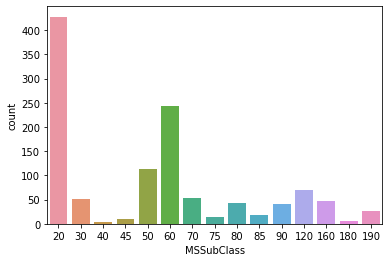

In [29]:
sns.countplot(x='MSSubClass',data=df)
plt.show()

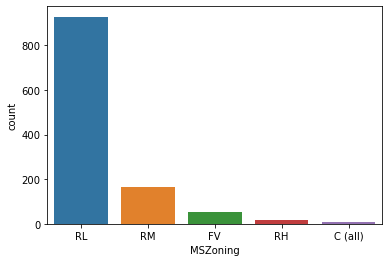

In [30]:
sns.countplot(x='MSZoning',data=df)
plt.show()

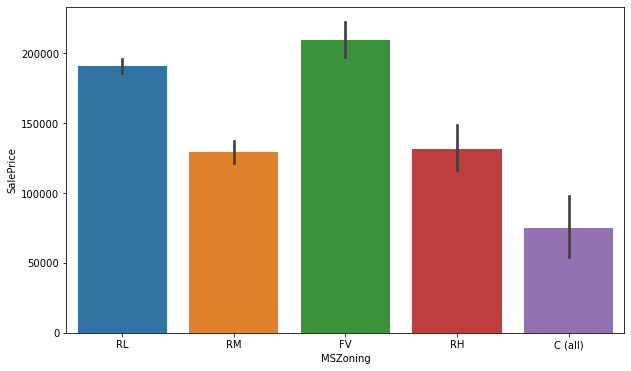

In [31]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="MSZoning",y="SalePrice",data=df_good)
plt.show()

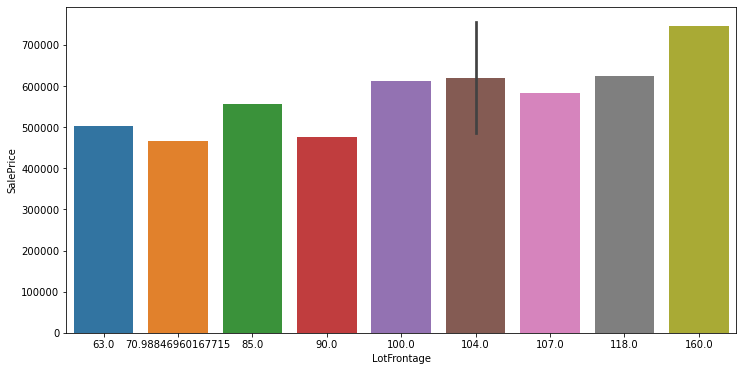

In [32]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="LotFrontage",y="SalePrice",data=df_good)
plt.show()

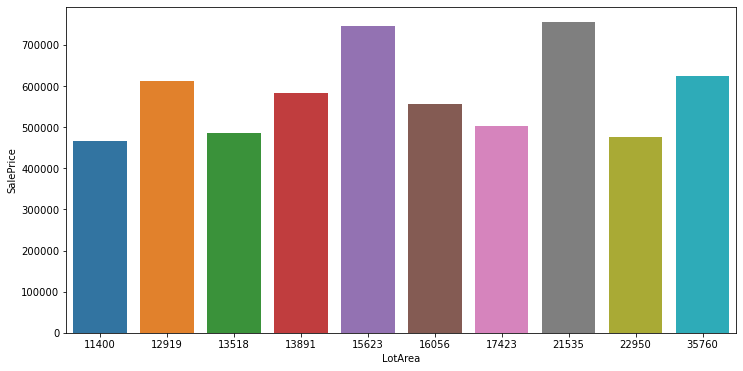

In [33]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="LotArea",y="SalePrice",data=df_good)
plt.show()

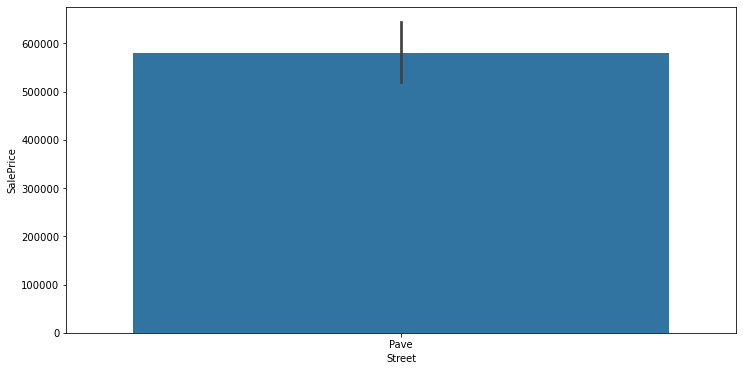

In [34]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="Street",y="SalePrice",data=df_good)
plt.show()

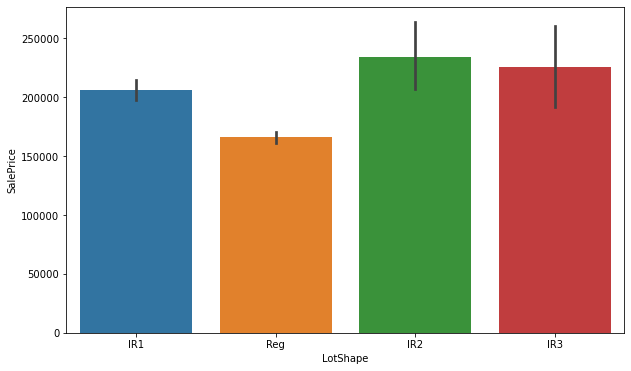

In [35]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="LotShape",y="SalePrice",data=df_good)
plt.show()

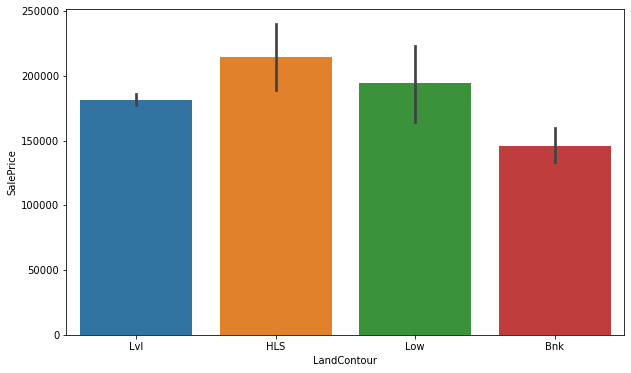

In [36]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="LandContour",y="SalePrice",data=df_good)
plt.show()

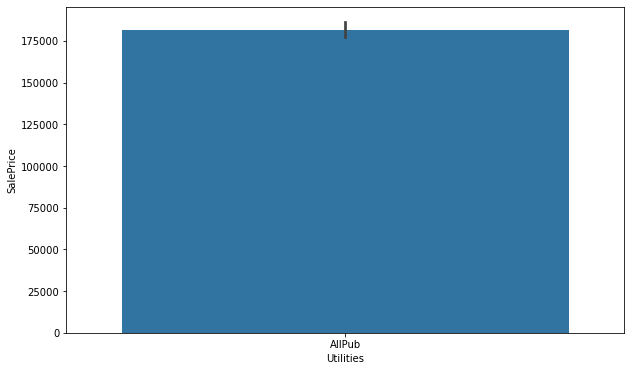

In [37]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Utilities",y="SalePrice",data=df_good)
plt.show()

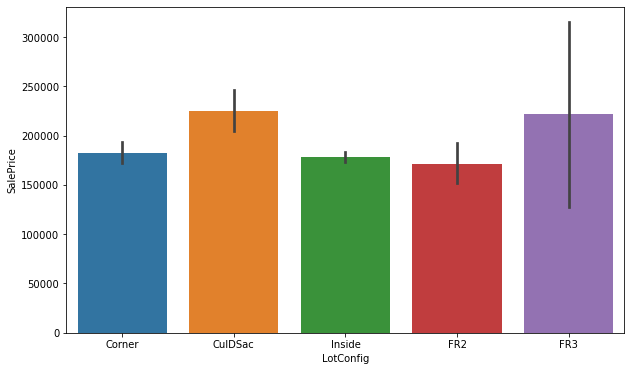

In [38]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="LotConfig",y="SalePrice",data=df_good)
plt.show()

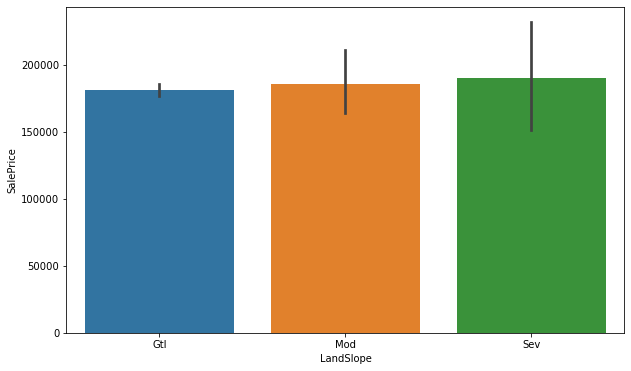

In [39]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="LandSlope",y="SalePrice",data=df_good)
plt.show()

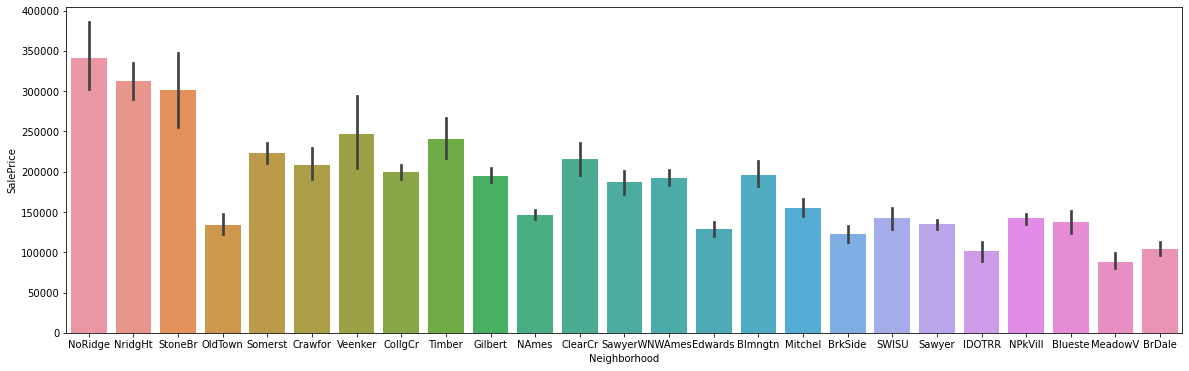

In [40]:
plt.figure(figsize=(20,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Neighborhood",y="SalePrice",data=df_good)
plt.show()

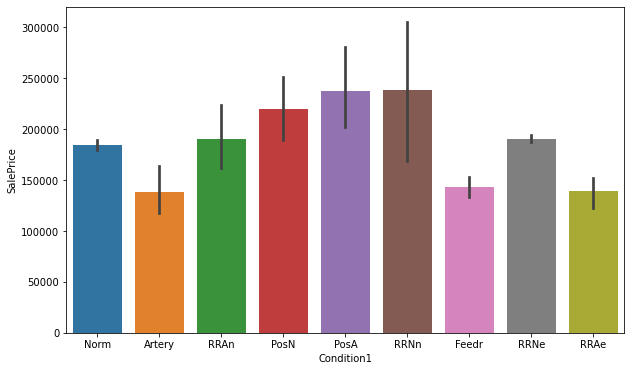

In [41]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Condition1",y="SalePrice",data=df_good)
plt.show()

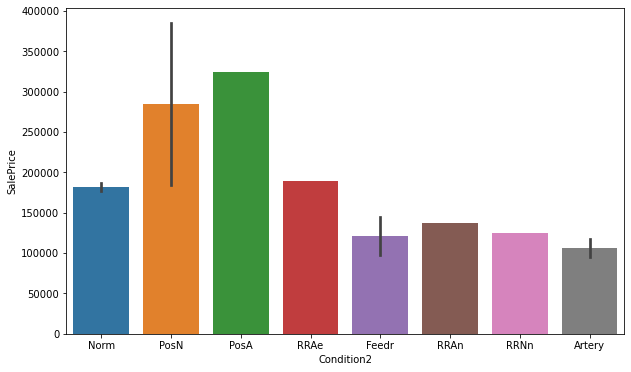

In [42]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Condition2",y="SalePrice",data=df_good)
plt.show()

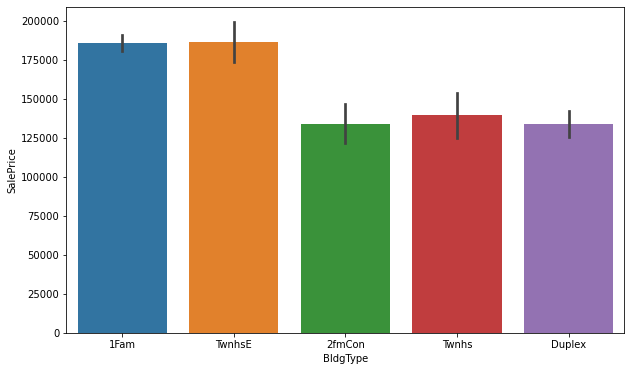

In [43]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BldgType",y="SalePrice",data=df_good)
plt.show()

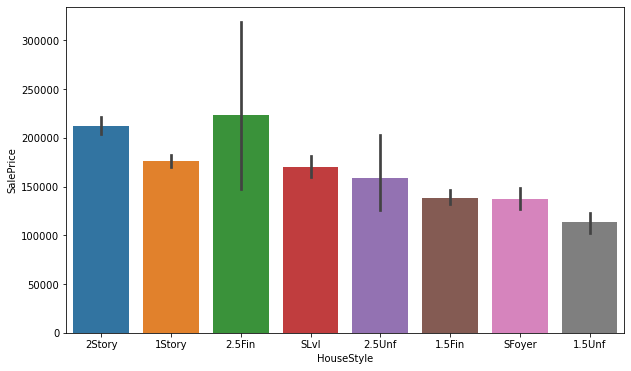

In [44]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="HouseStyle",y="SalePrice",data=df_good)
plt.show()

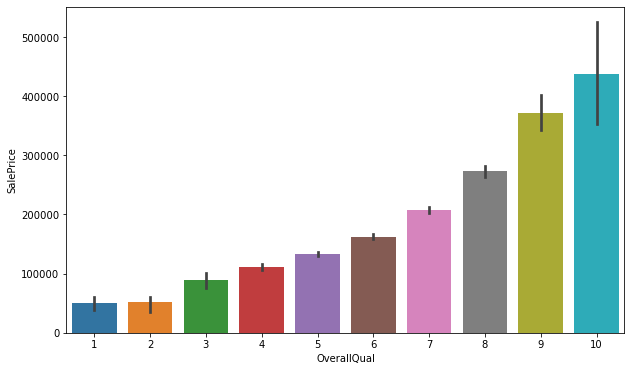

In [45]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="OverallQual",y="SalePrice",data=df_good)
plt.show()

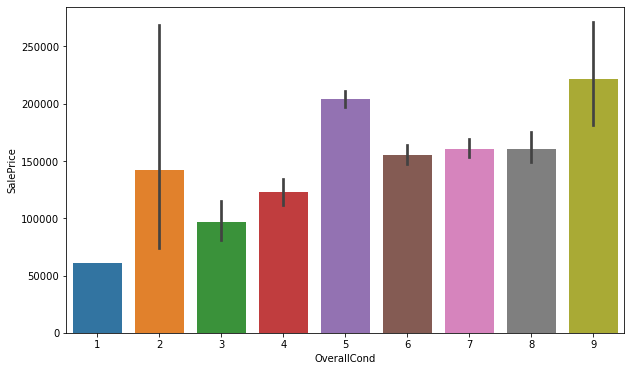

In [46]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="OverallCond",y="SalePrice",data=df_good)
plt.show()

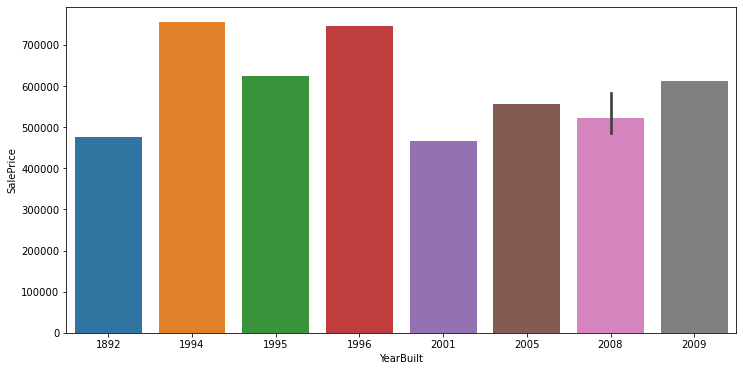

In [47]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="YearBuilt",y="SalePrice",data=df_good)
plt.show()

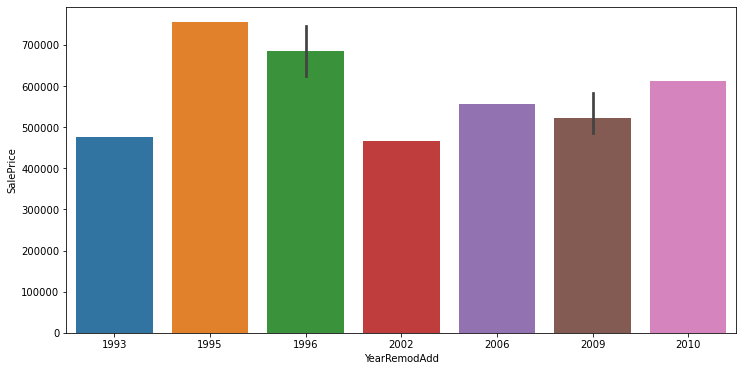

In [48]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="YearRemodAdd",y="SalePrice",data=df_good)
plt.show()

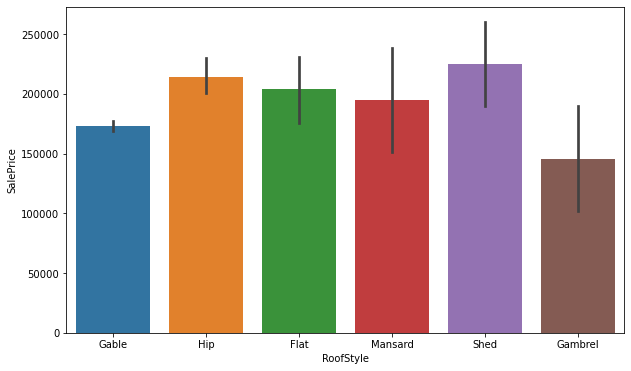

In [49]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="RoofStyle",y="SalePrice",data=df_good)
plt.show()

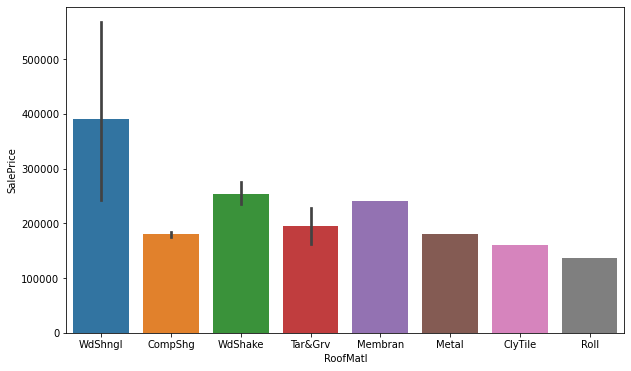

In [50]:
plt.figure(figsize=(10,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="RoofMatl",y="SalePrice",data=df_good)
plt.show()

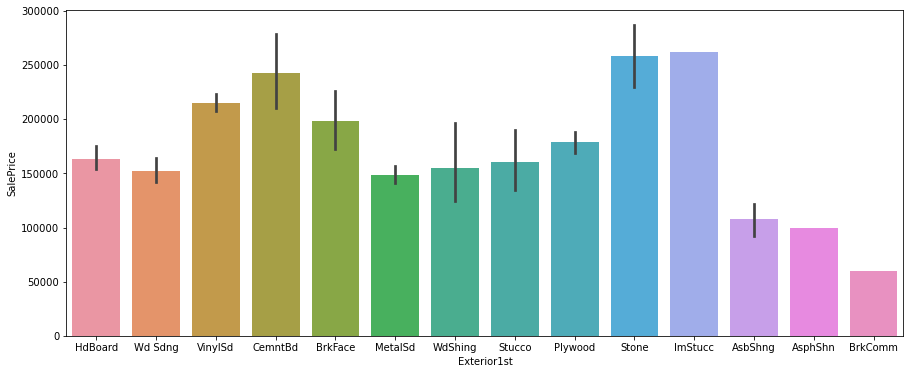

In [51]:
plt.figure(figsize=(15,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Exterior1st",y="SalePrice",data=df_good)
plt.show()

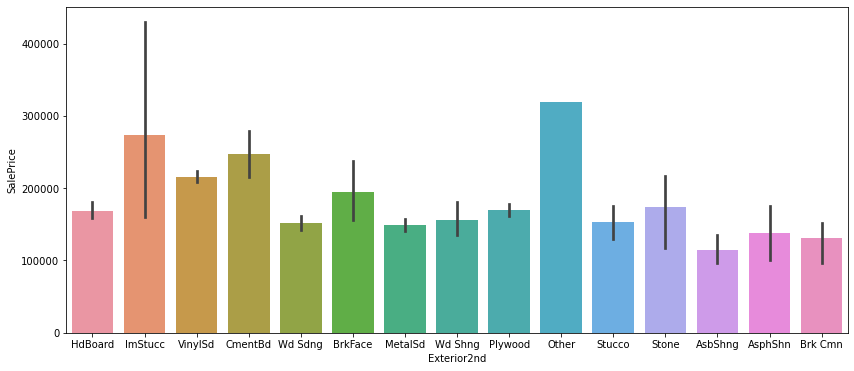

In [52]:
plt.figure(figsize=(14,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Exterior2nd",y="SalePrice",data=df_good)
plt.show()

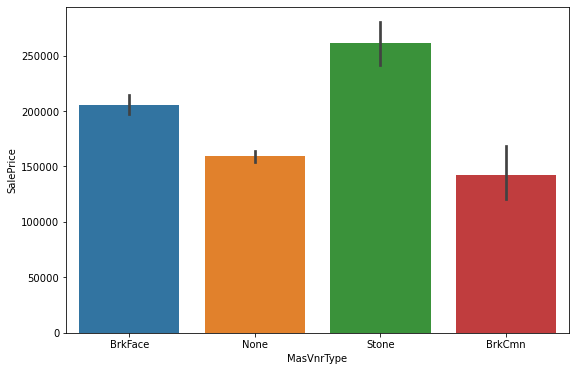

In [53]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="MasVnrType",y="SalePrice",data=df_good)
plt.show()

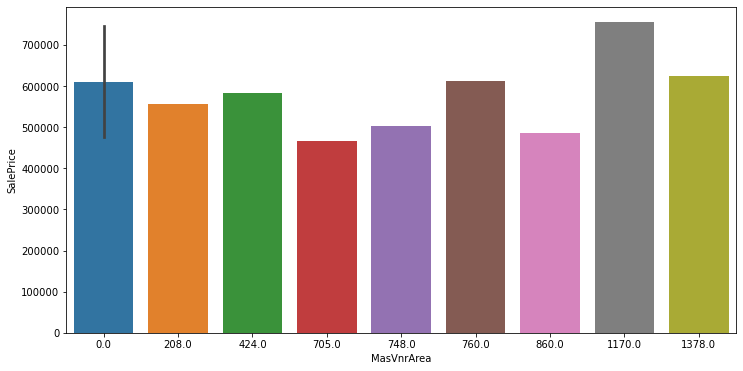

In [54]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="MasVnrArea",y="SalePrice",data=df_good)
plt.show()

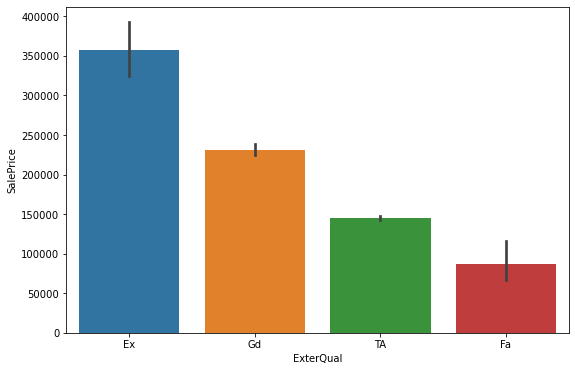

In [55]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="ExterQual",y="SalePrice",data=df_good)
plt.show()

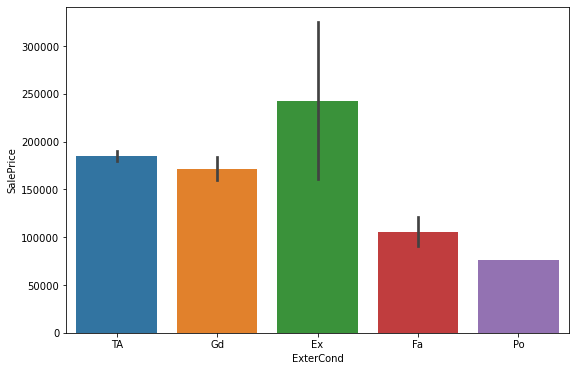

In [56]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="ExterCond",y="SalePrice",data=df_good)
plt.show()

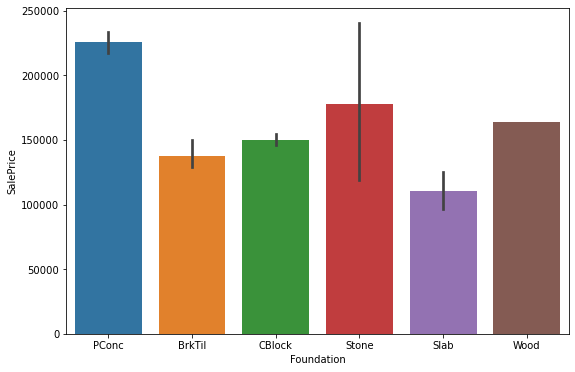

In [57]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Foundation",y="SalePrice",data=df_good)
plt.show()

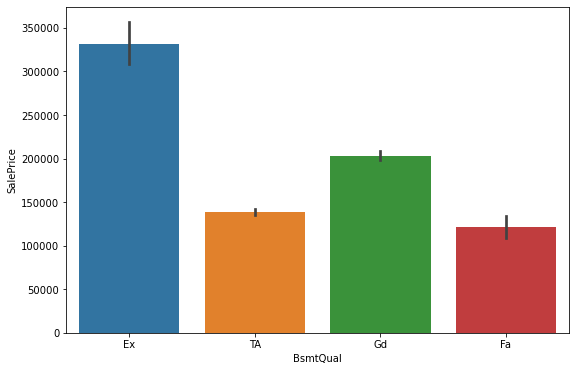

In [58]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BsmtQual",y="SalePrice",data=df_good)
plt.show()

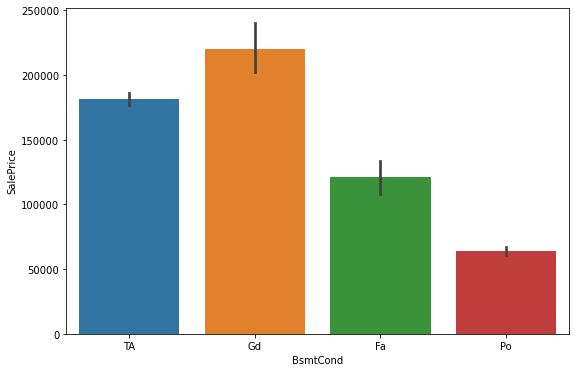

In [59]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BsmtCond",y="SalePrice",data=df_good)
plt.show()

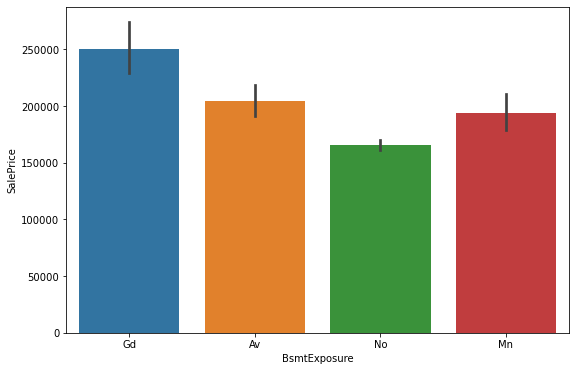

In [60]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BsmtExposure",y="SalePrice",data=df_good)
plt.show()

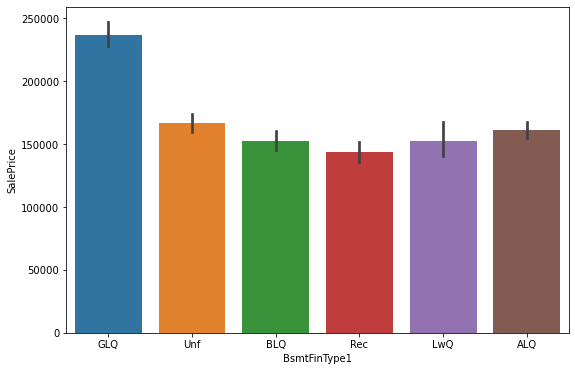

In [61]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BsmtFinType1",y="SalePrice",data=df_good)
plt.show()

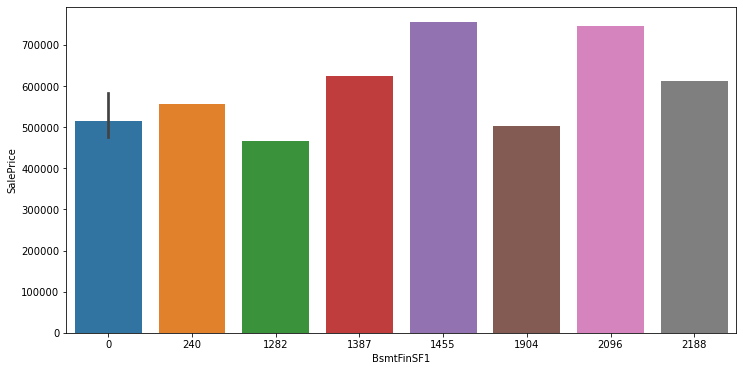

In [62]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="BsmtFinSF1",y="SalePrice",data=df_good)
plt.show()

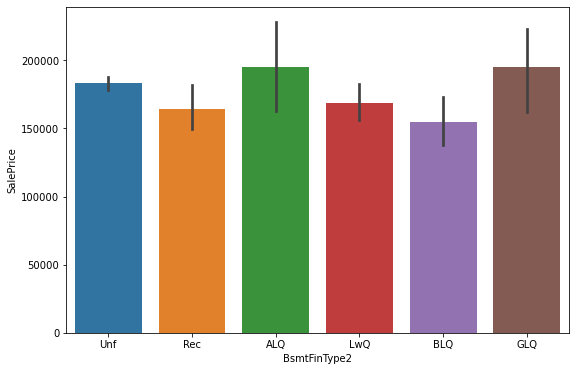

In [63]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BsmtFinType2",y="SalePrice",data=df_good)
plt.show()

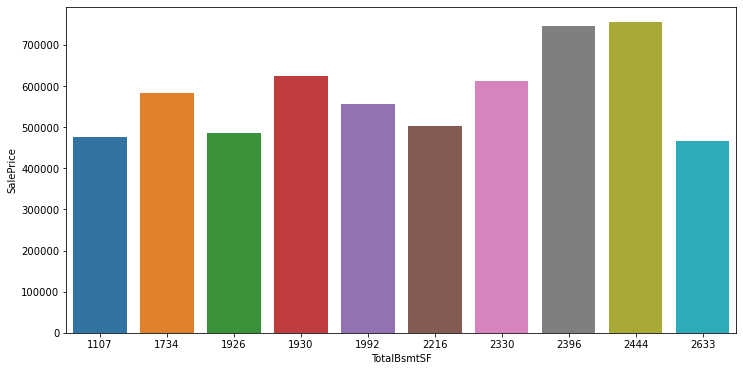

In [64]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="TotalBsmtSF",y="SalePrice",data=df_good)
plt.show()

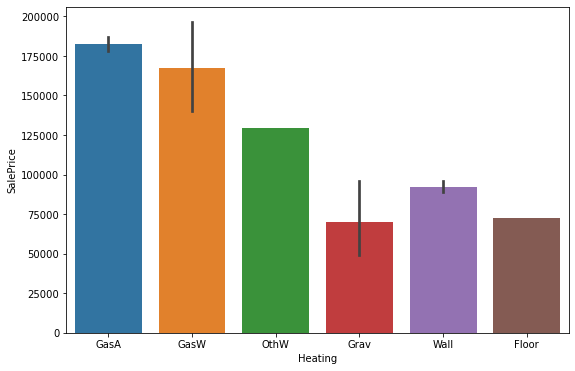

In [65]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Heating",y="SalePrice",data=df_good)
plt.show()

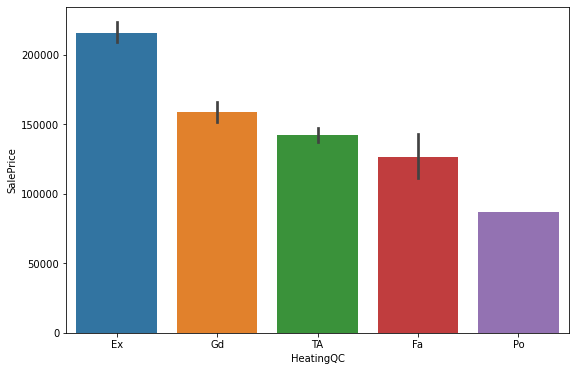

In [66]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="HeatingQC",y="SalePrice",data=df_good)
plt.show()

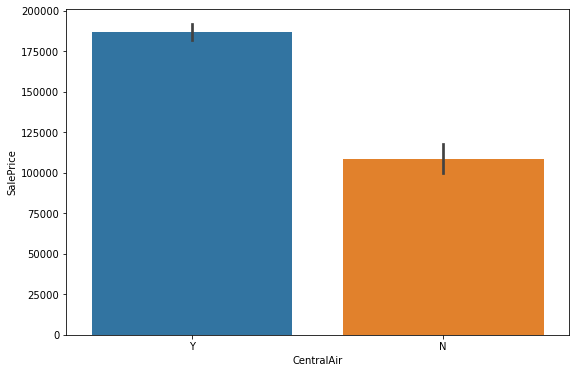

In [67]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="CentralAir",y="SalePrice",data=df_good)
plt.show()

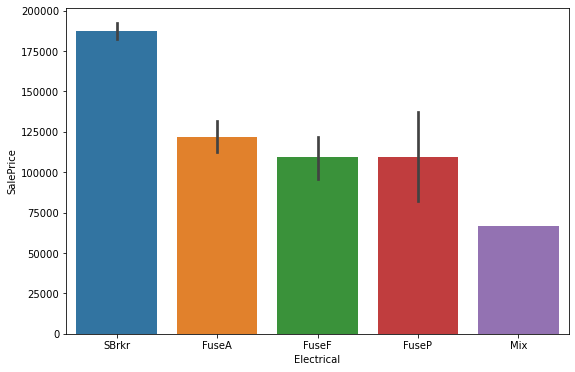

In [68]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Electrical",y="SalePrice",data=df_good)
plt.show()

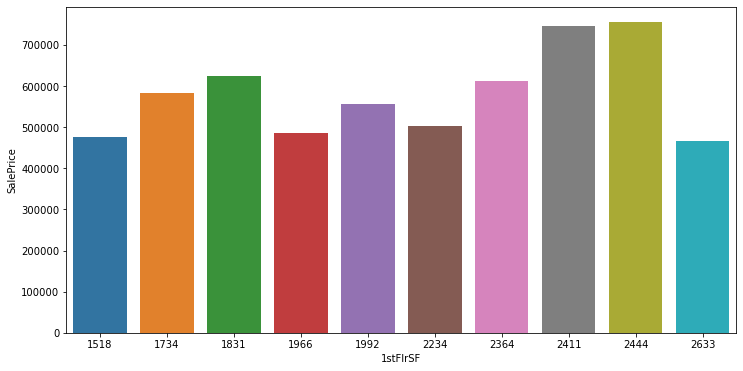

In [69]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="1stFlrSF",y="SalePrice",data=df_good)
plt.show()

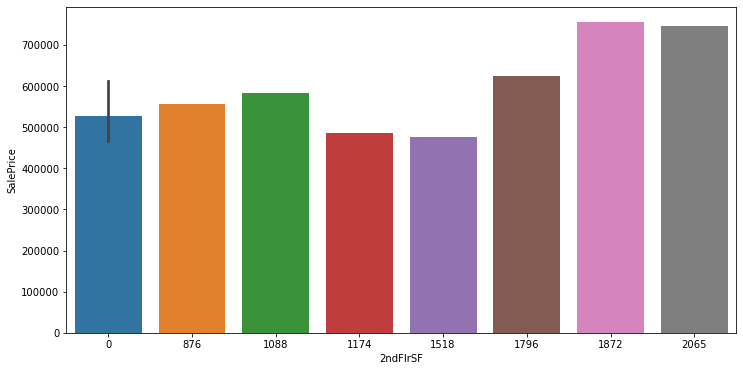

In [70]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="2ndFlrSF",y="SalePrice",data=df_good)
plt.show()

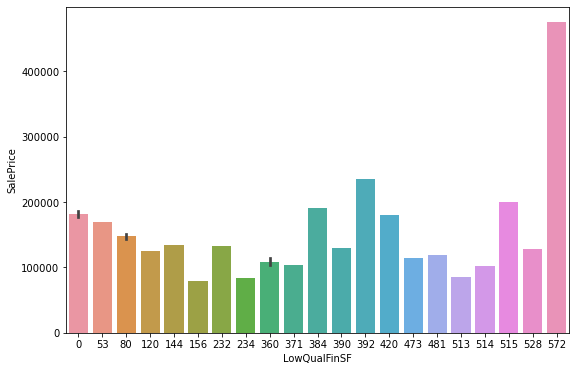

In [71]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="LowQualFinSF",y="SalePrice",data=df_good)
plt.show()

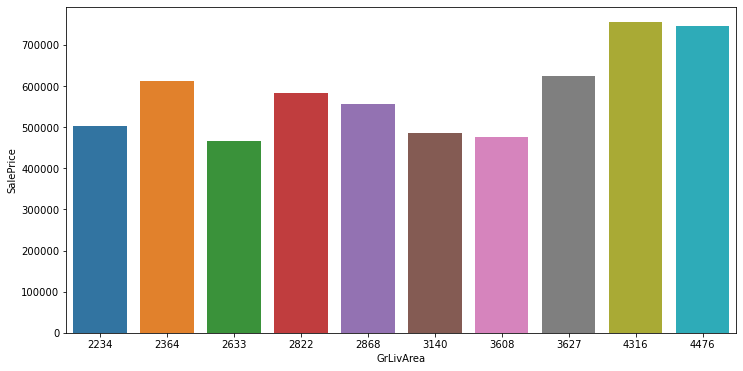

In [72]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="GrLivArea",y="SalePrice",data=df_good)
plt.show()

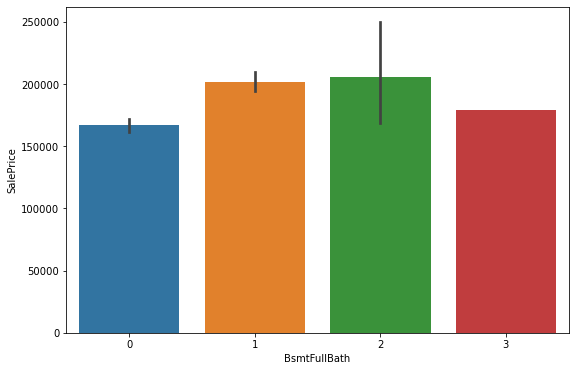

In [73]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BsmtFullBath",y="SalePrice",data=df_good)
plt.show()

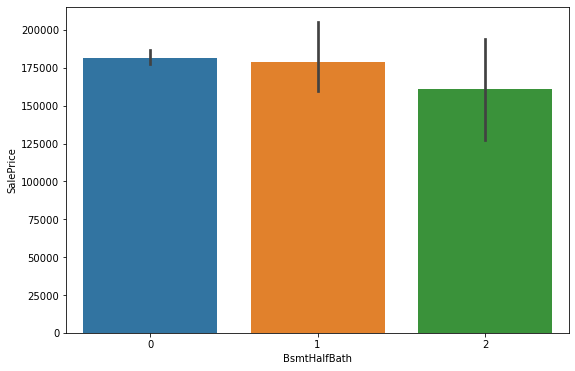

In [74]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BsmtHalfBath",y="SalePrice",data=df_good)
plt.show()

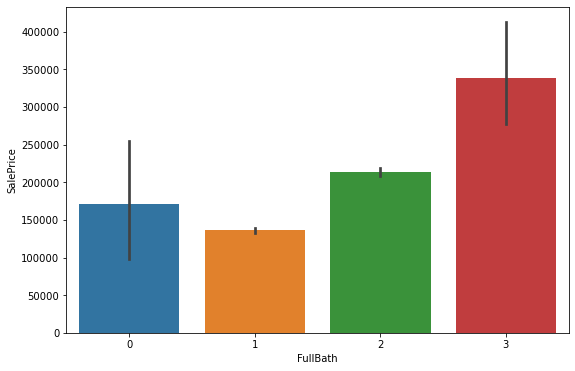

In [75]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="FullBath",y="SalePrice",data=df_good)
plt.show()

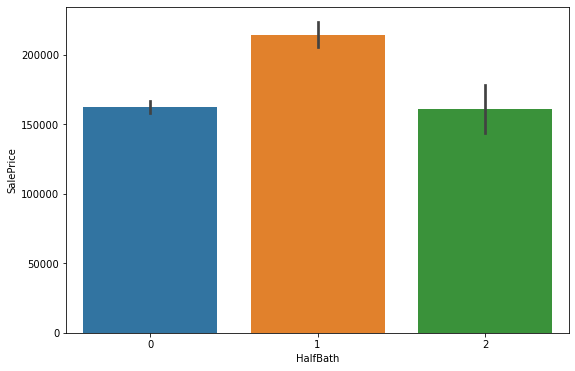

In [76]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="HalfBath",y="SalePrice",data=df_good)
plt.show()

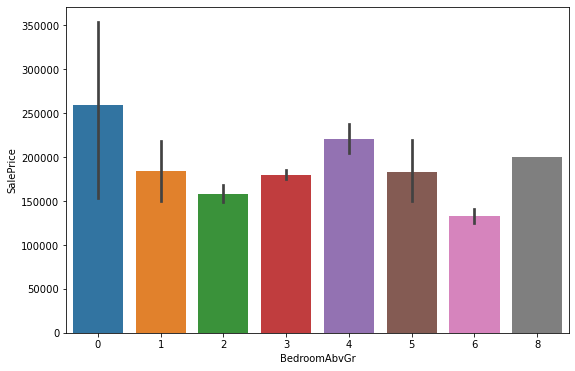

In [77]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="BedroomAbvGr",y="SalePrice",data=df_good)
plt.show()

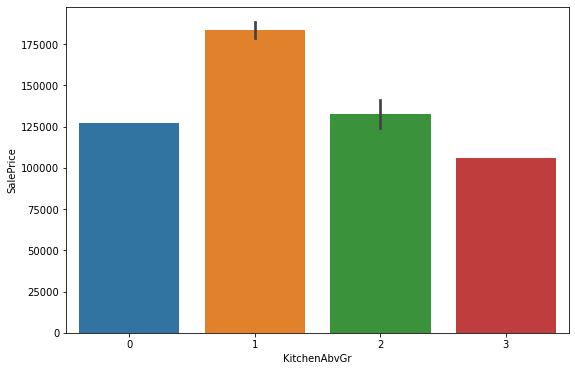

In [78]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="KitchenAbvGr",y="SalePrice",data=df_good)
plt.show()

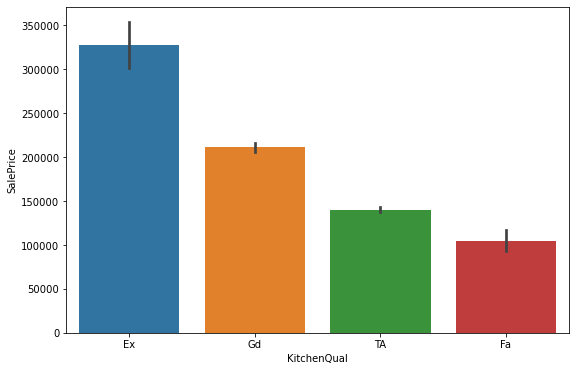

In [79]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="KitchenQual",y="SalePrice",data=df_good)
plt.show()

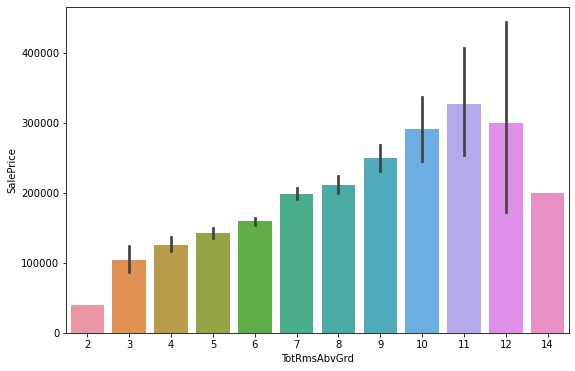

In [80]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="TotRmsAbvGrd",y="SalePrice",data=df_good)
plt.show()

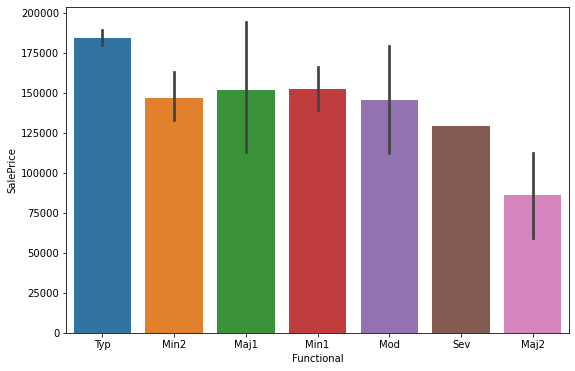

In [81]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Functional",y="SalePrice",data=df_good)
plt.show()

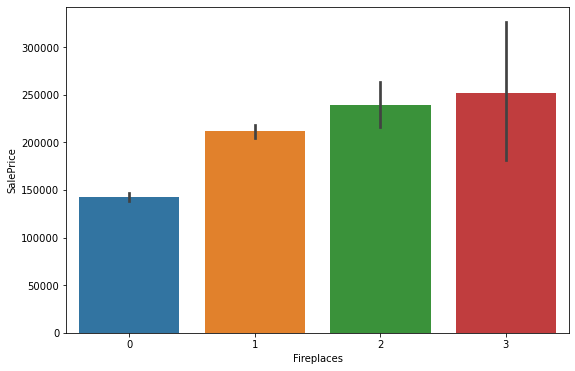

In [82]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="Fireplaces",y="SalePrice",data=df_good)
plt.show()

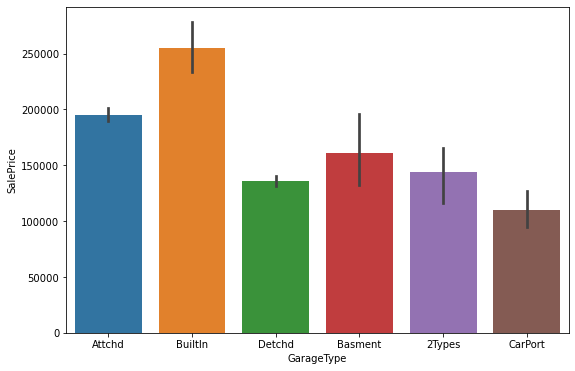

In [83]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="GarageType",y="SalePrice",data=df_good)
plt.show()

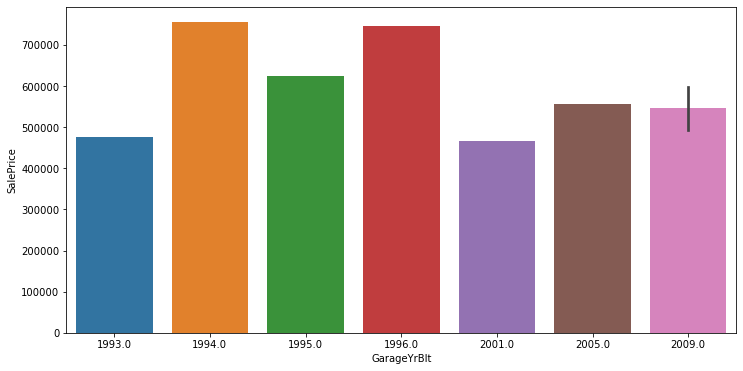

In [84]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="GarageYrBlt",y="SalePrice",data=df_good)
plt.show()

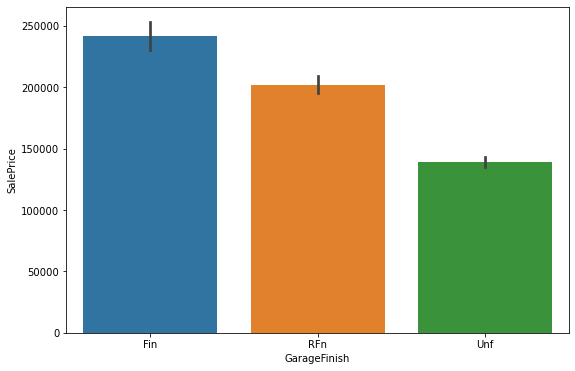

In [85]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="GarageFinish",y="SalePrice",data=df_good)
plt.show()

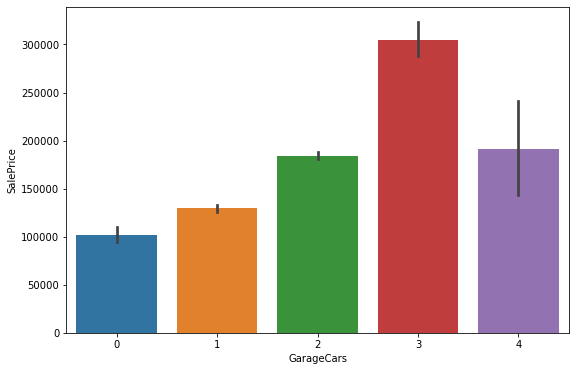

In [86]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="GarageCars",y="SalePrice",data=df_good)
plt.show()

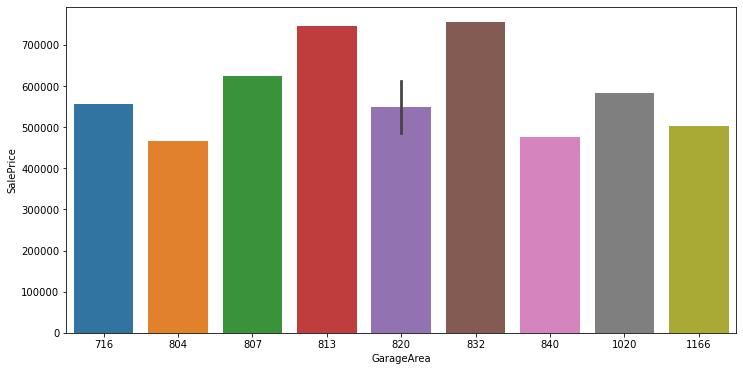

In [87]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="GarageArea",y="SalePrice",data=df_good)
plt.show()

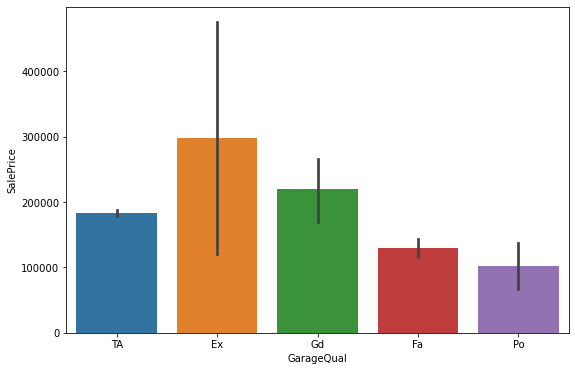

In [88]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="GarageQual",y="SalePrice",data=df_good)
plt.show()

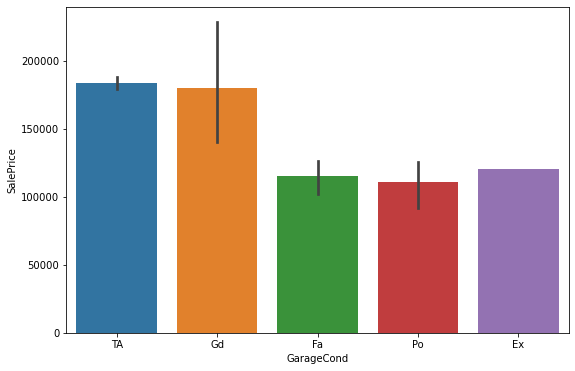

In [89]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="GarageCond",y="SalePrice",data=df_good)
plt.show()

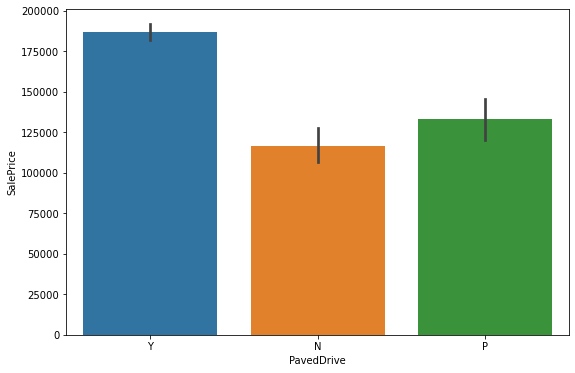

In [90]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="PavedDrive",y="SalePrice",data=df_good)
plt.show()

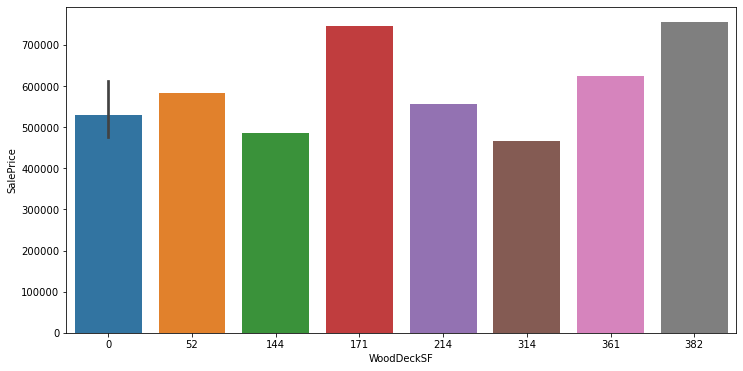

In [91]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="WoodDeckSF",y="SalePrice",data=df_good)
plt.show()

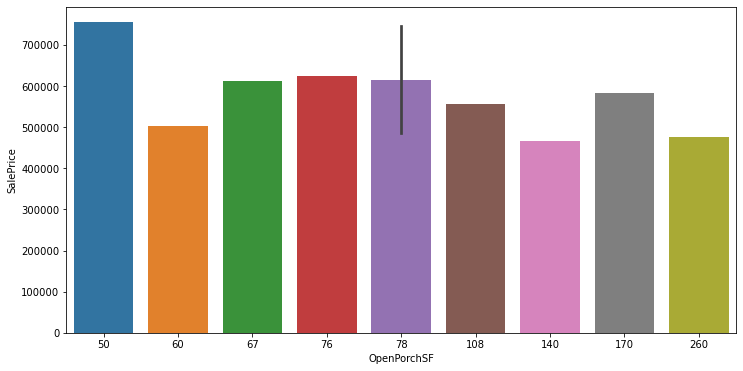

In [92]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="OpenPorchSF",y="SalePrice",data=df_good)
plt.show()

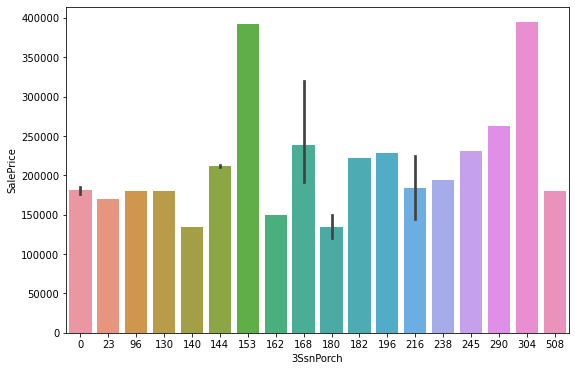

In [93]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="3SsnPorch",y="SalePrice",data=df_good)
plt.show()

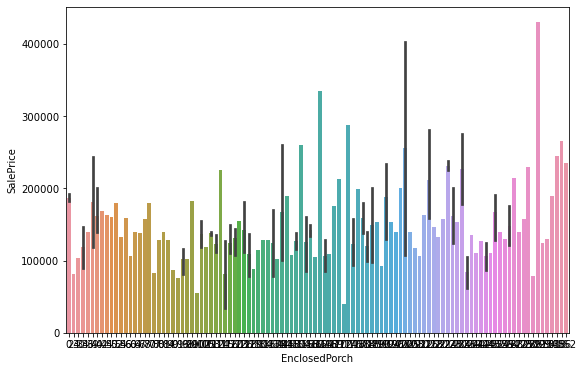

In [94]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="EnclosedPorch",y="SalePrice",data=df_good)
plt.show()

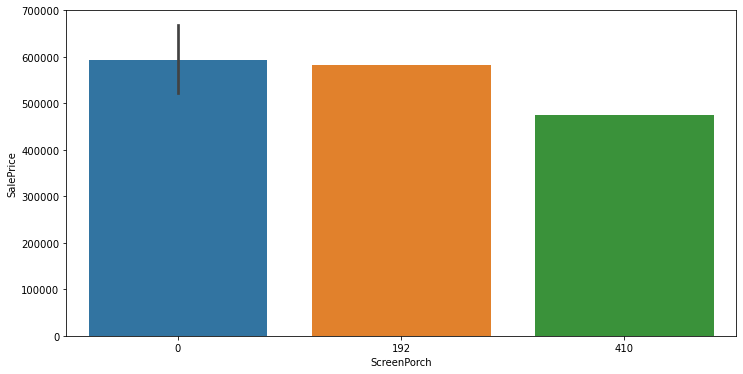

In [95]:
plt.figure(figsize=(12,6))
df_good = df.sort_values(by="SalePrice",ascending=False).iloc[0:10]
sns.barplot(x="ScreenPorch",y="SalePrice",data=df_good)
plt.show()

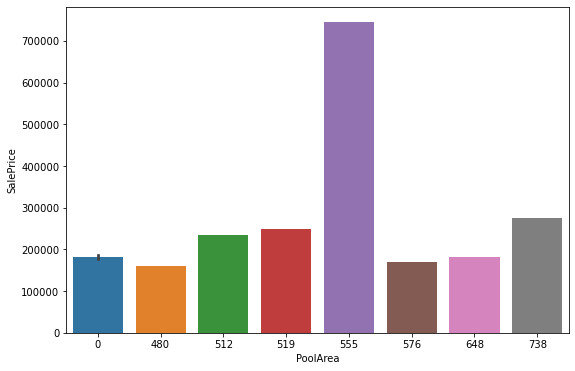

In [96]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="PoolArea",y="SalePrice",data=df_good)
plt.show()

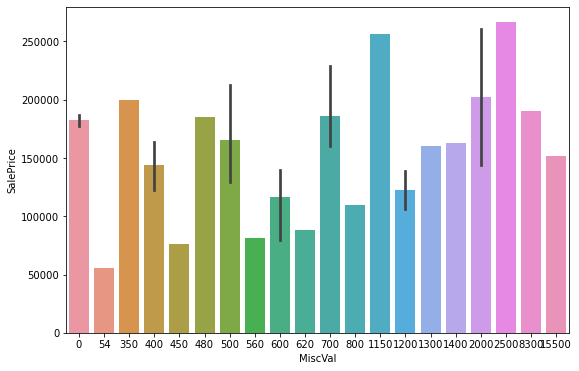

In [97]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="MiscVal",y="SalePrice",data=df_good)
plt.show()

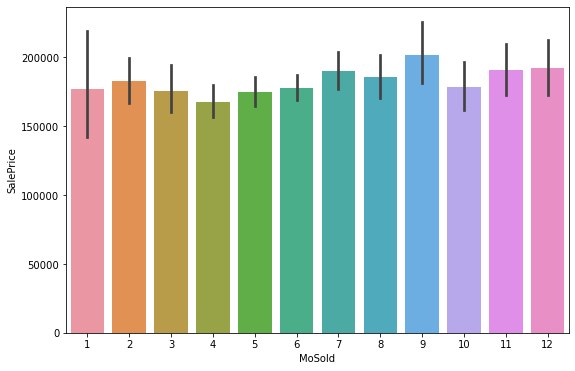

In [98]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="MoSold",y="SalePrice",data=df_good)
plt.show()

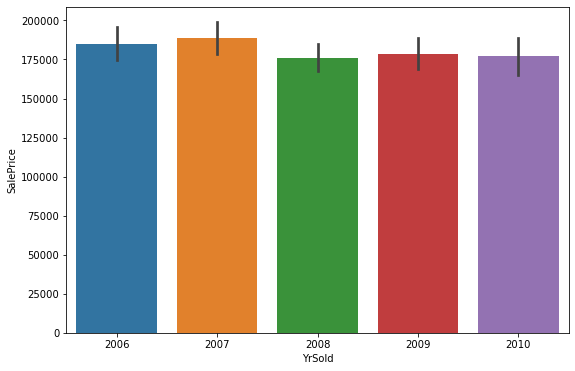

In [99]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="YrSold",y="SalePrice",data=df_good)
plt.show()

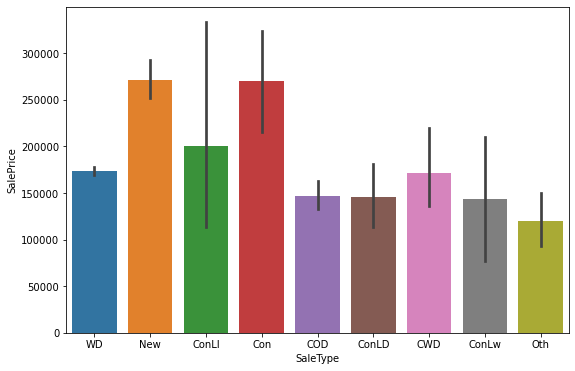

In [100]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="SaleType",y="SalePrice",data=df_good)
plt.show()

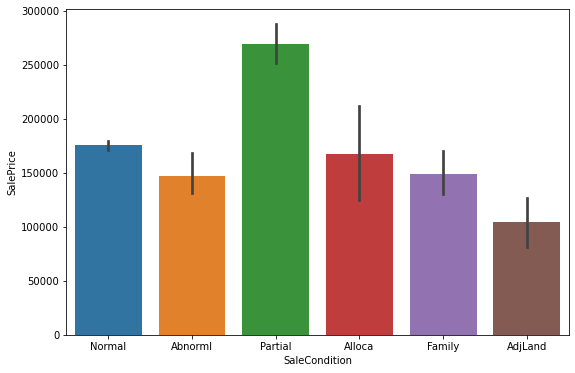

In [101]:
plt.figure(figsize=(9,6))
df_good = df.sort_values(by="SalePrice",ascending=False)
sns.barplot(x="SaleCondition",y="SalePrice",data=df_good)
plt.show()

In [102]:
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',  'Heating','HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
        'Functional',  'GarageType','GarageFinish', 'GarageQual','GarageCond', 'PavedDrive',  'SaleType',
       'SaleCondition']

In [103]:
l = list(df.columns)
continous_columns=[]
for i in l:
    if(i not in categorical_columns):
        continous_columns.append(i)

In [104]:
print(continous_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [105]:
len(continous_columns)

37

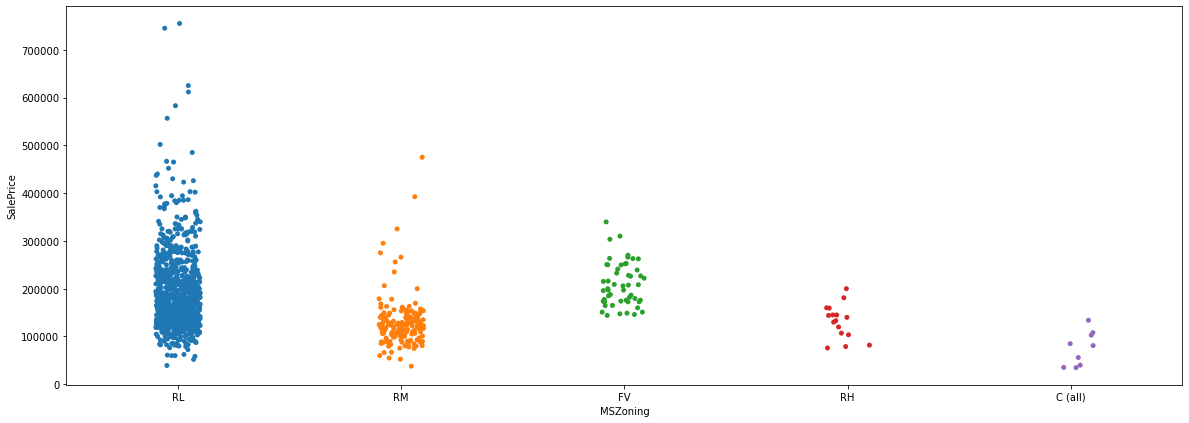

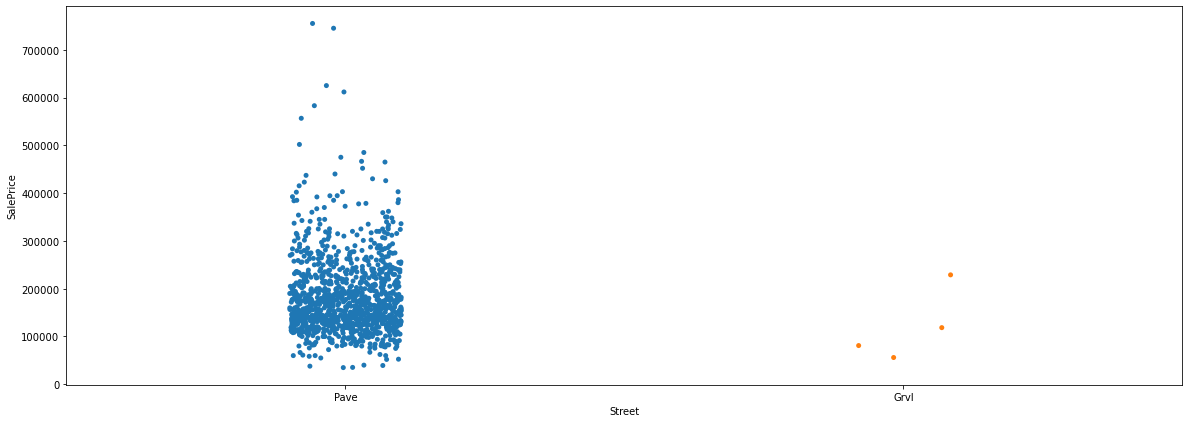

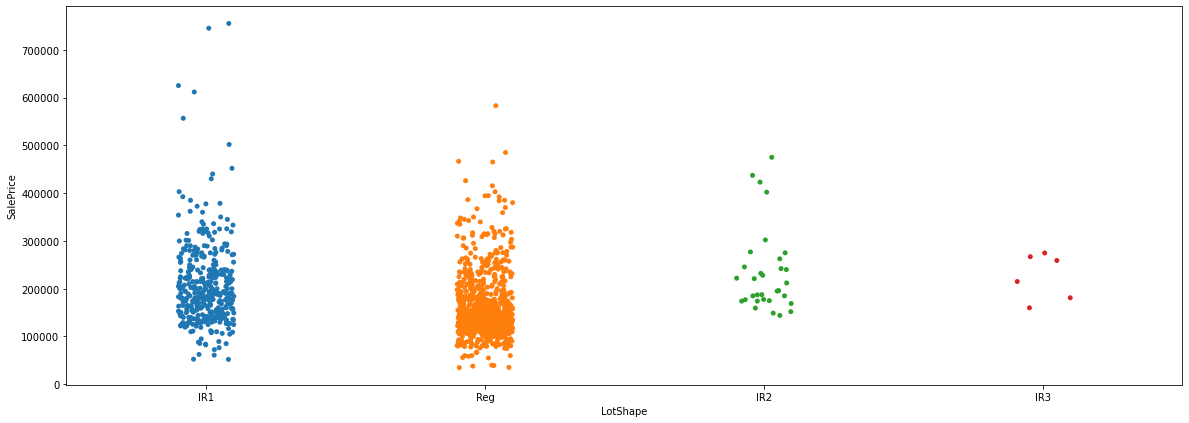

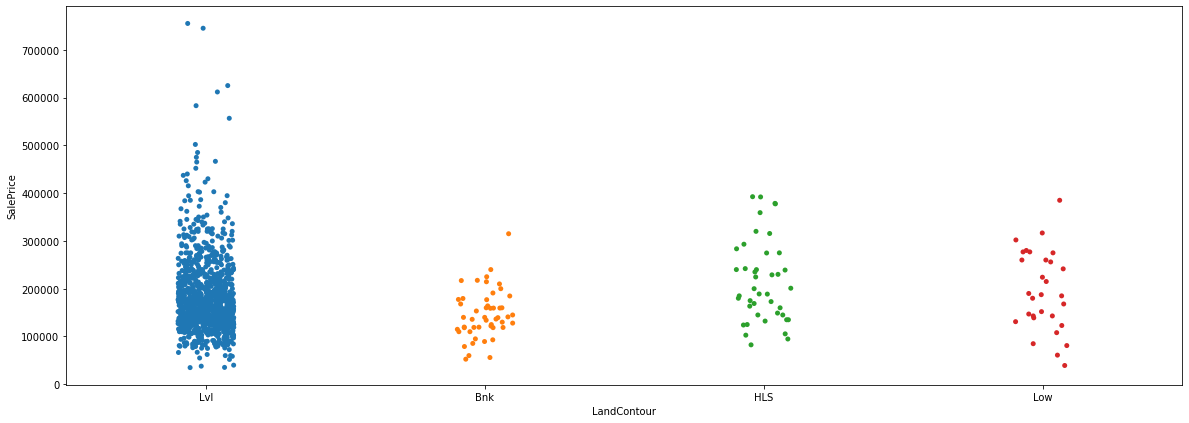

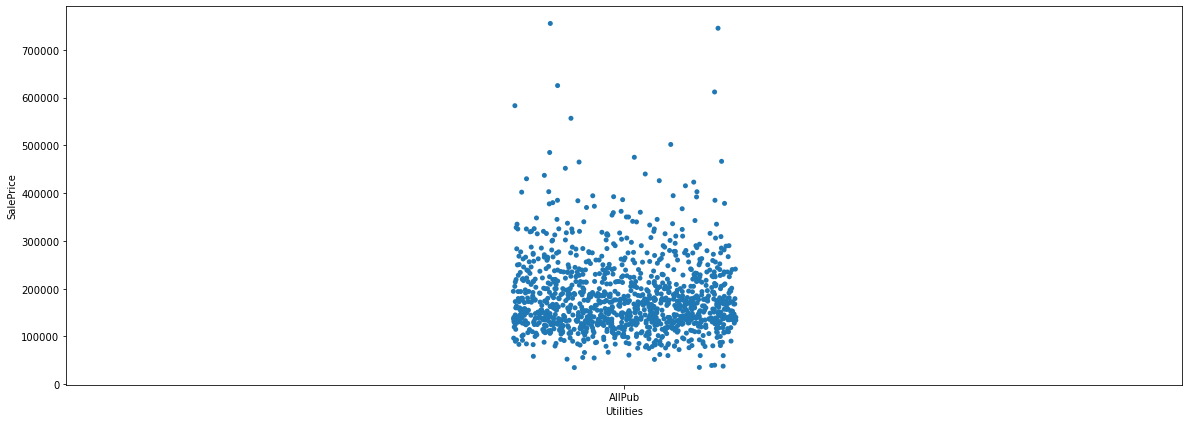

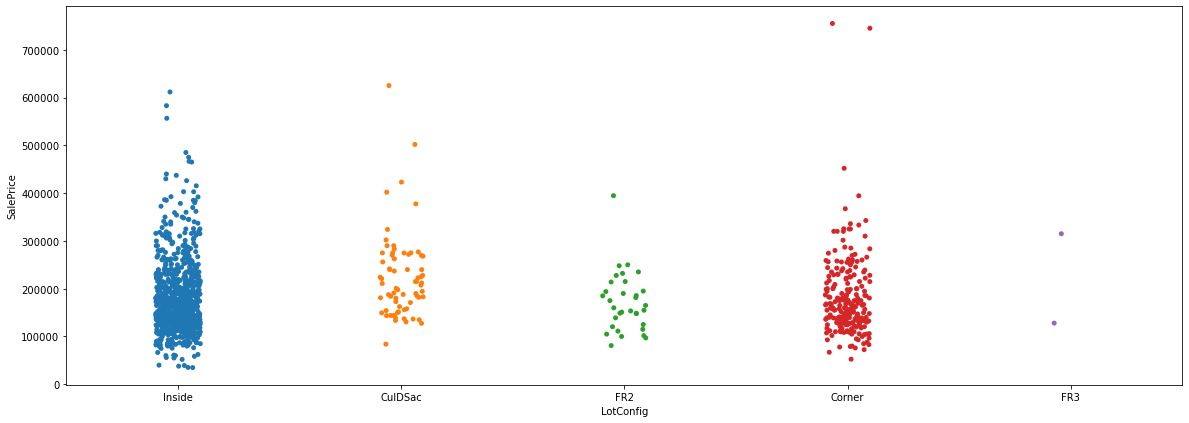

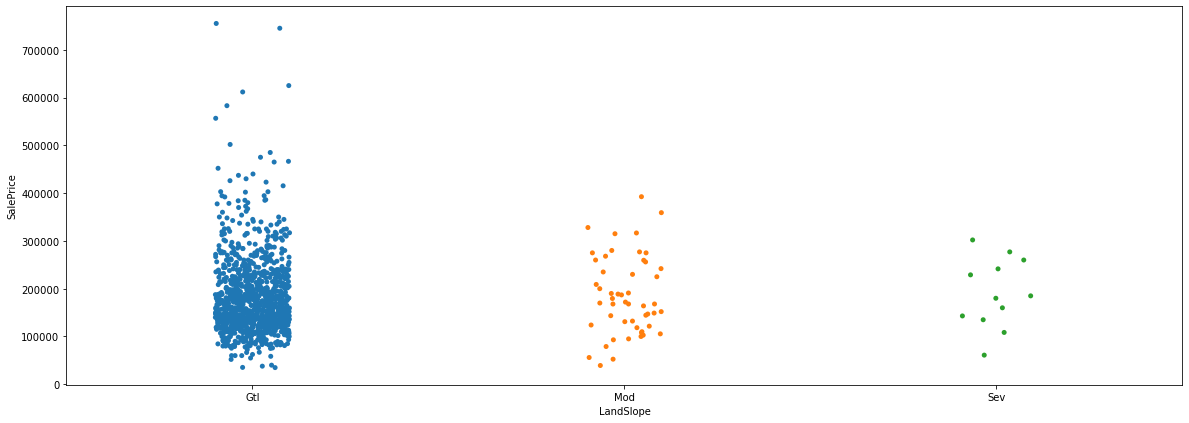

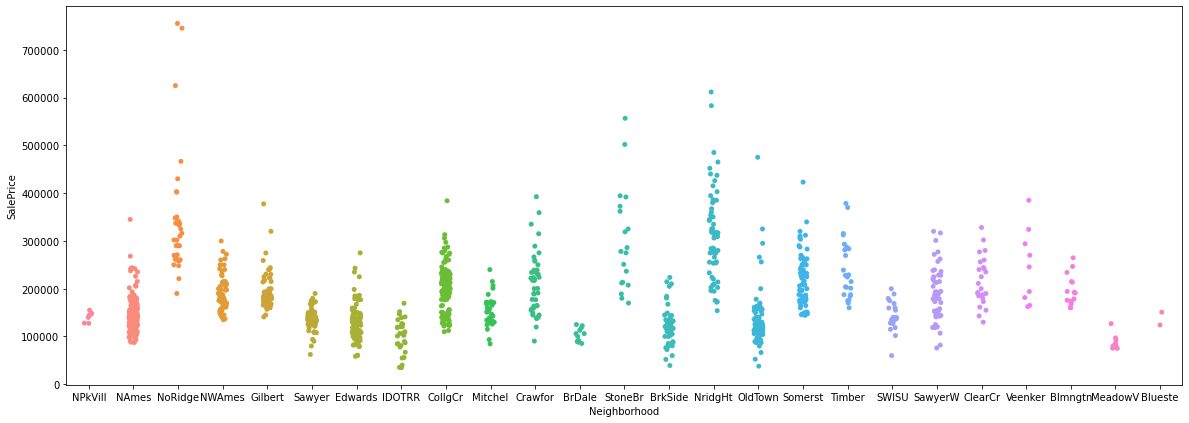

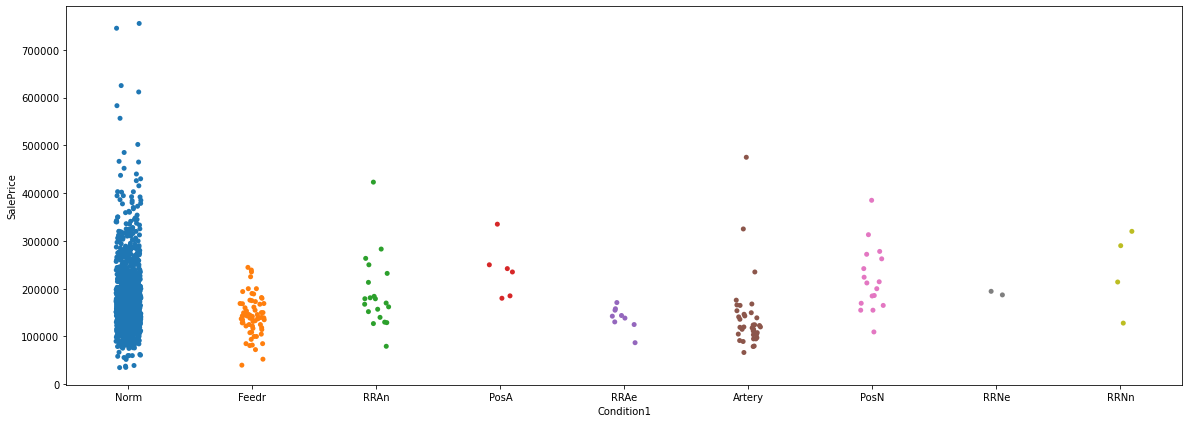

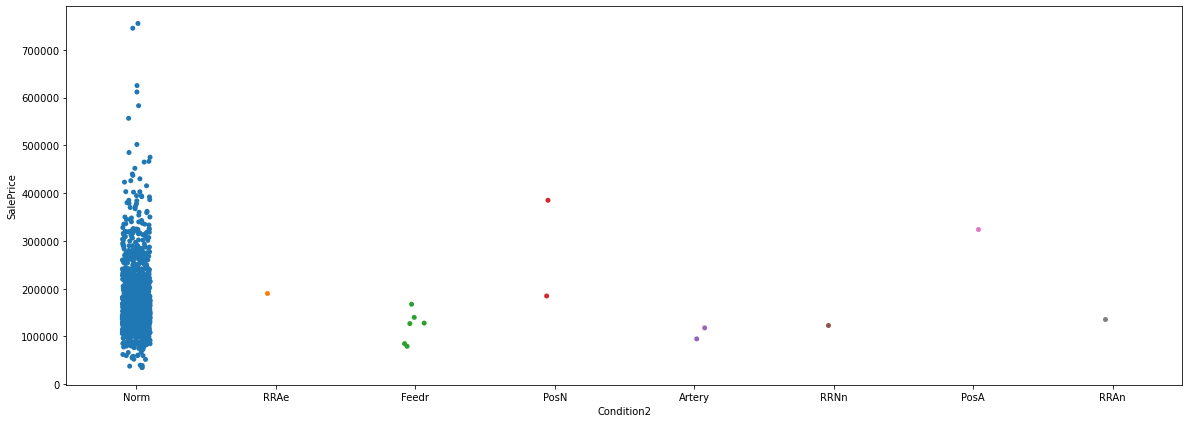

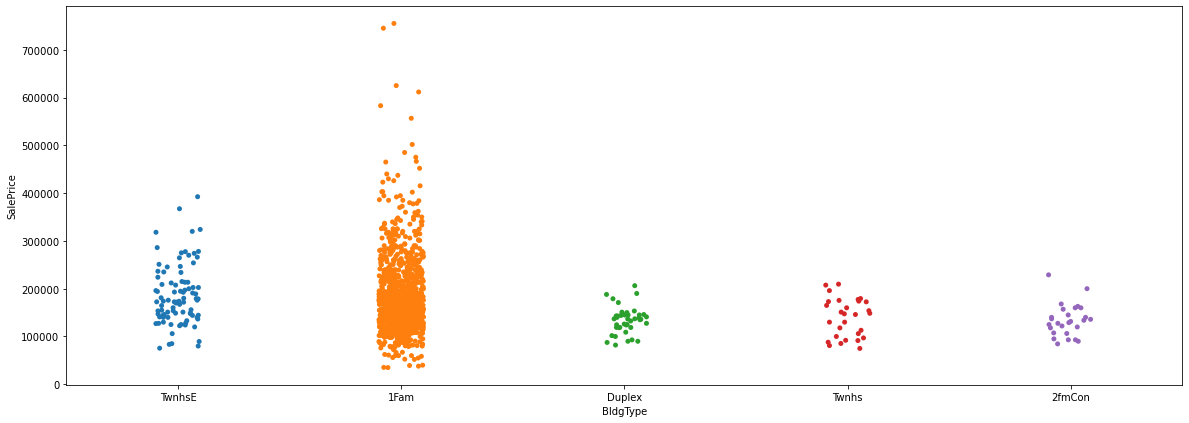

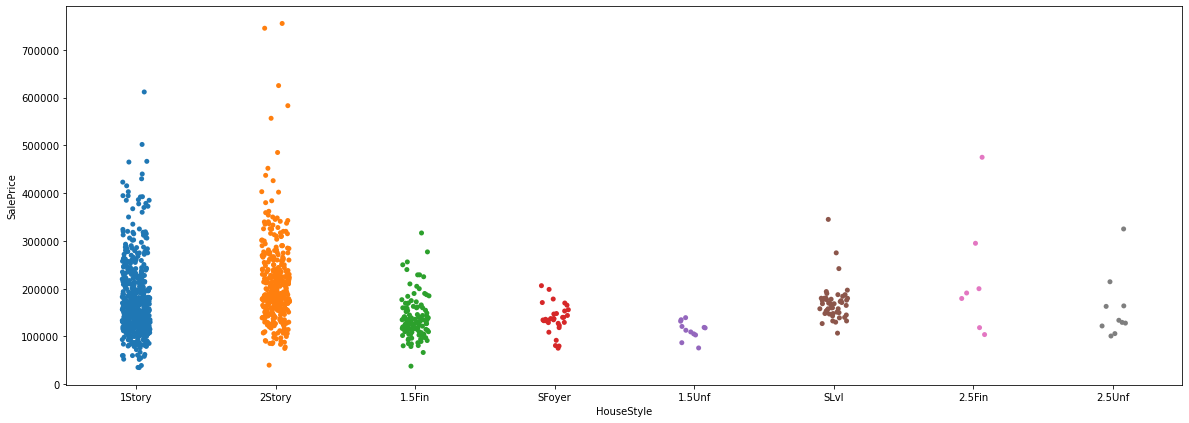

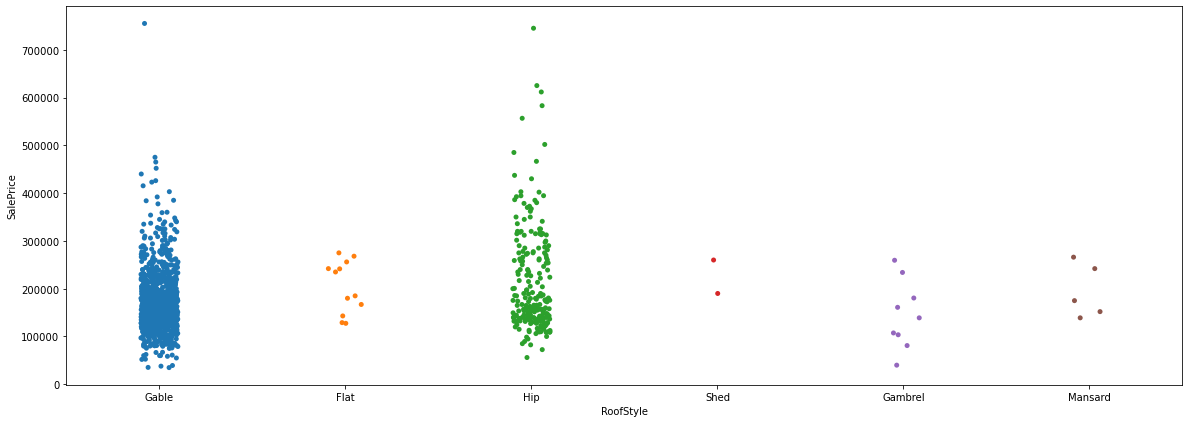

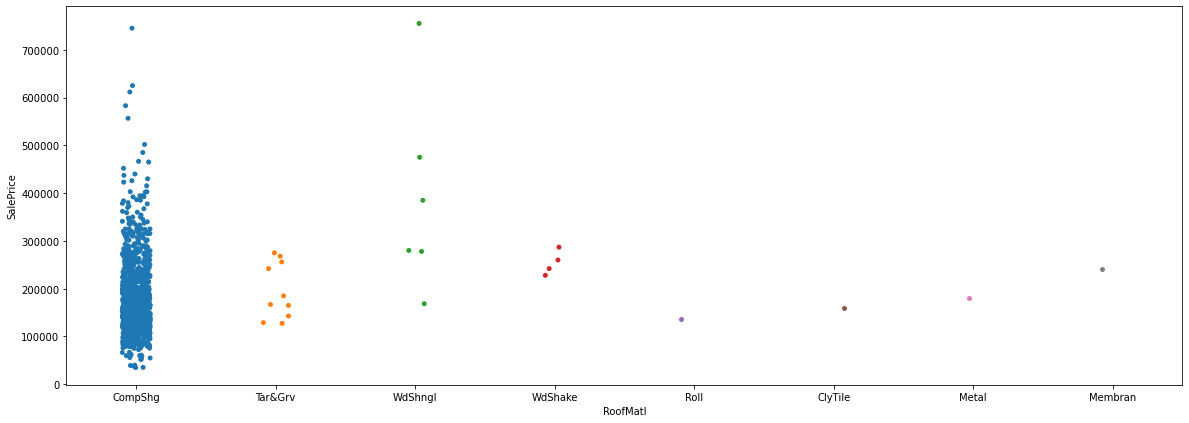

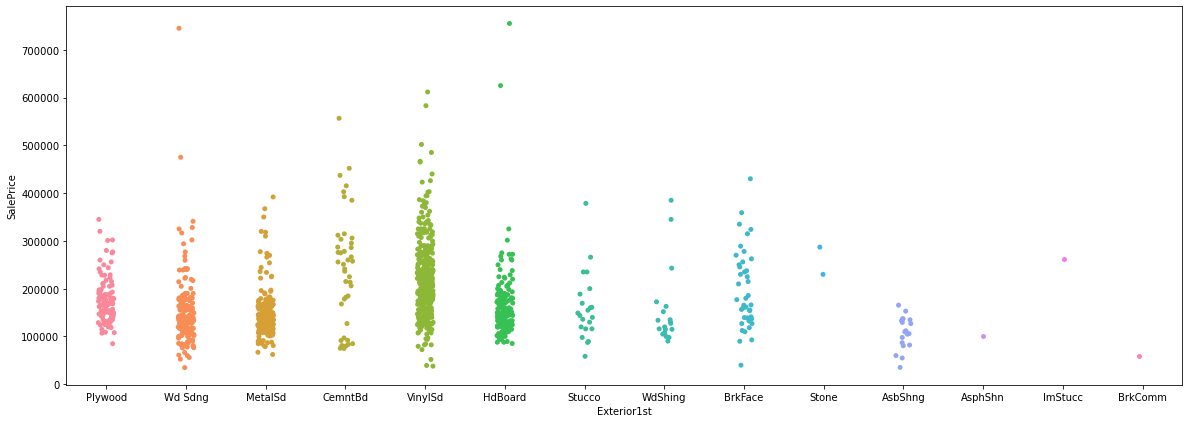

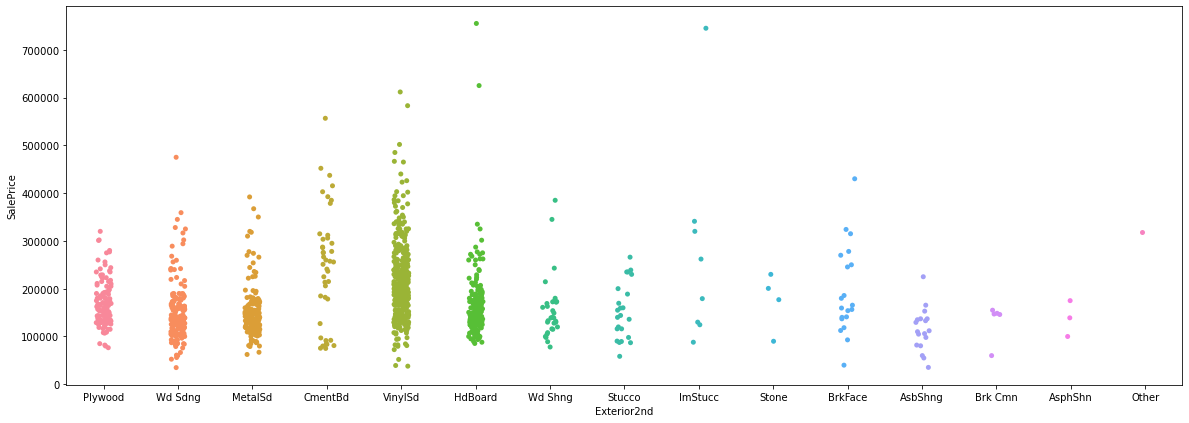

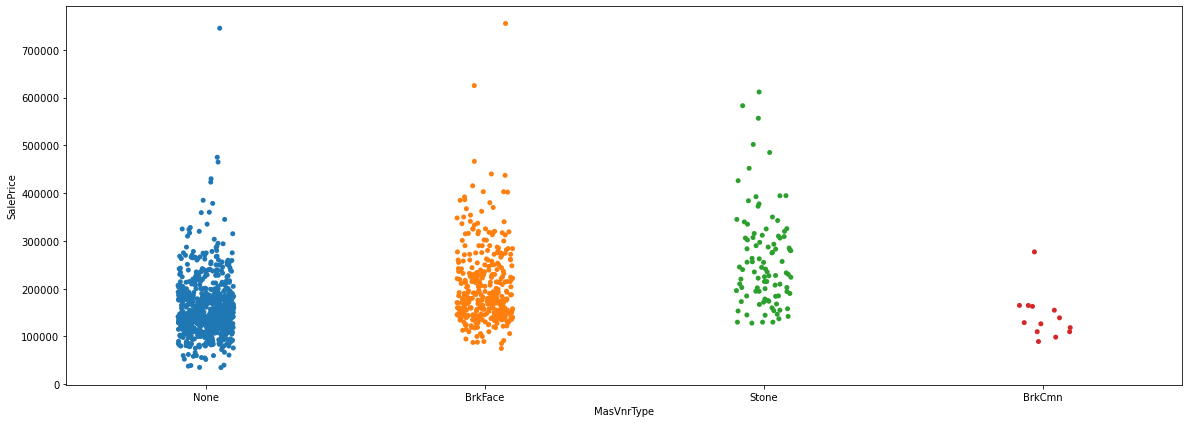

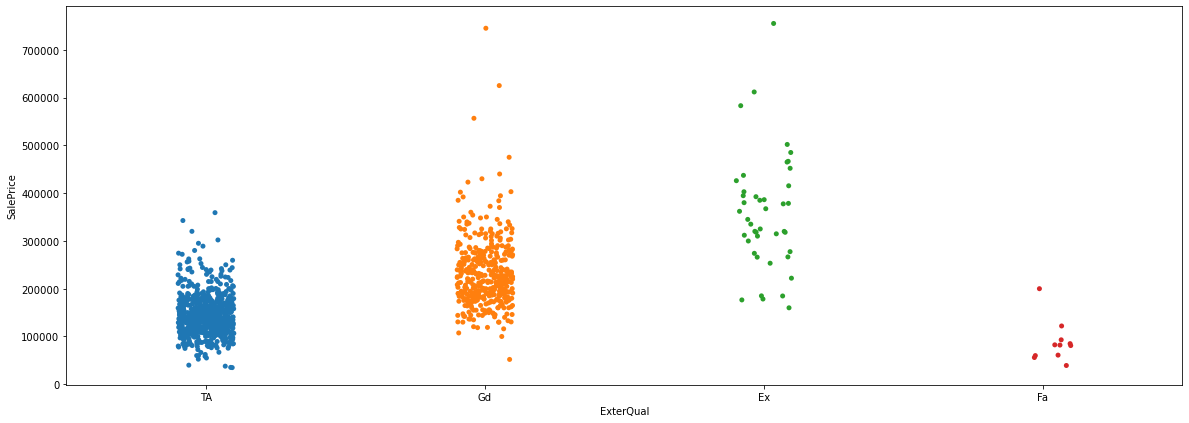

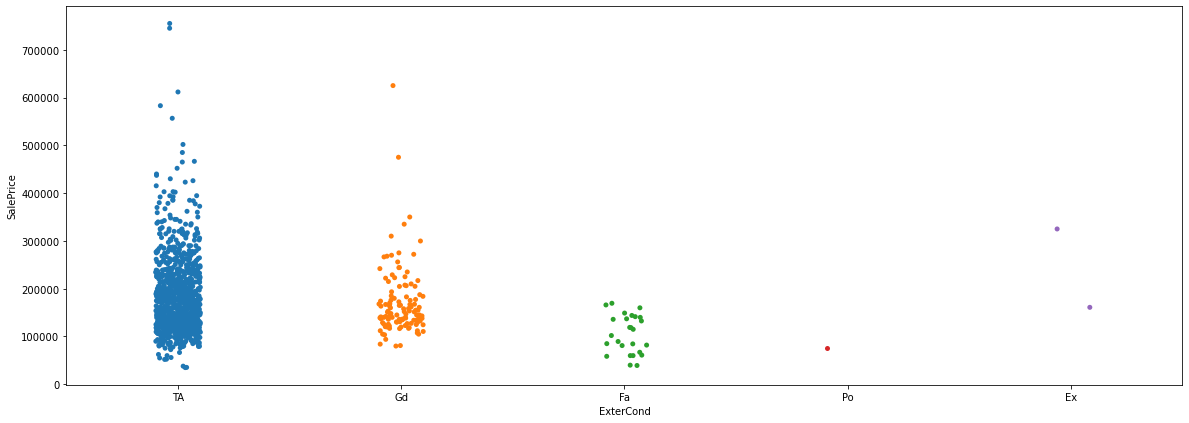

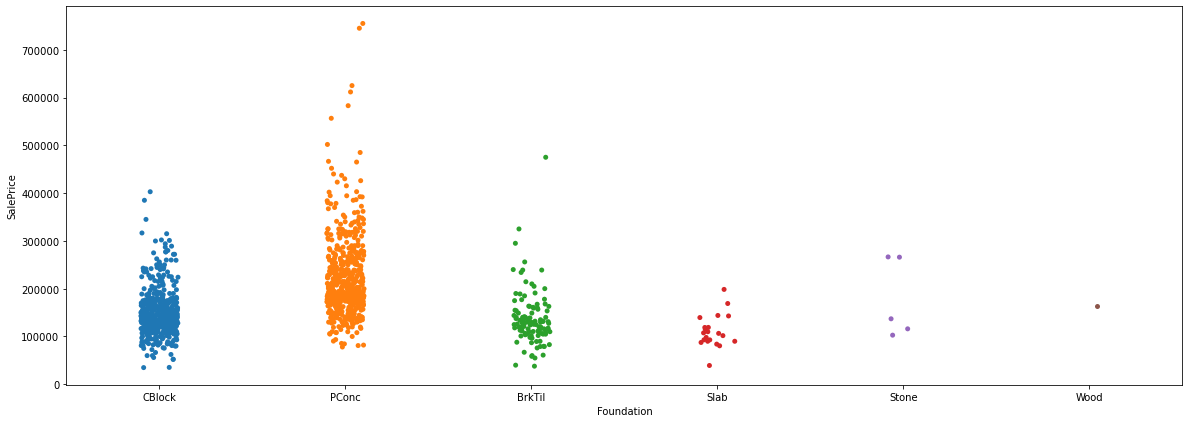

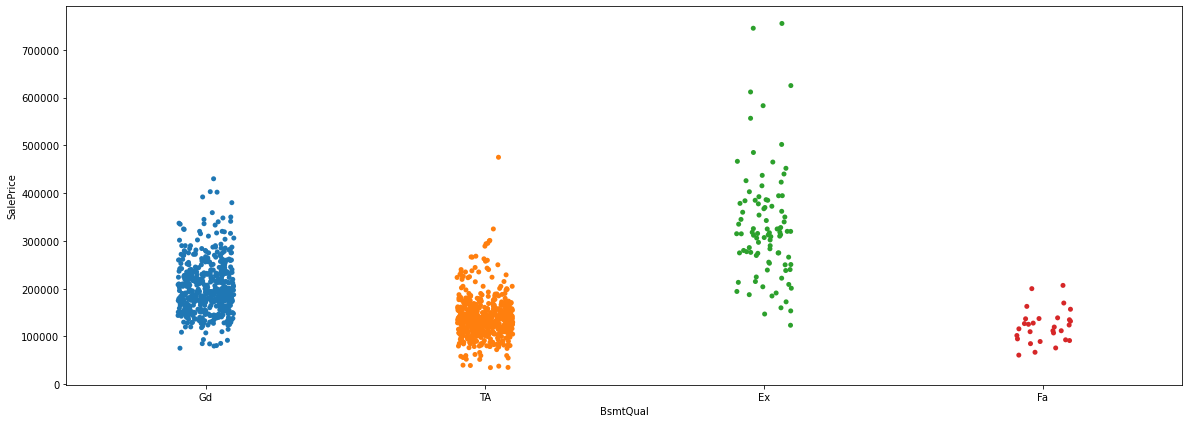

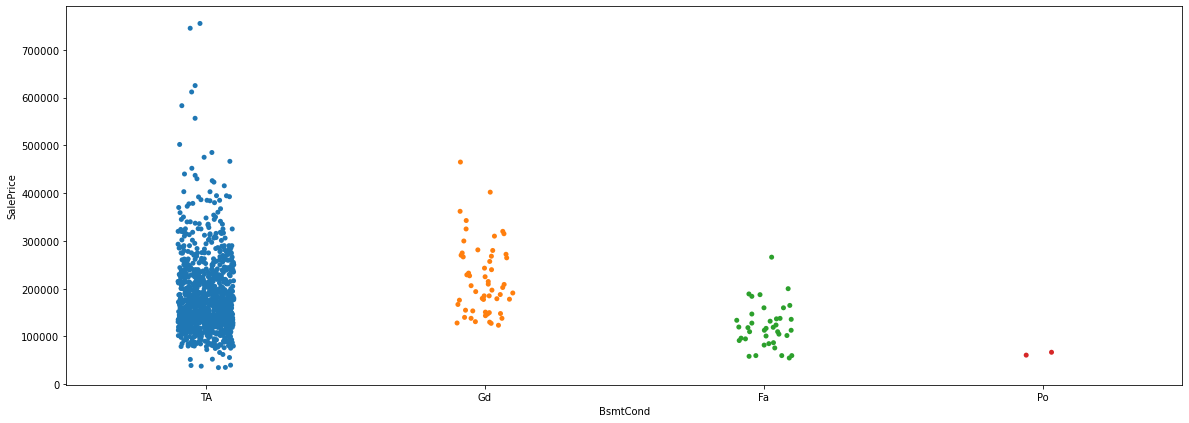

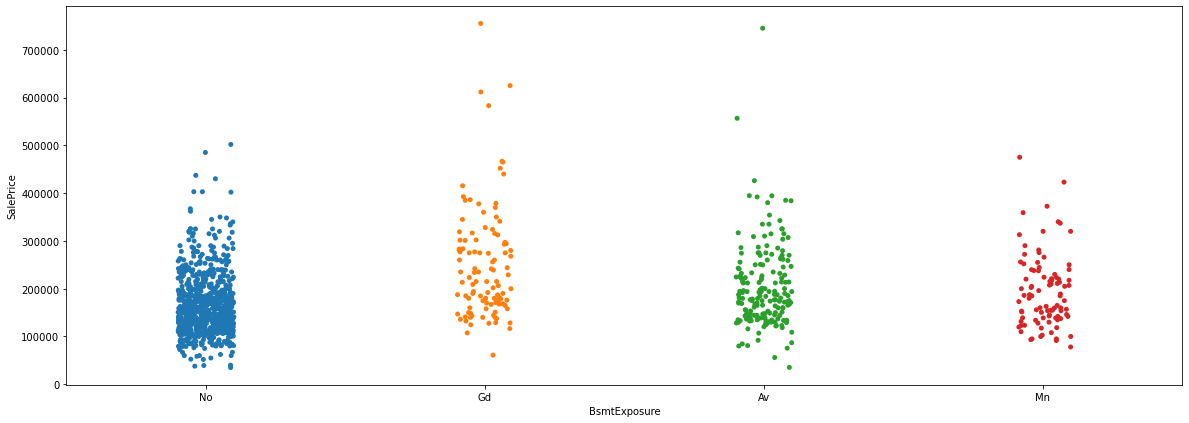

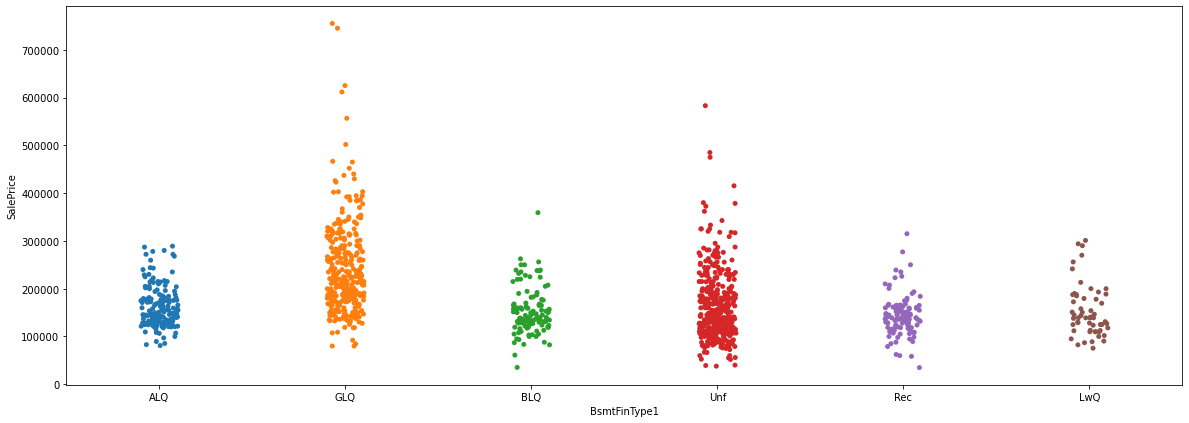

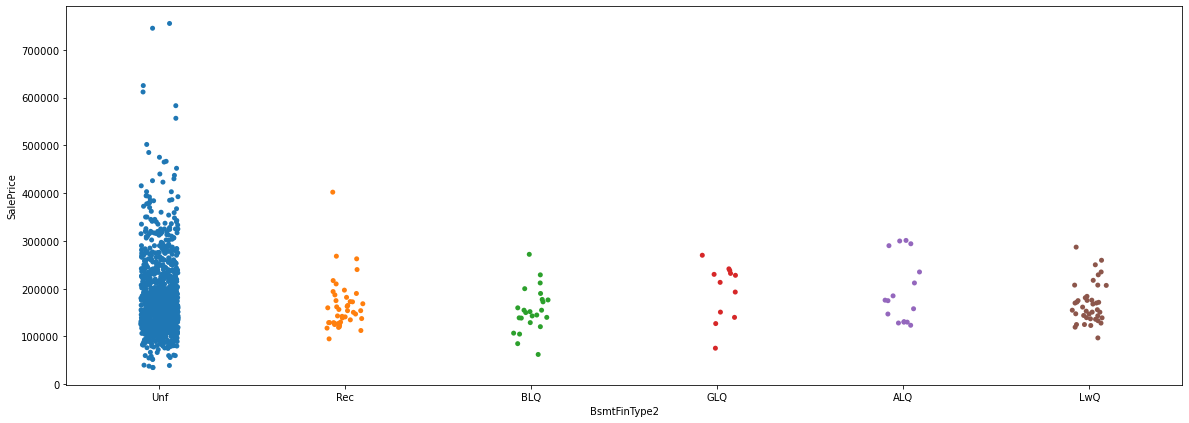

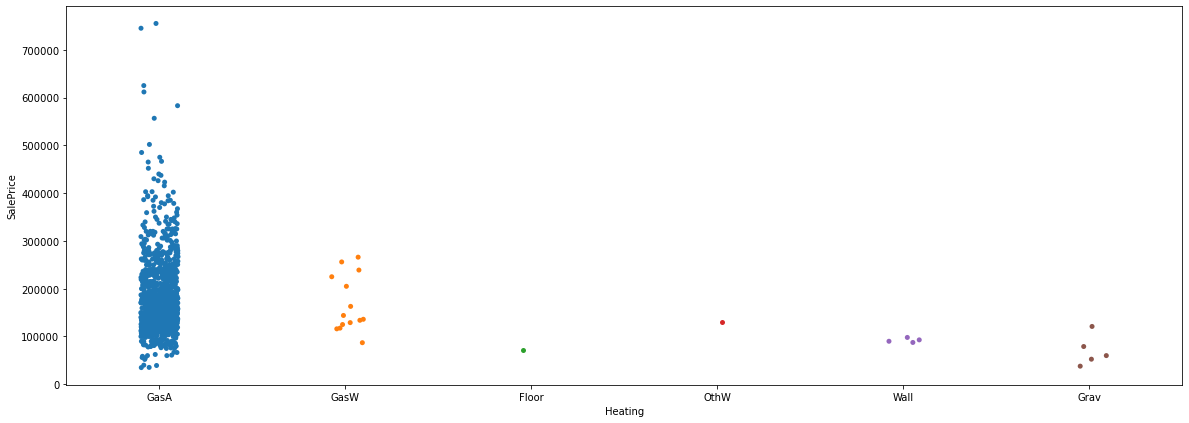

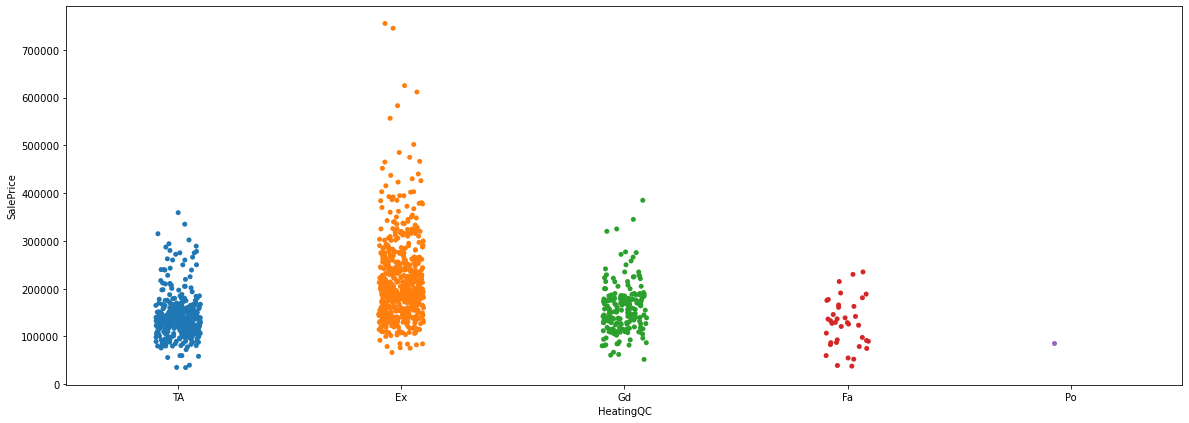

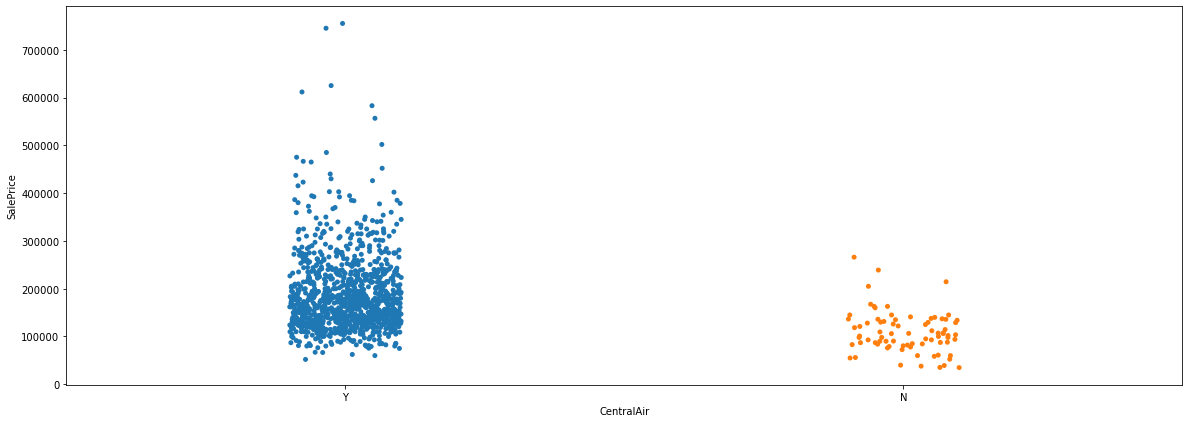

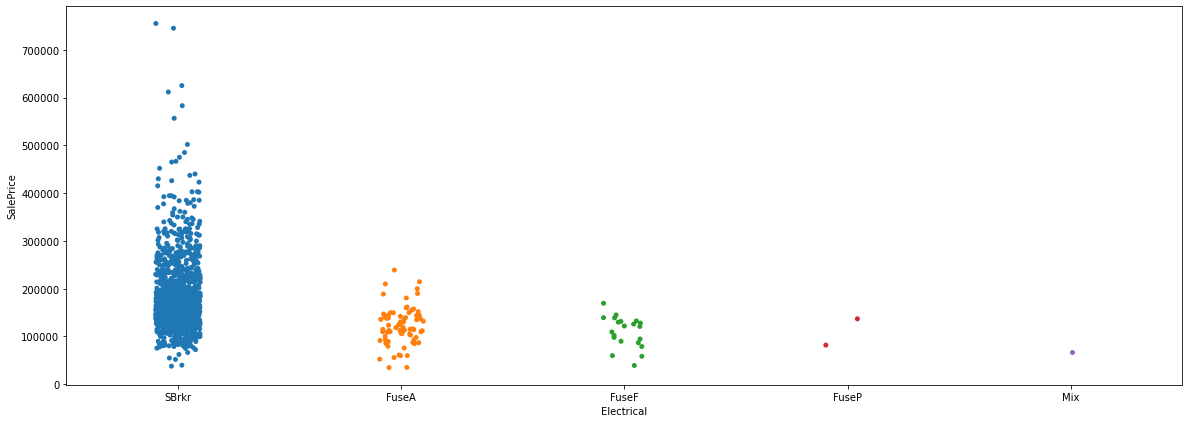

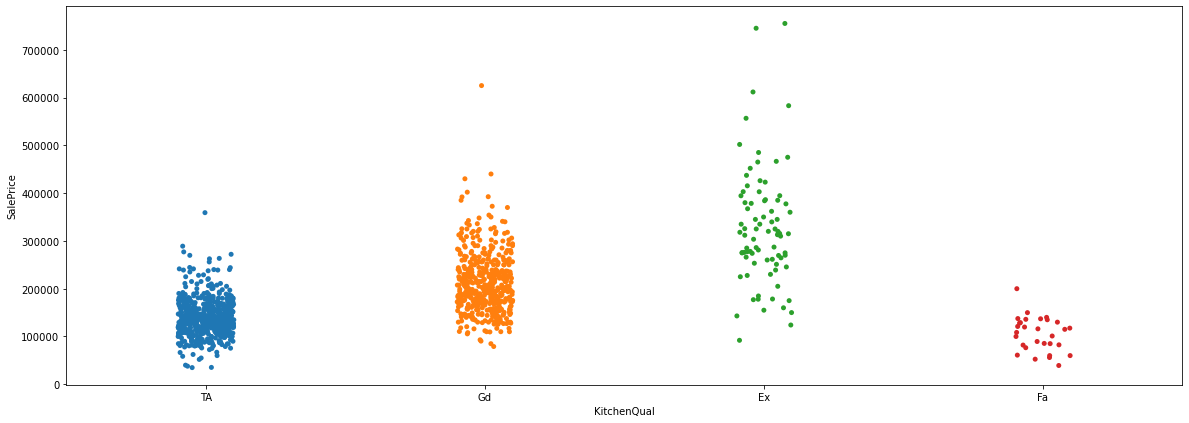

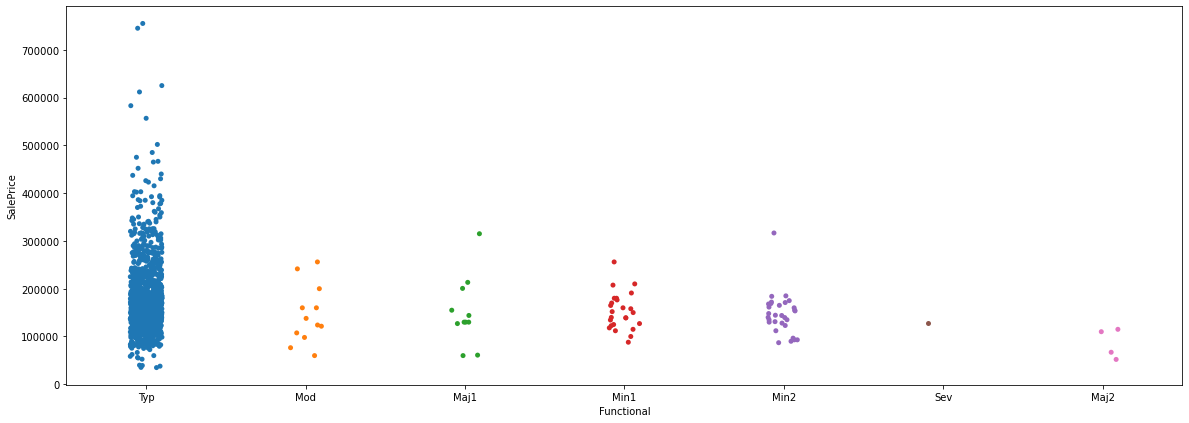

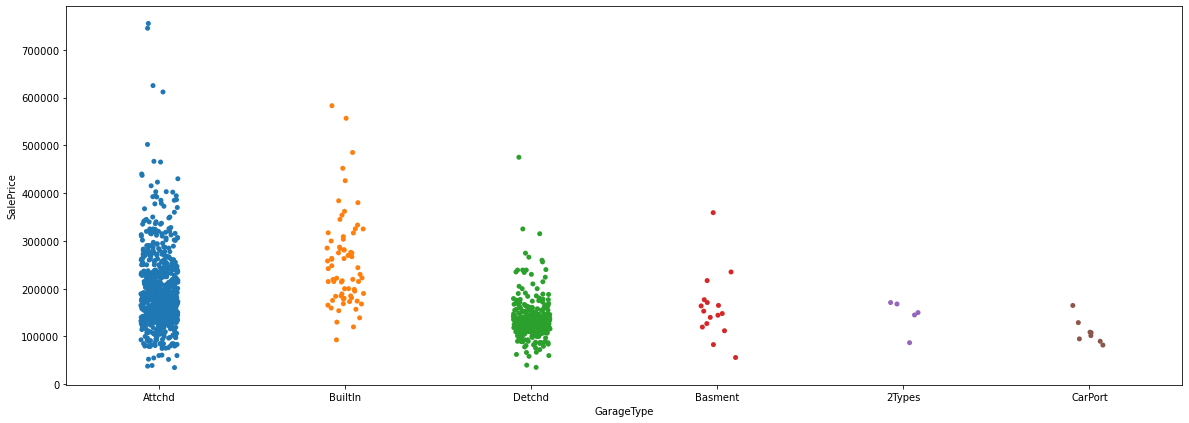

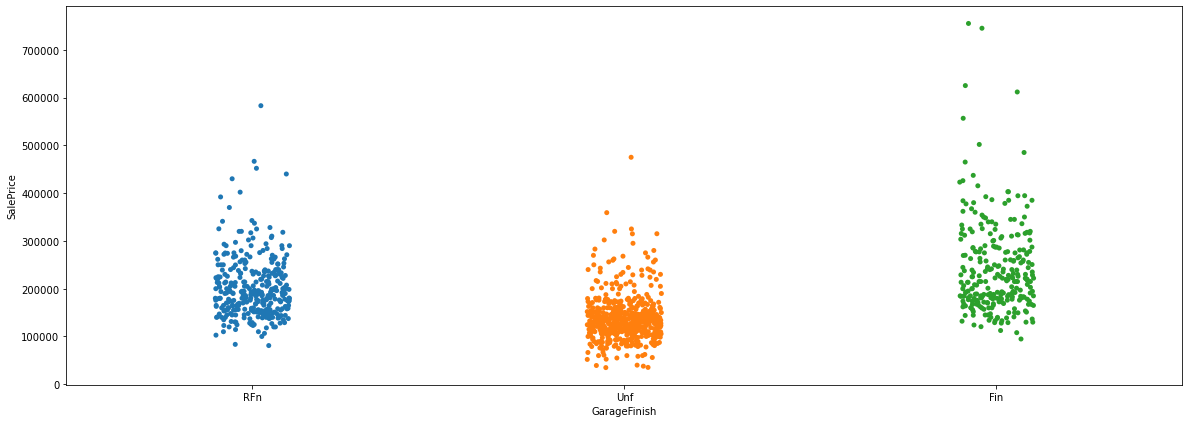

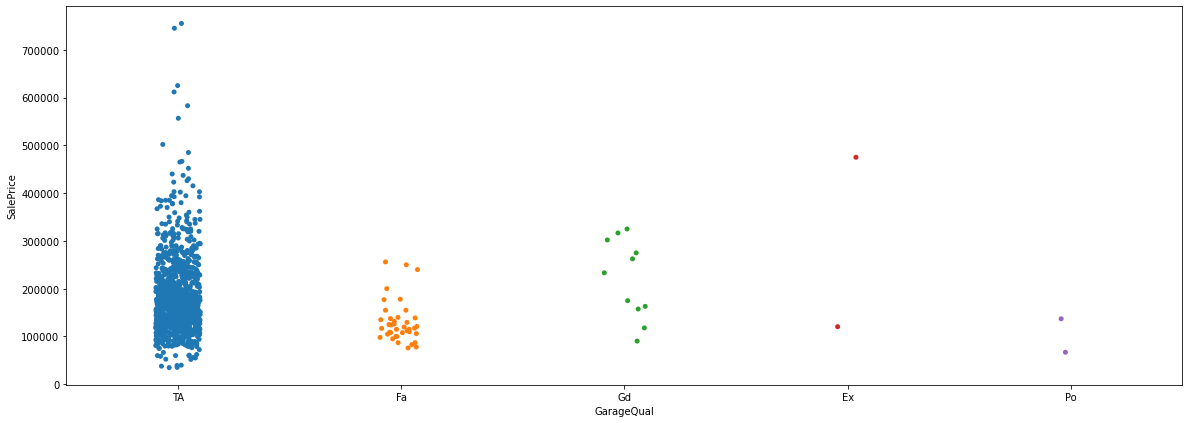

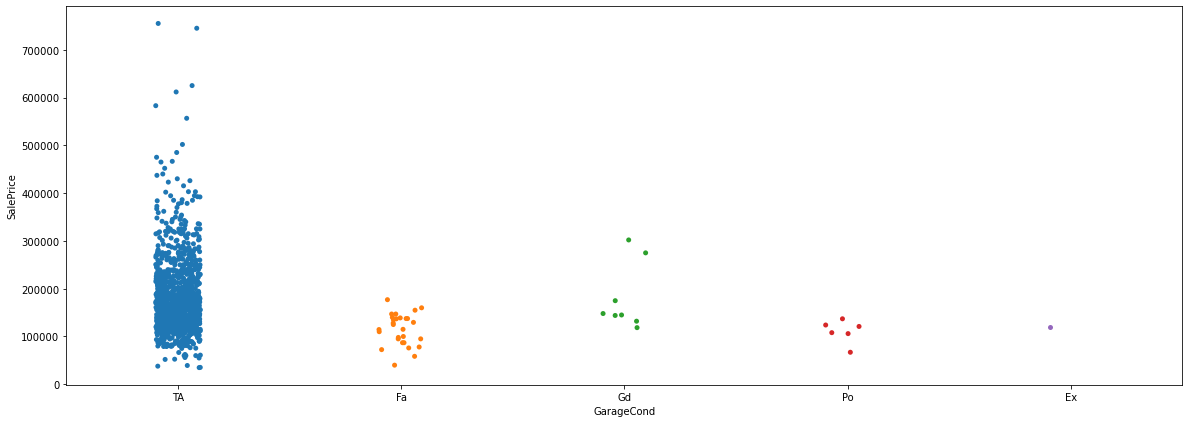

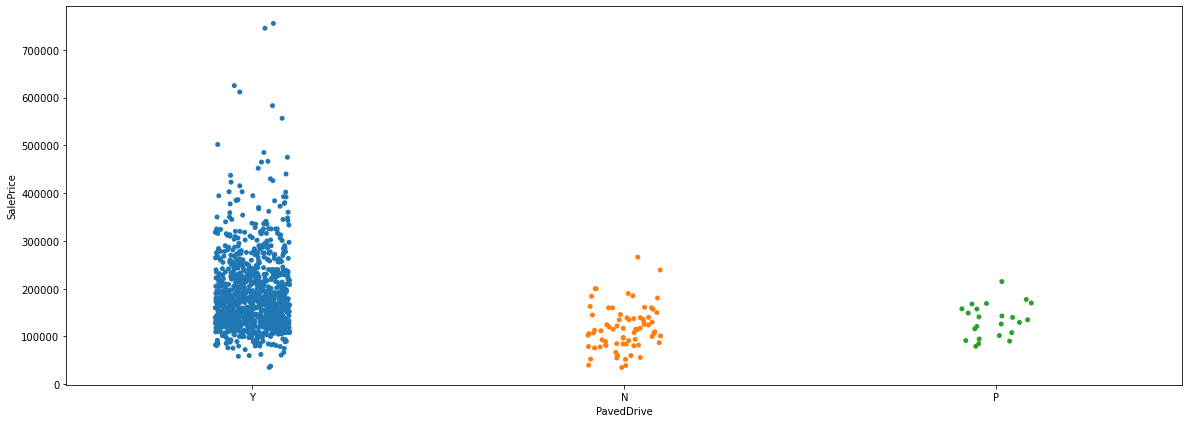

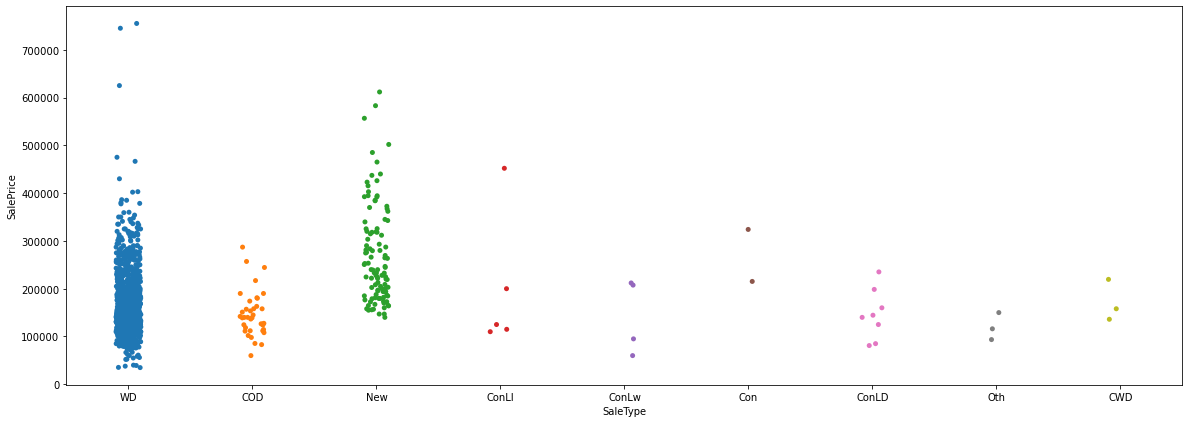

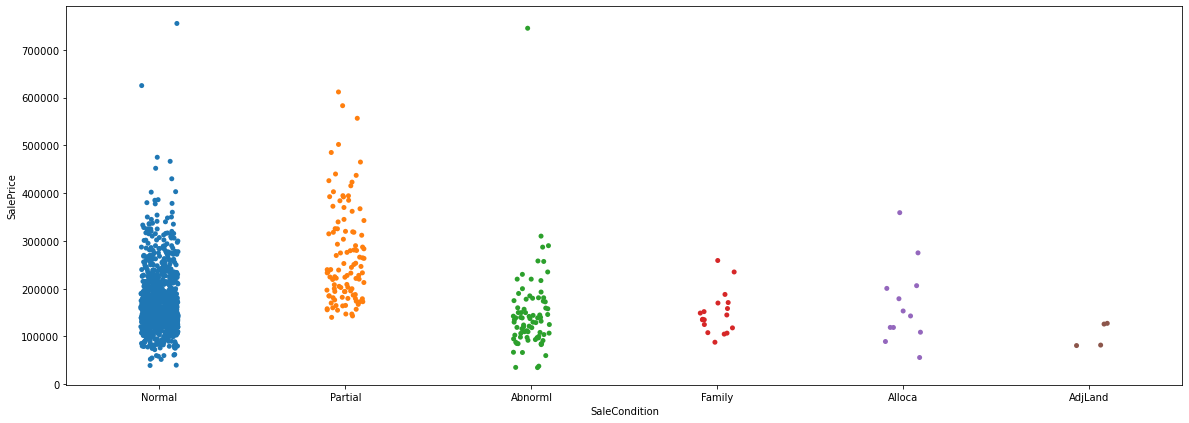

In [106]:
counter=1;


for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.stripplot(x=column, y="SalePrice", data=df)
        plt.show()

# Check Outliers 

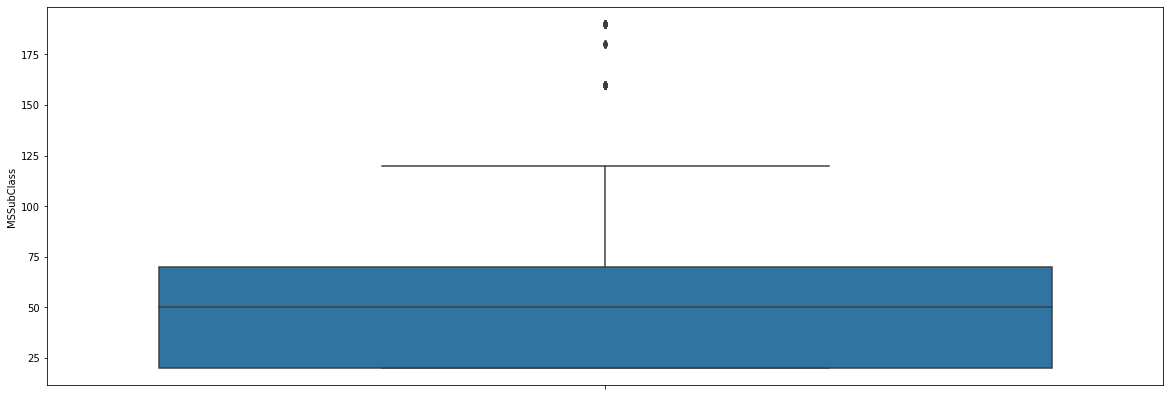

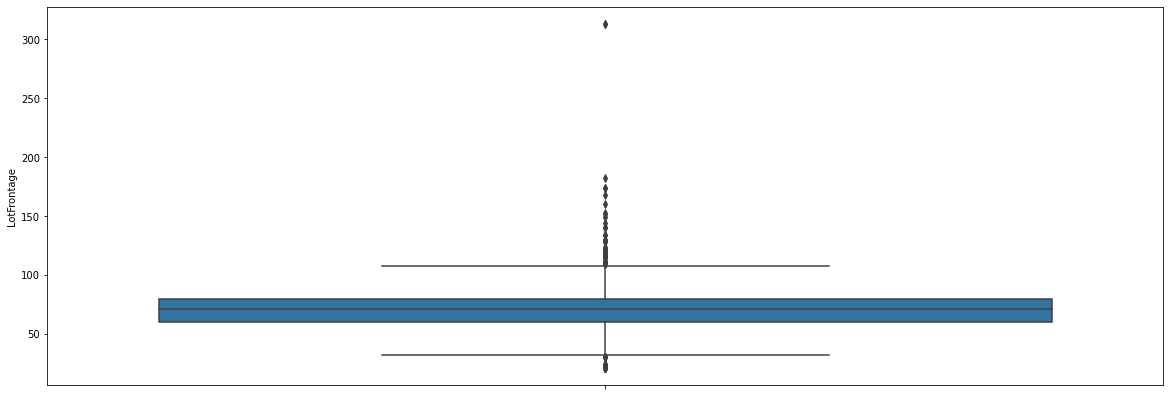

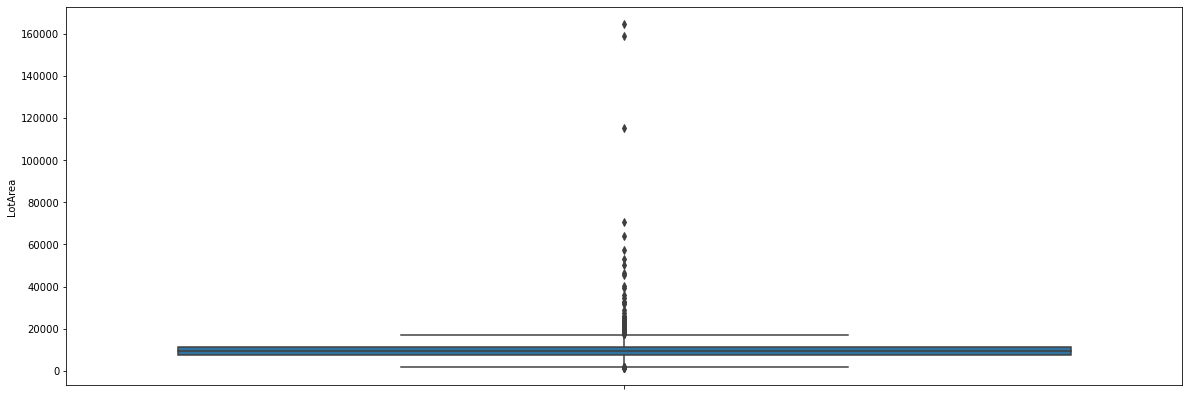

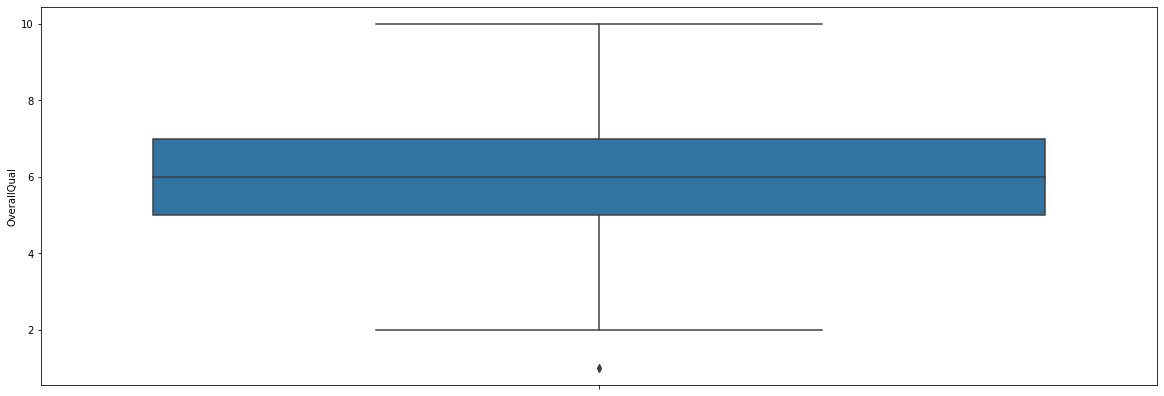

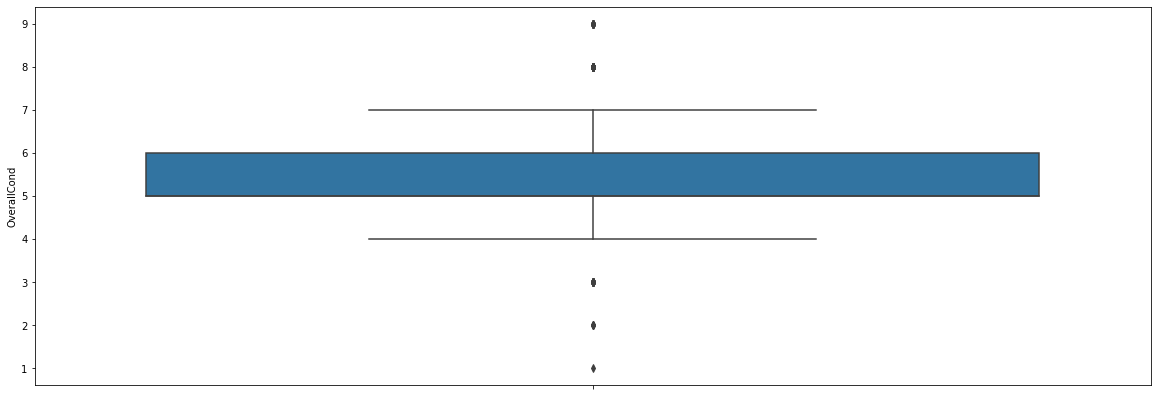

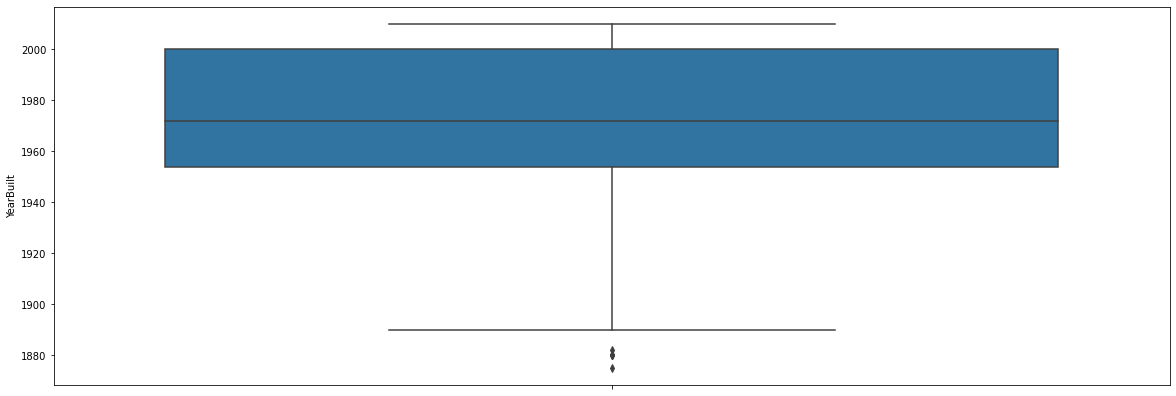

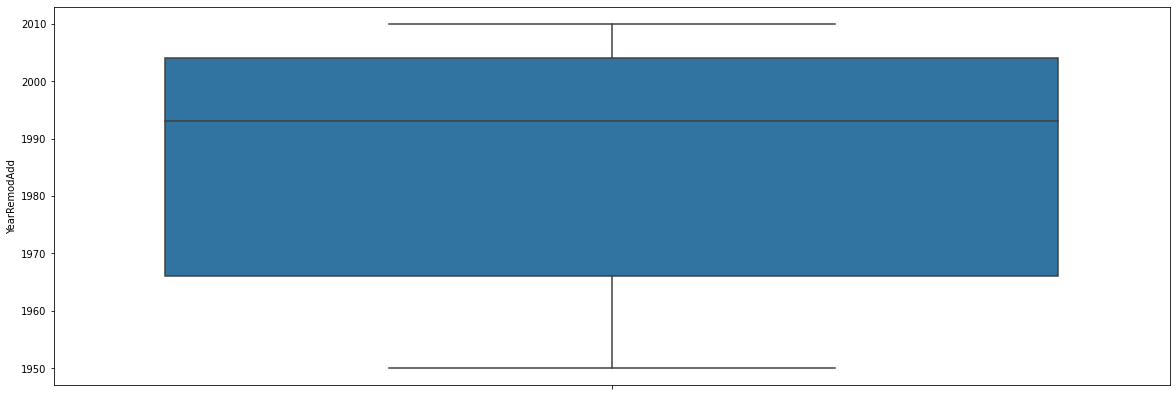

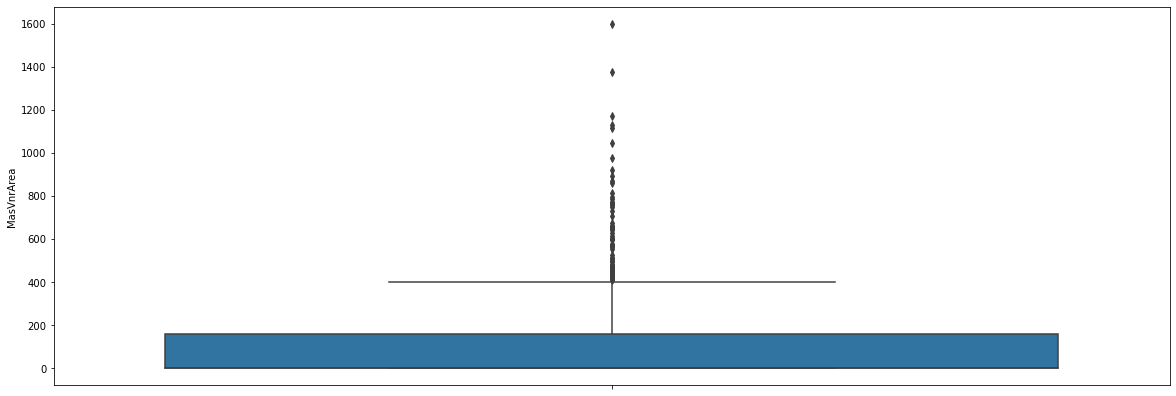

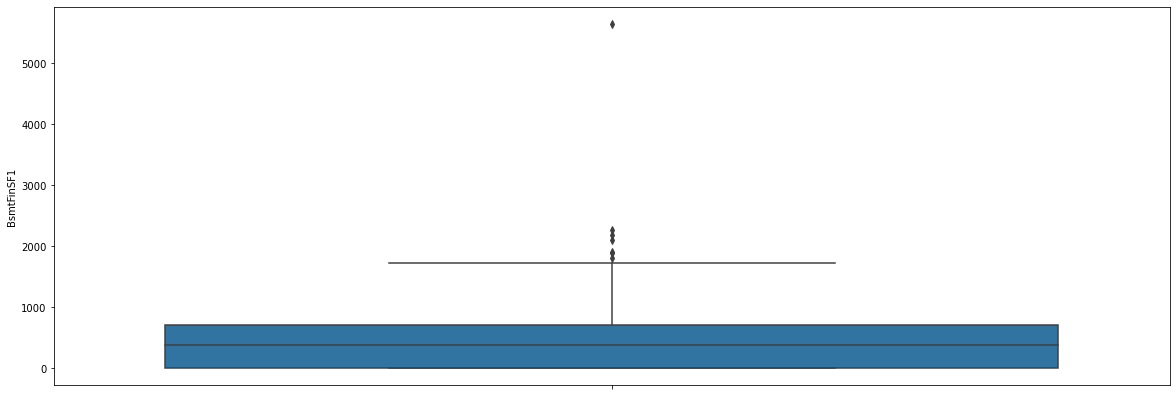

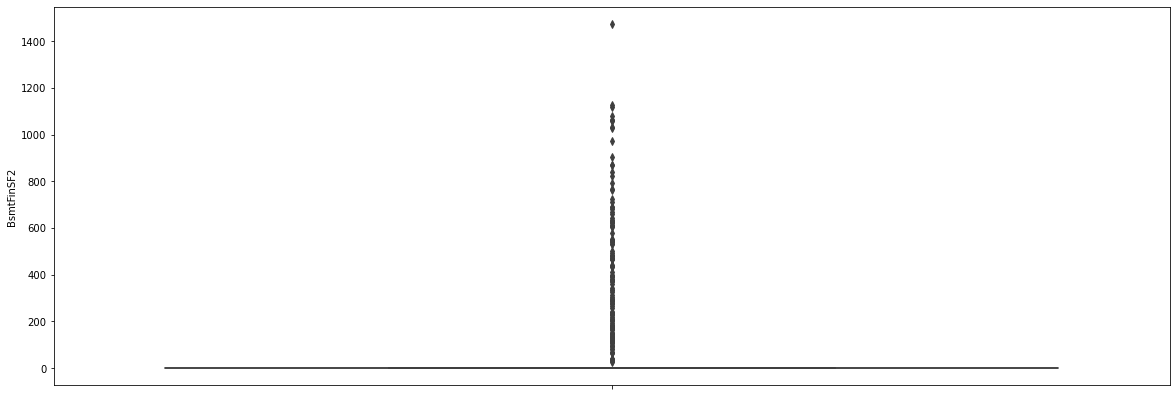

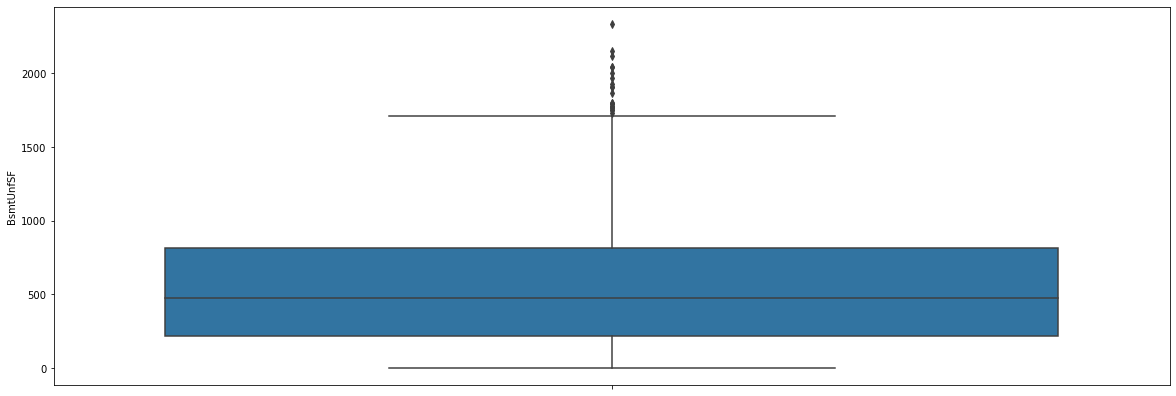

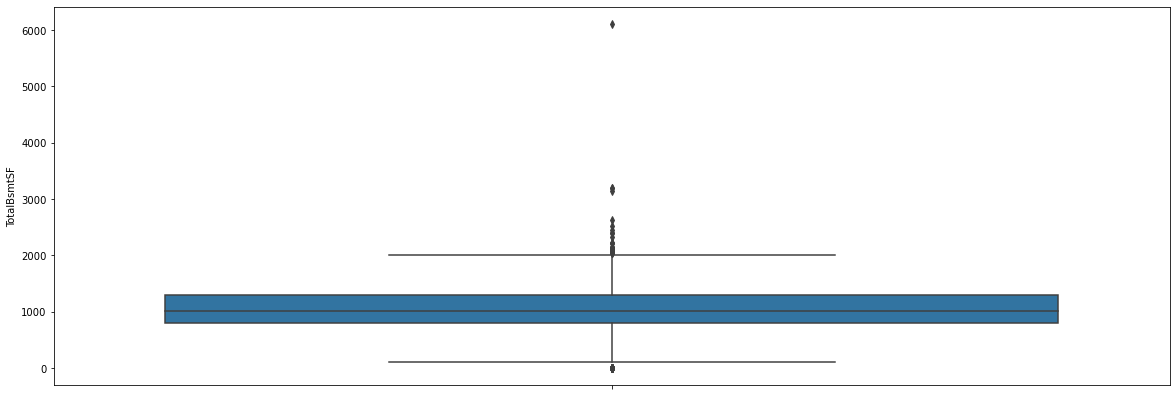

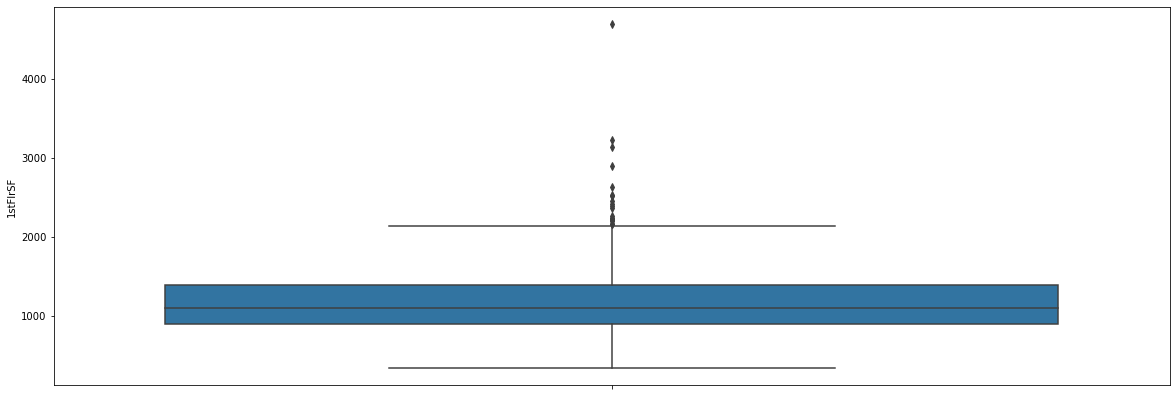

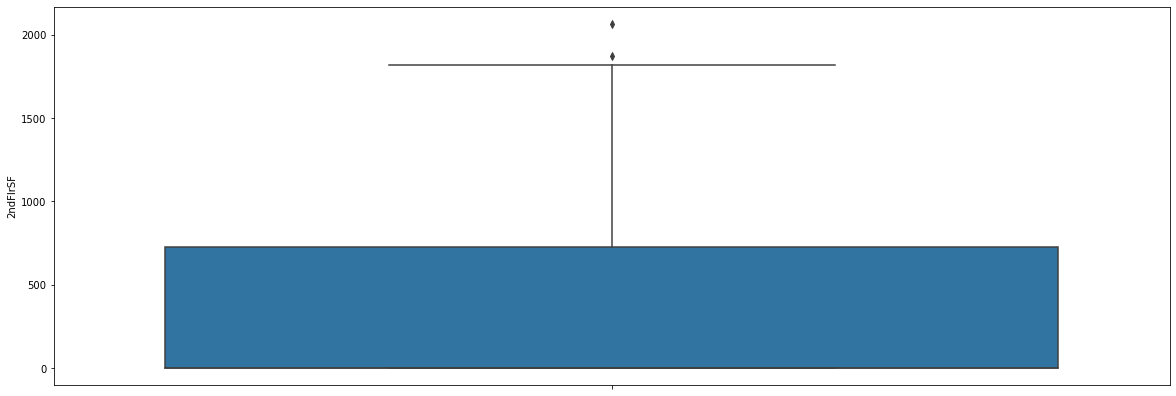

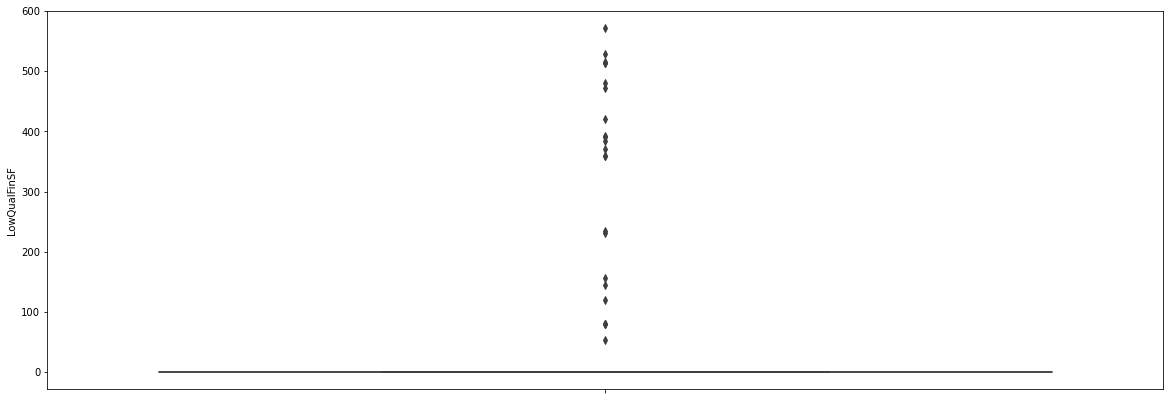

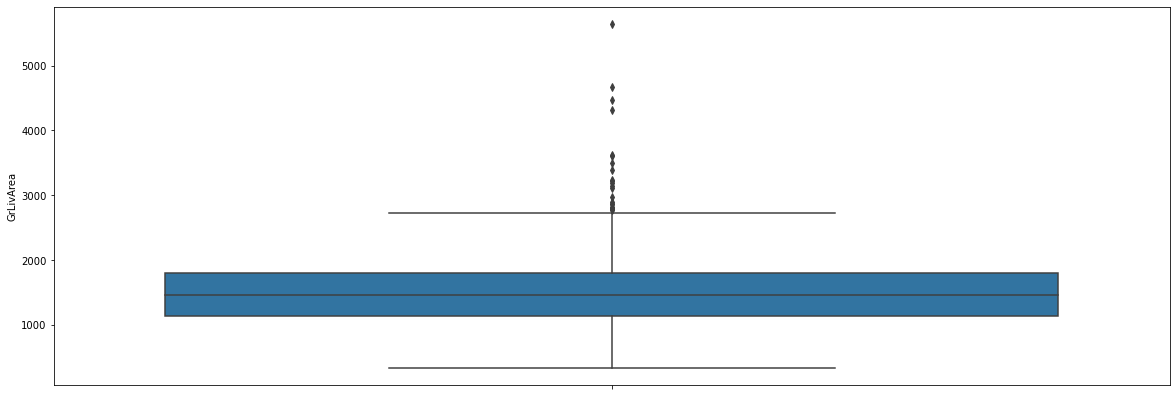

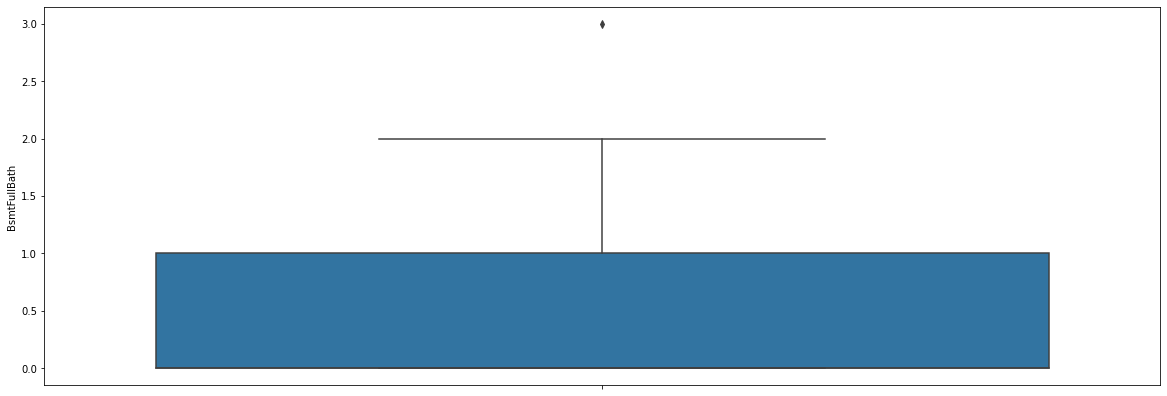

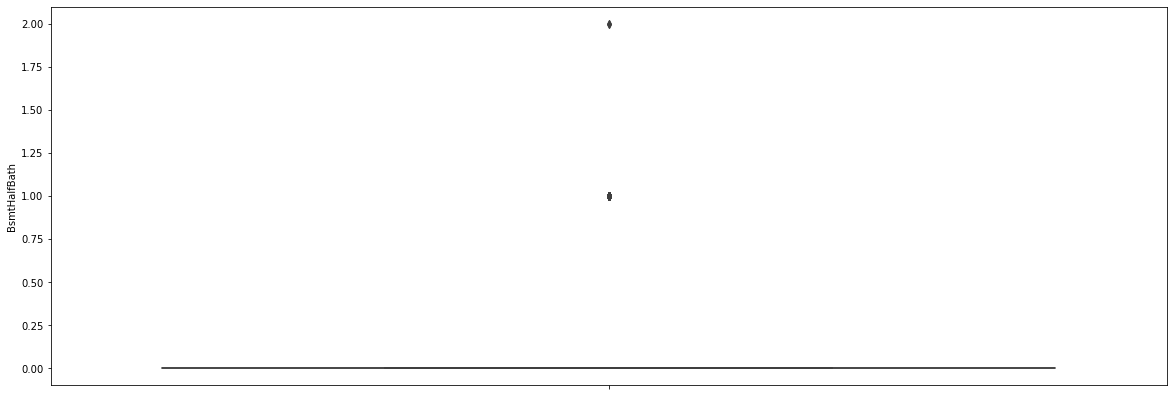

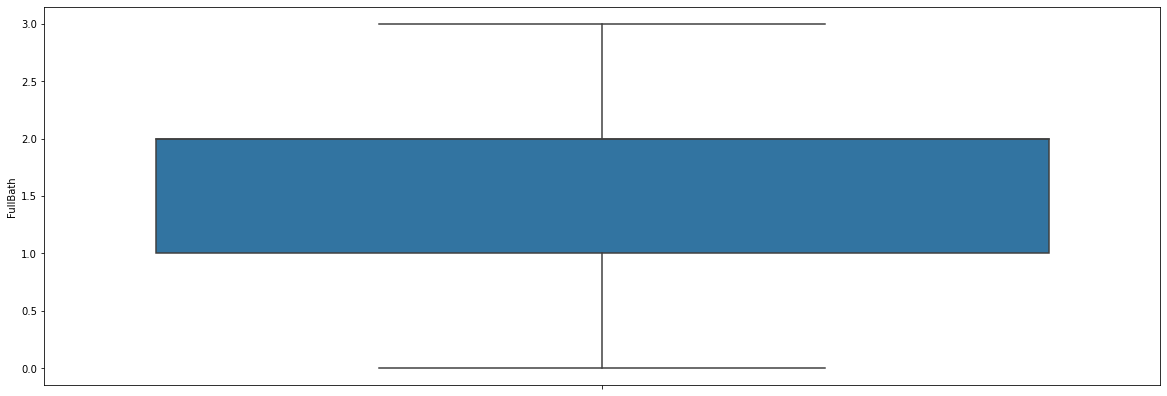

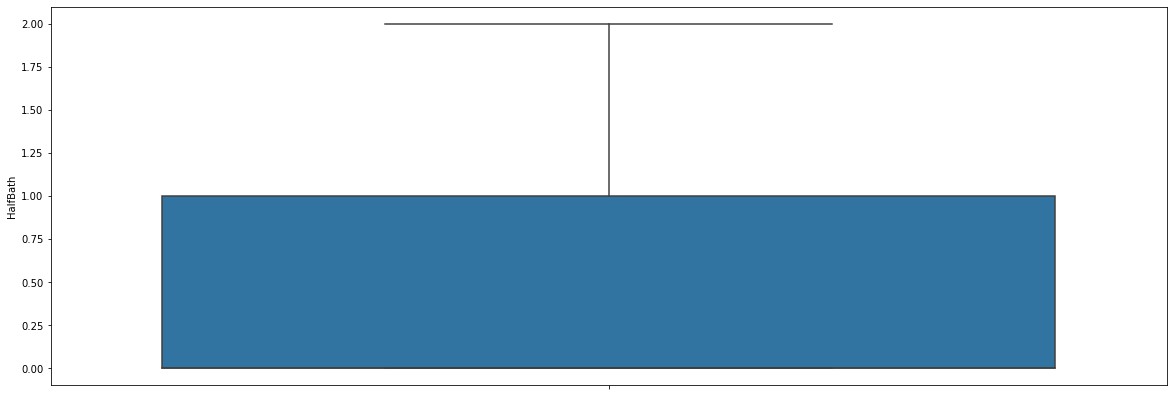

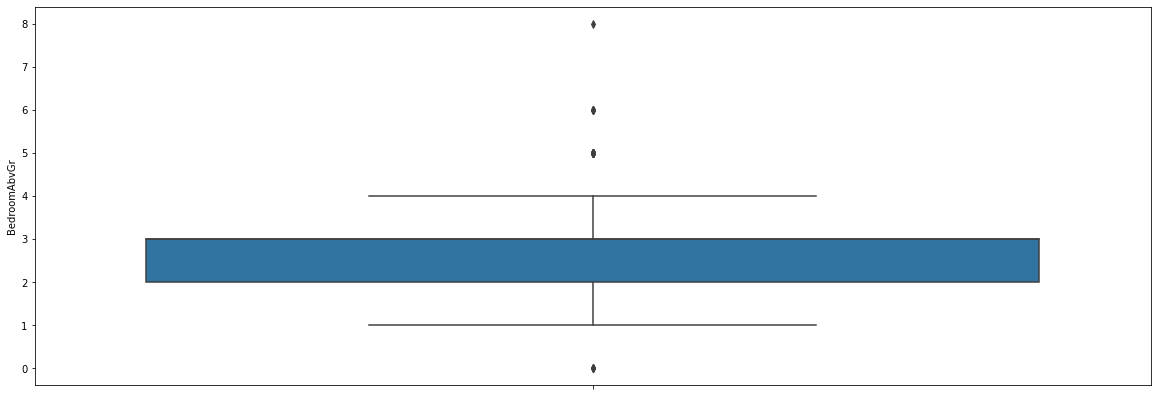

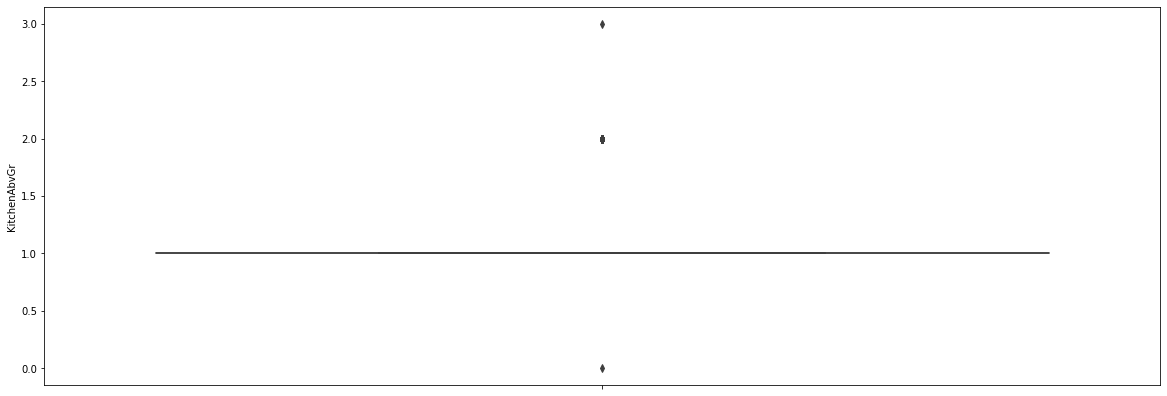

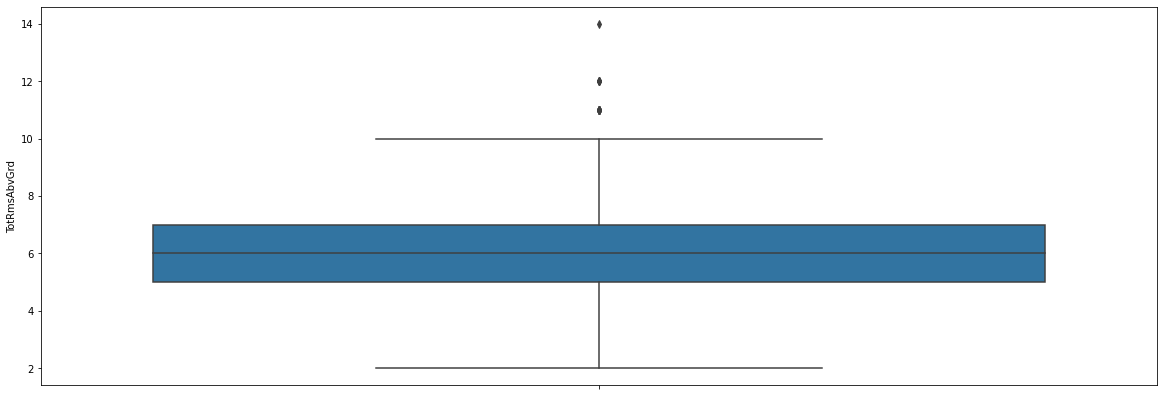

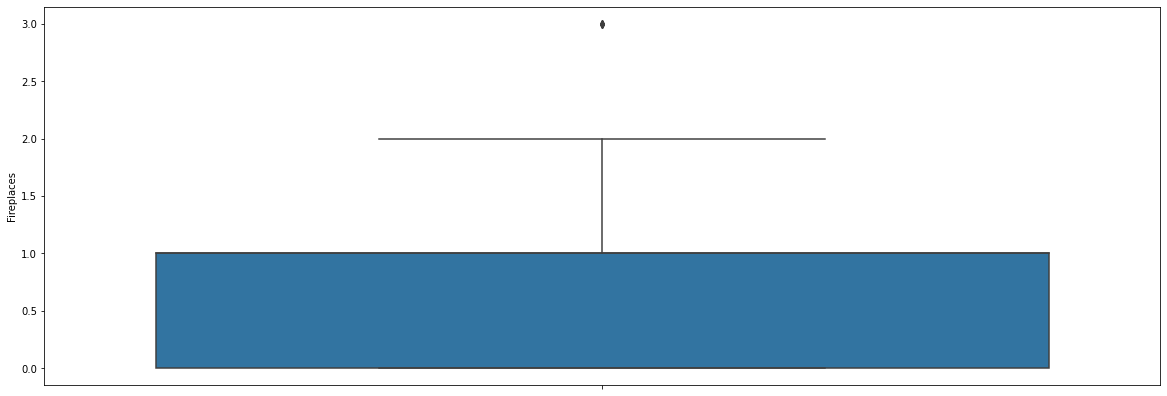

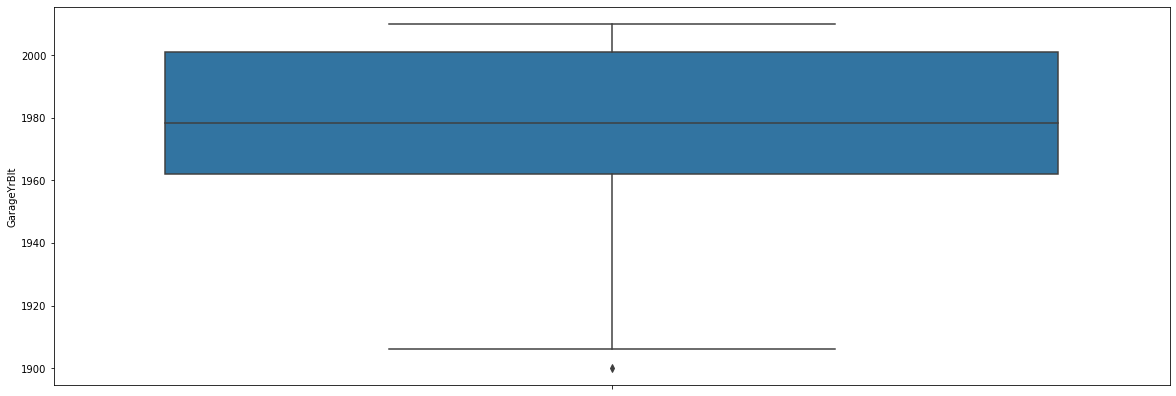

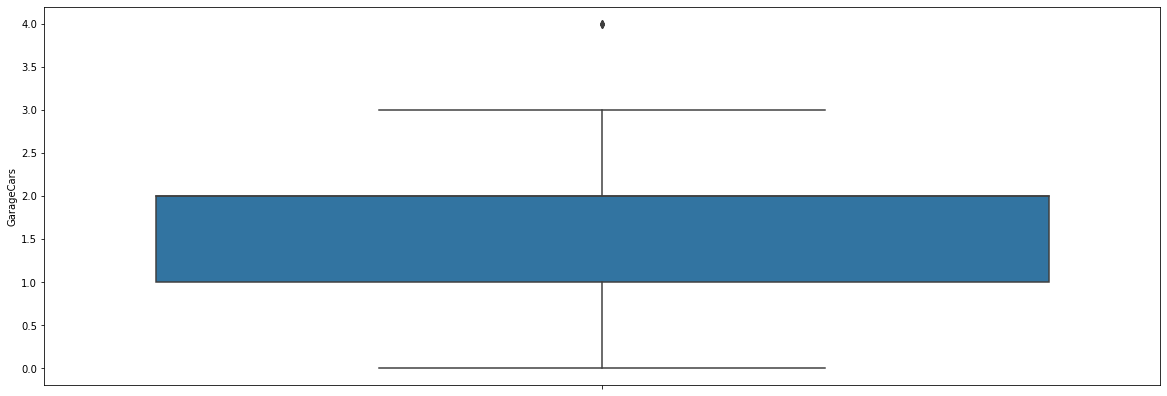

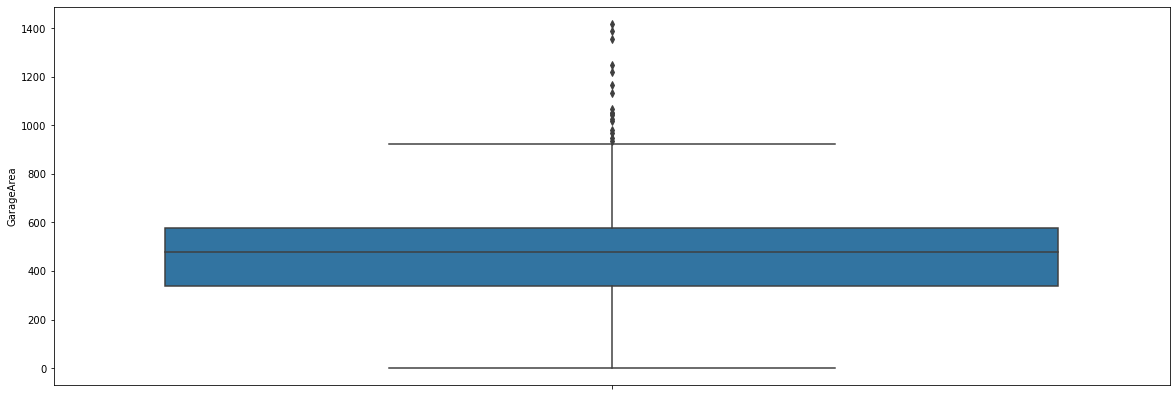

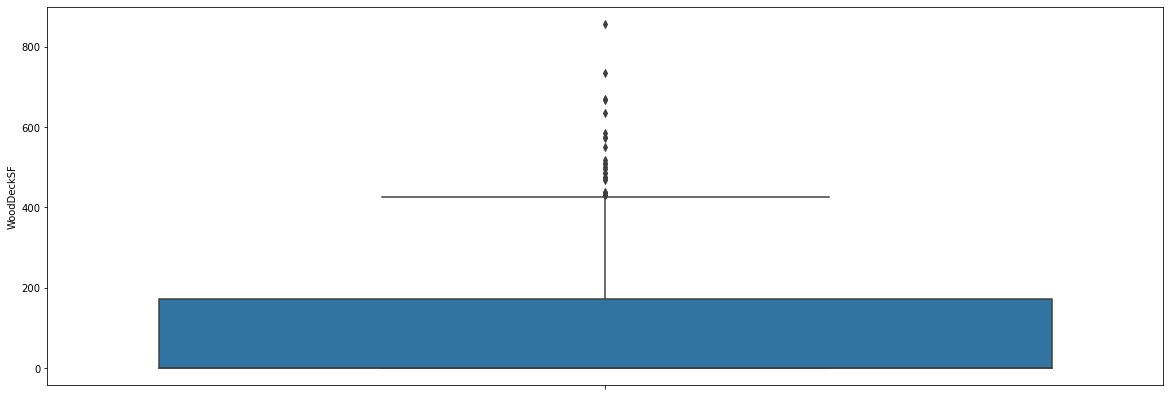

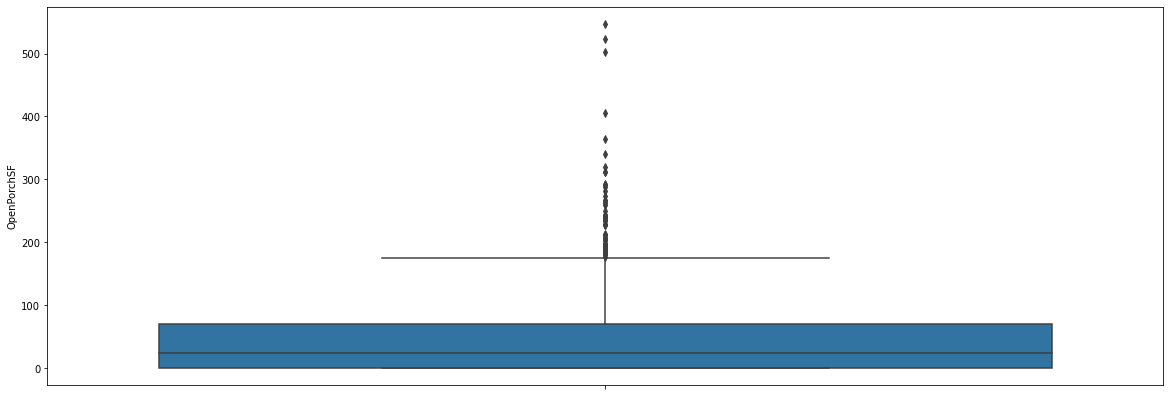

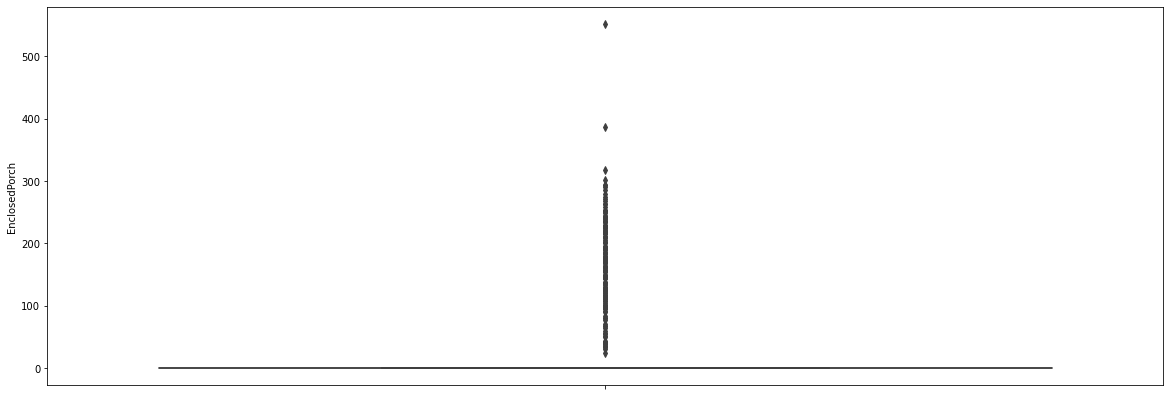

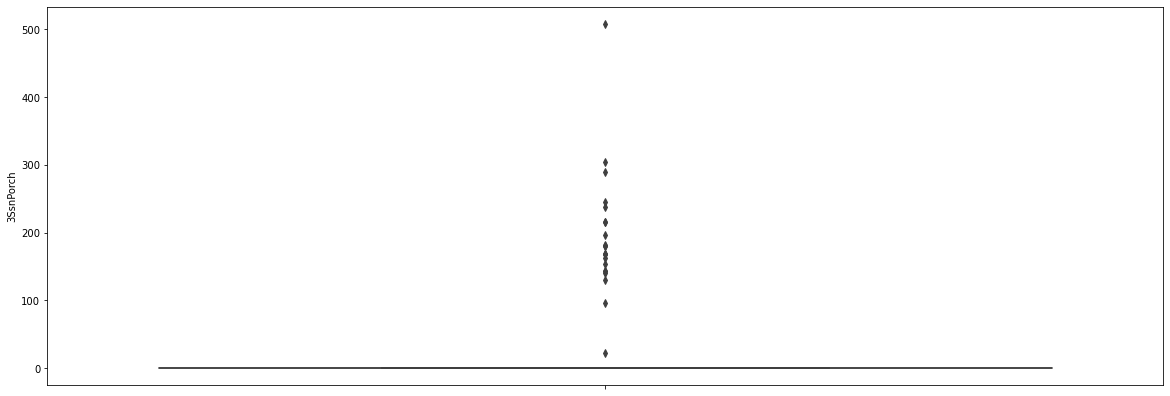

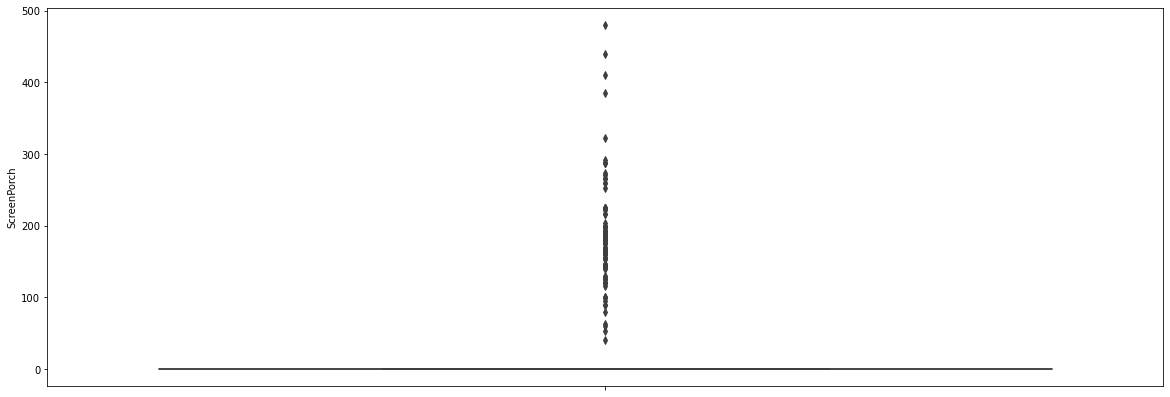

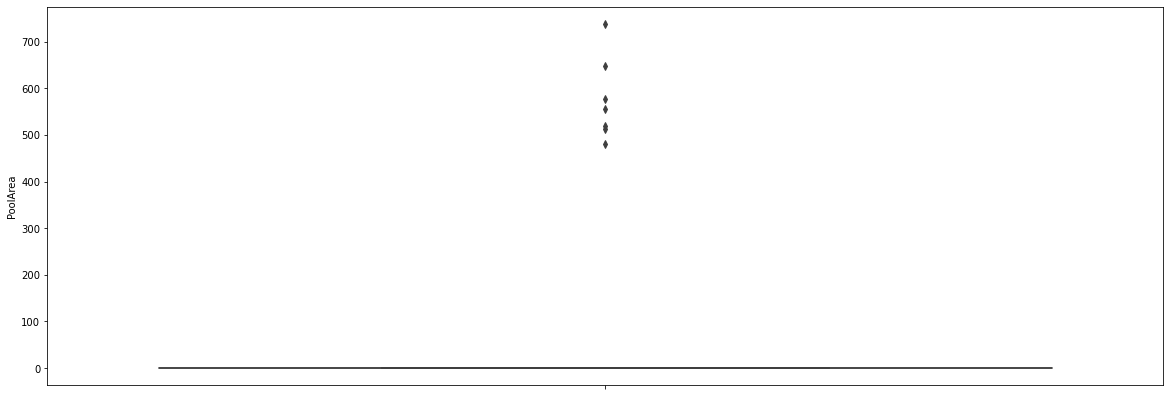

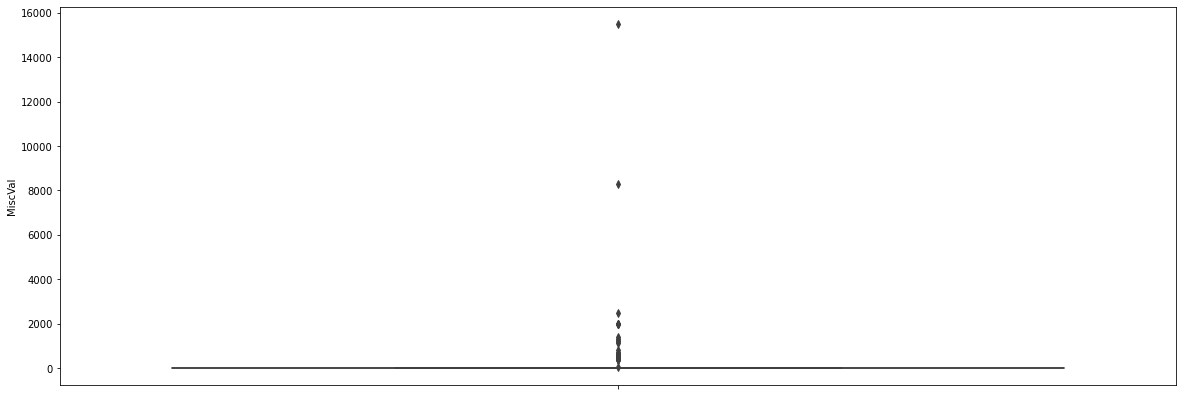

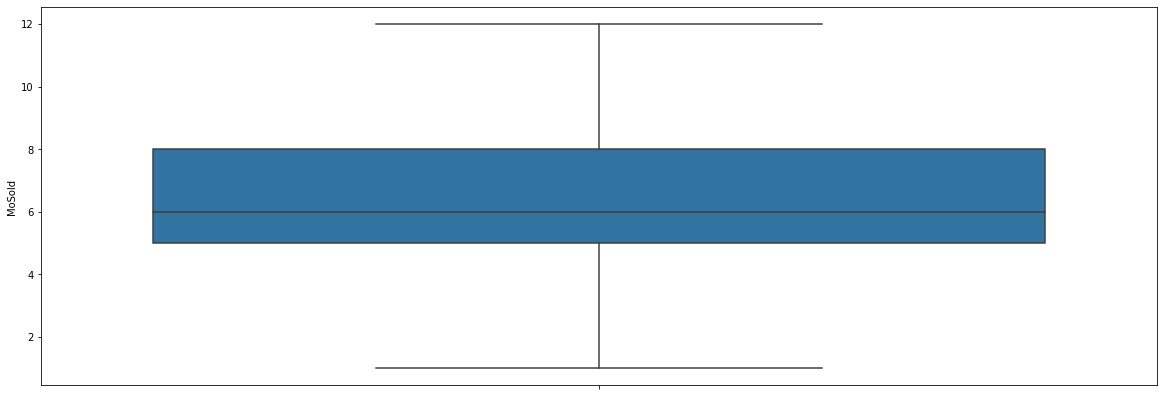

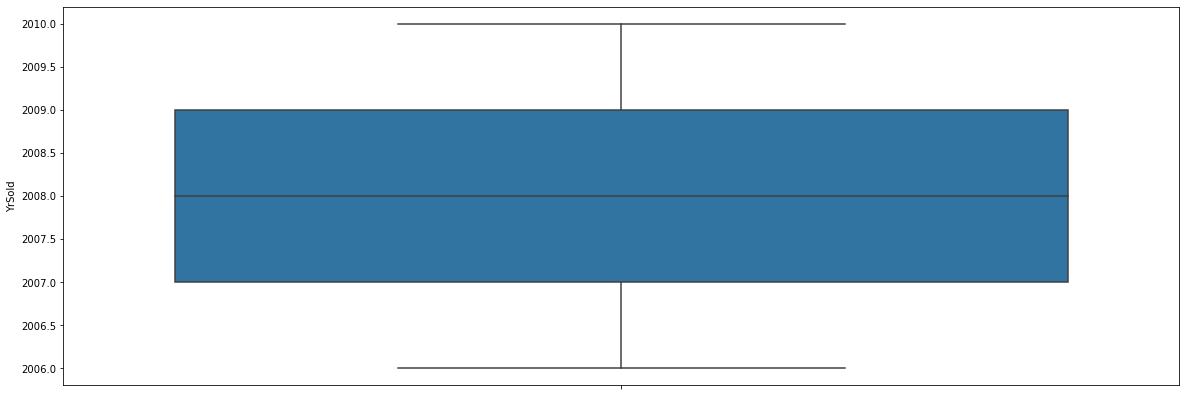

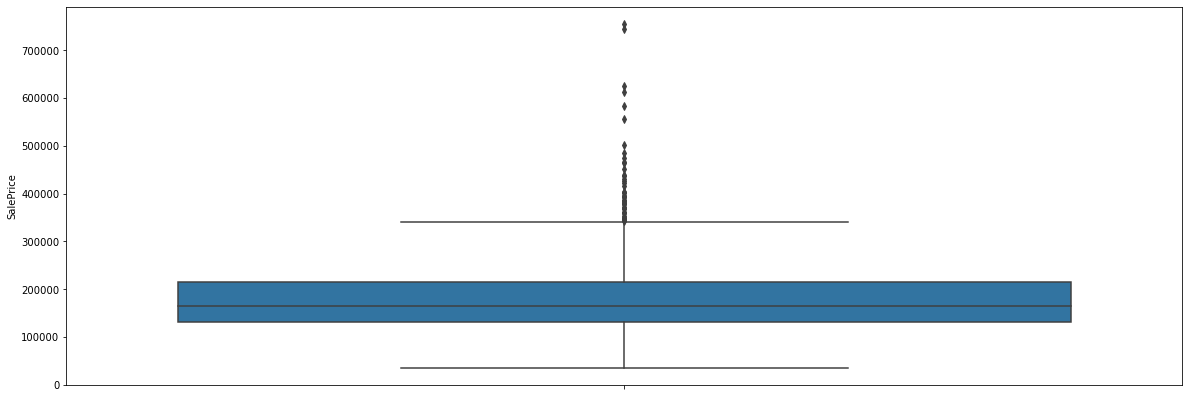

In [107]:
counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continous_columns[i],hue = continous_columns[i],data=df)
        plt.show()

# Removing Outliers

In [108]:
for i in continous_columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

# Check Skewness

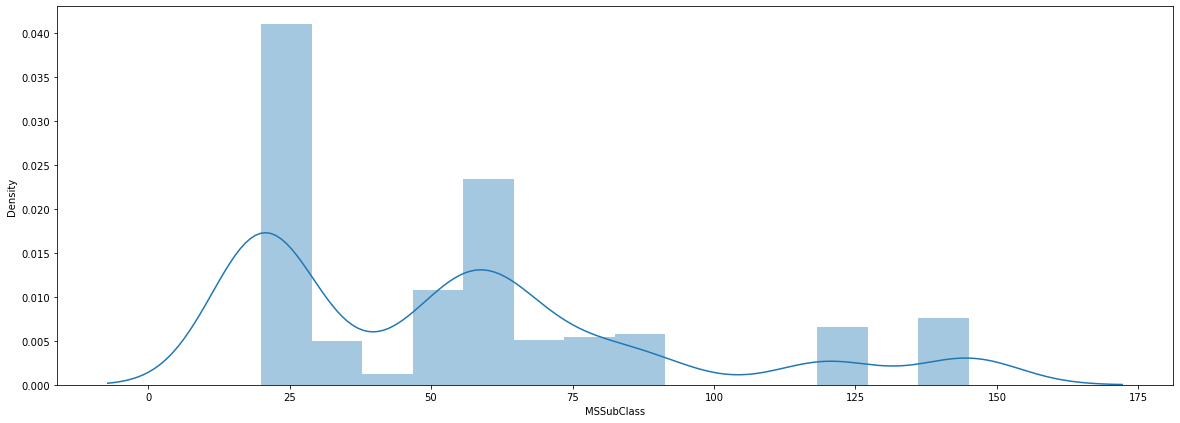

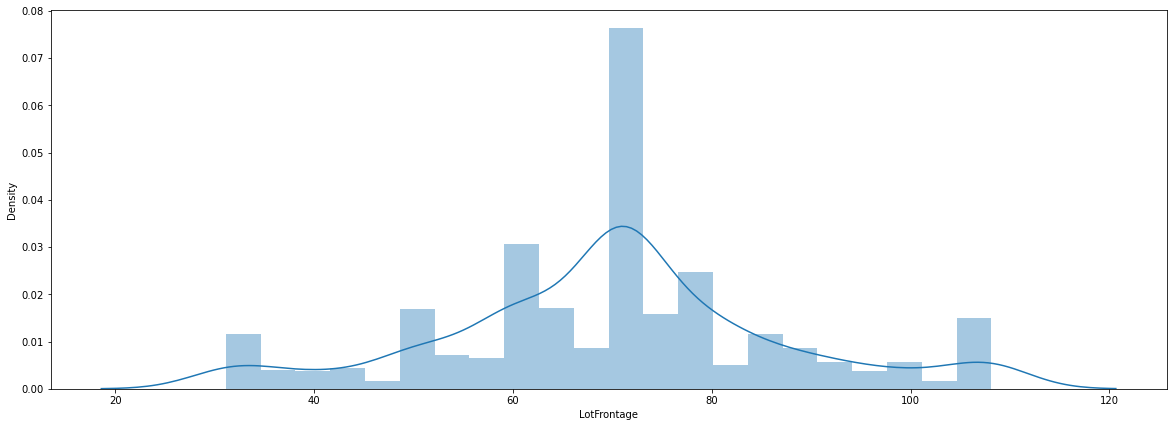

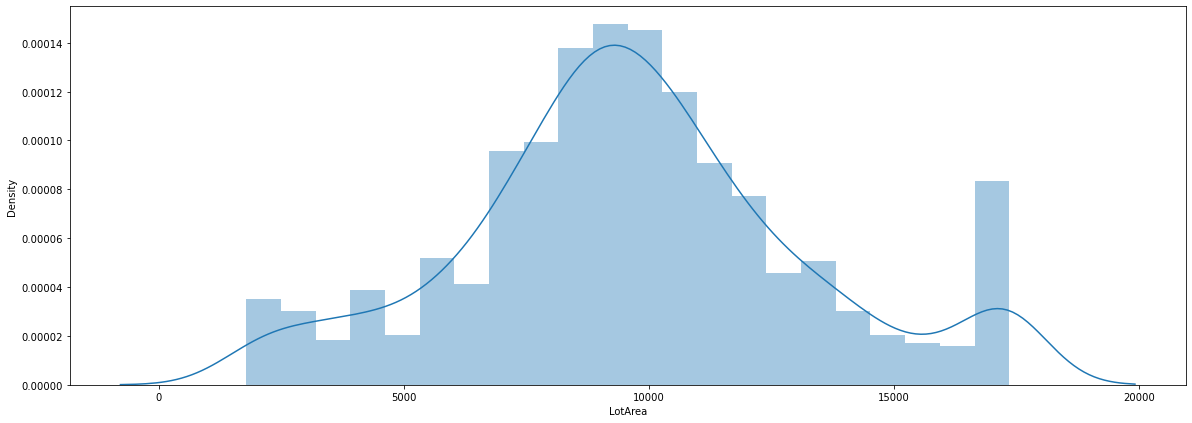

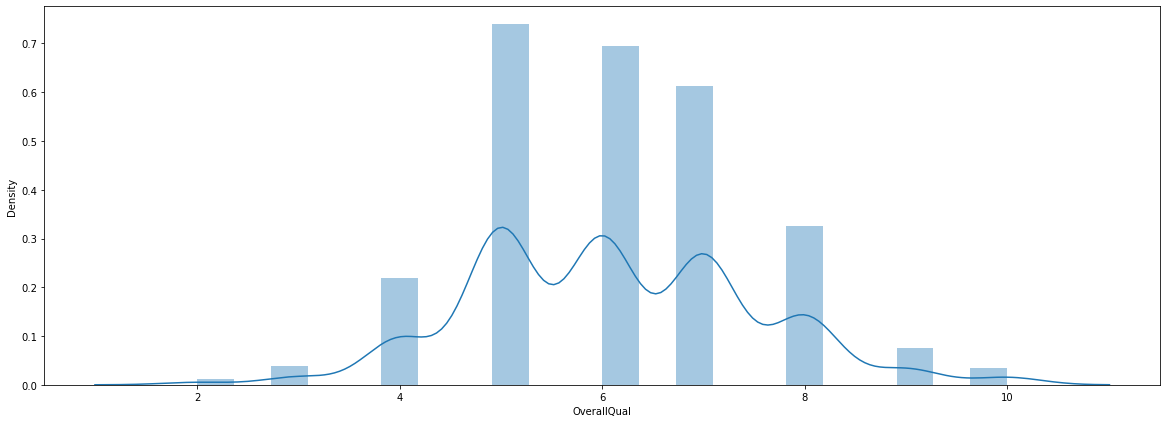

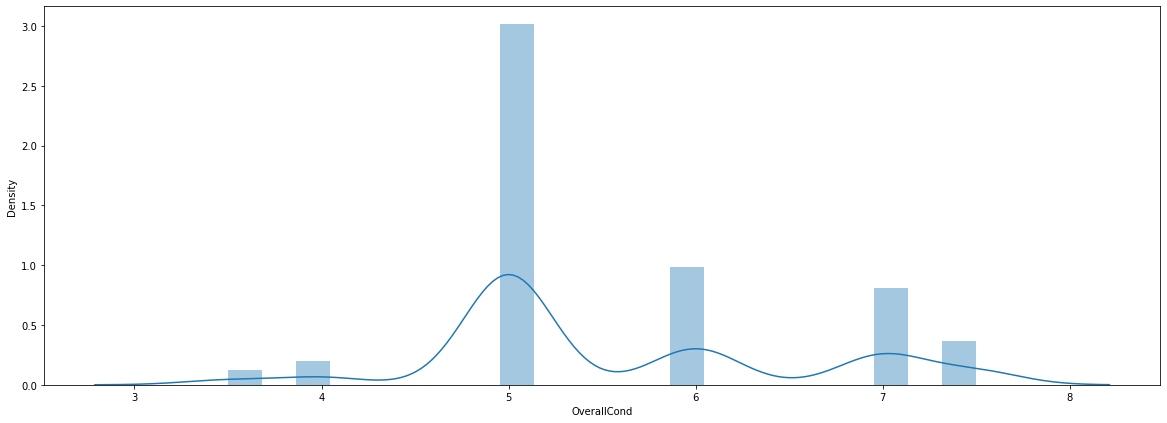

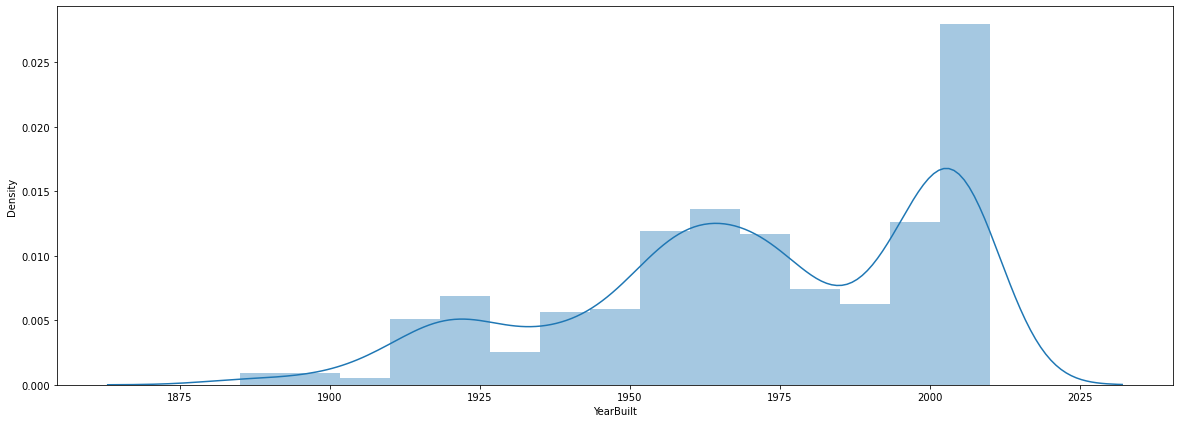

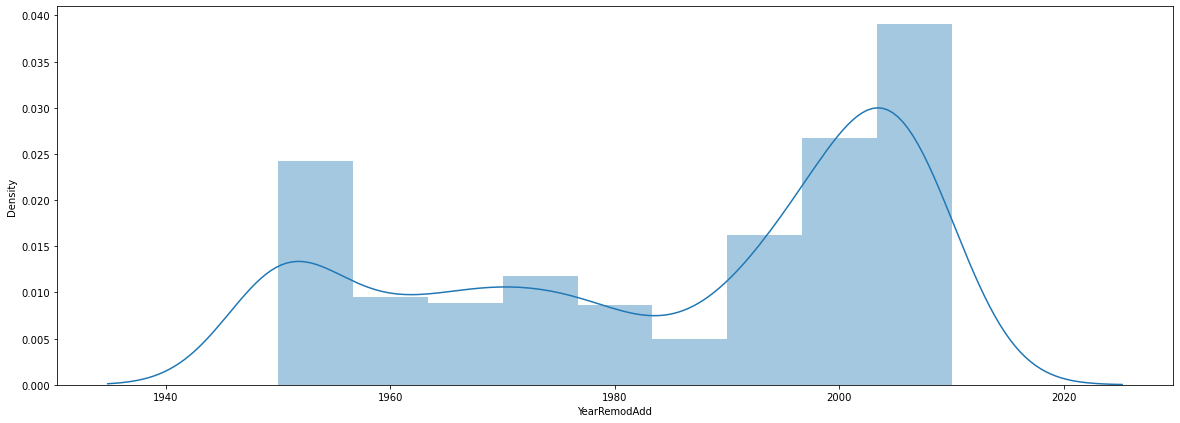

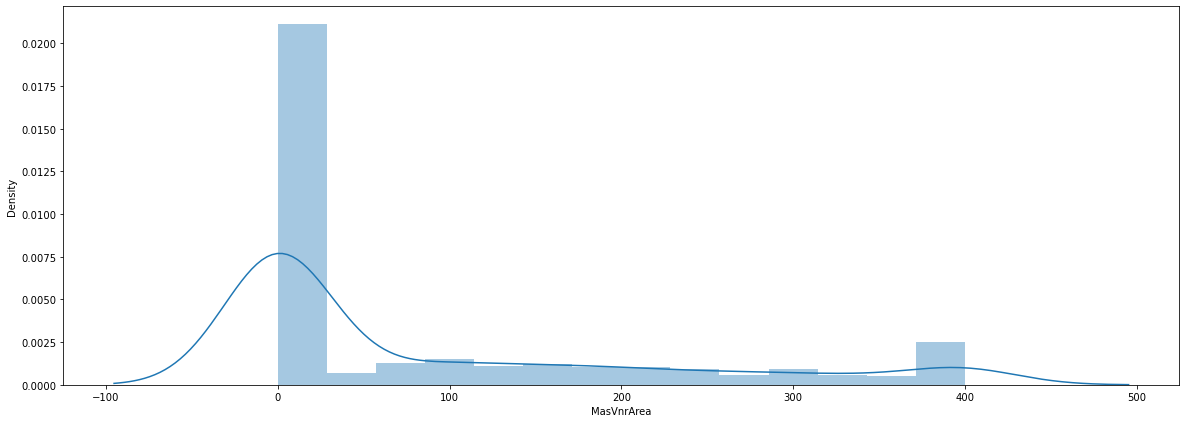

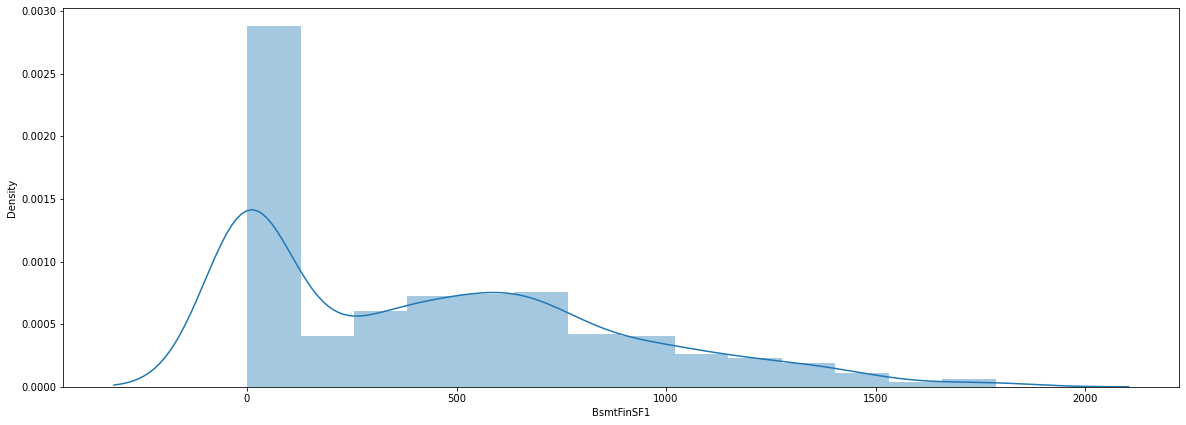

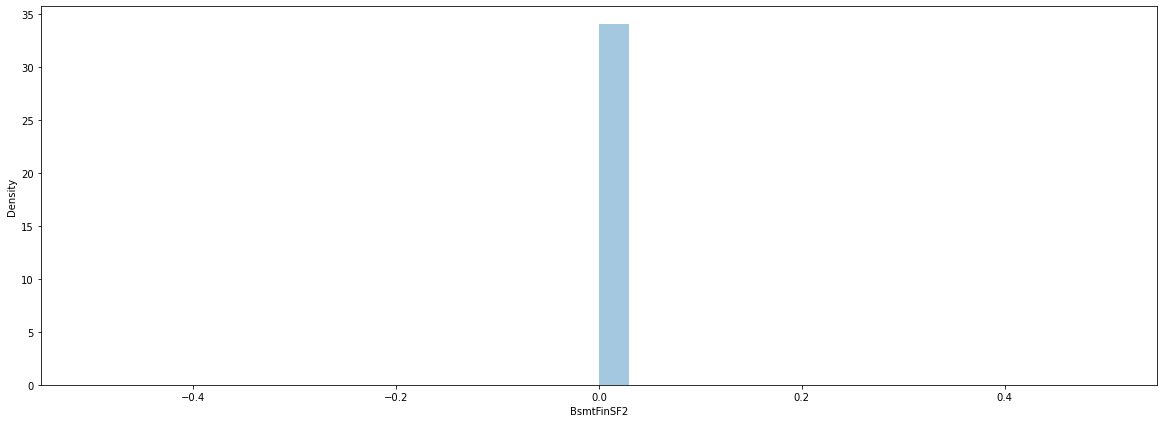

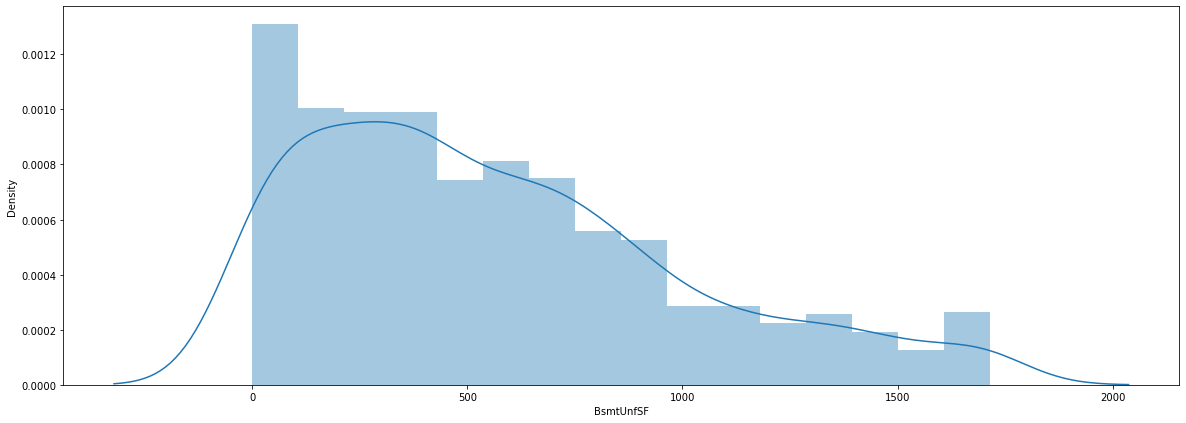

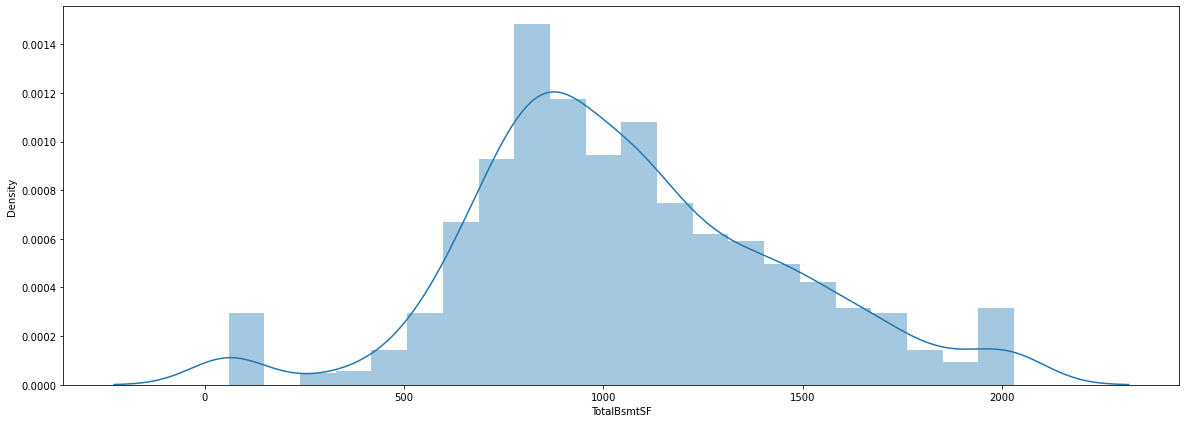

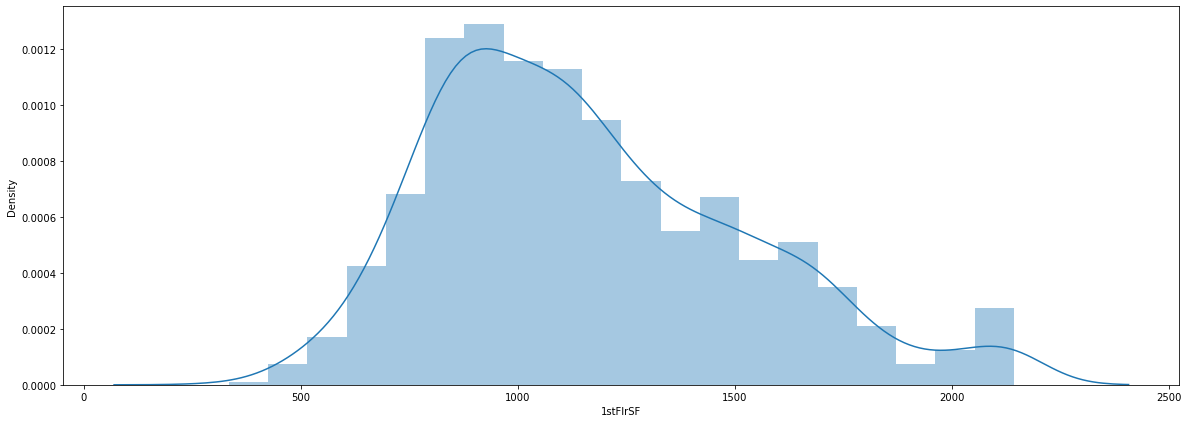

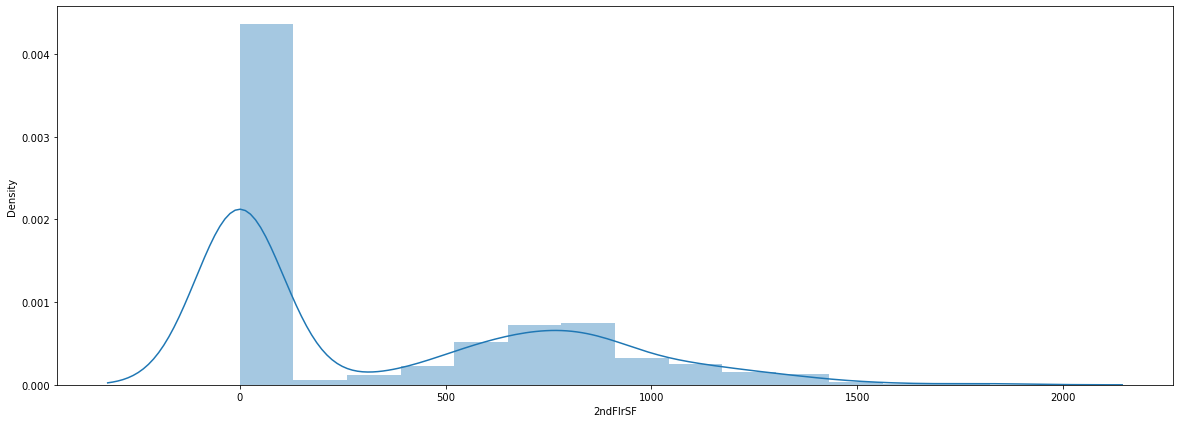

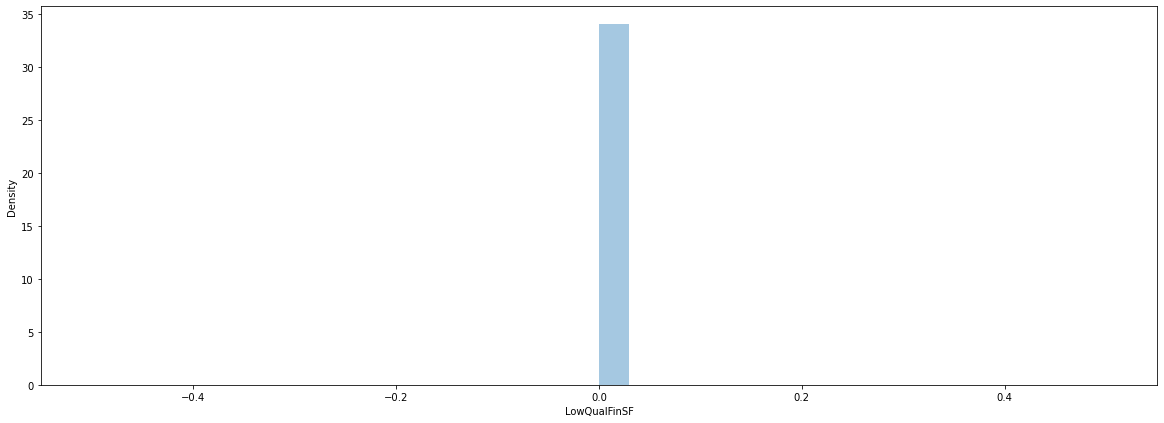

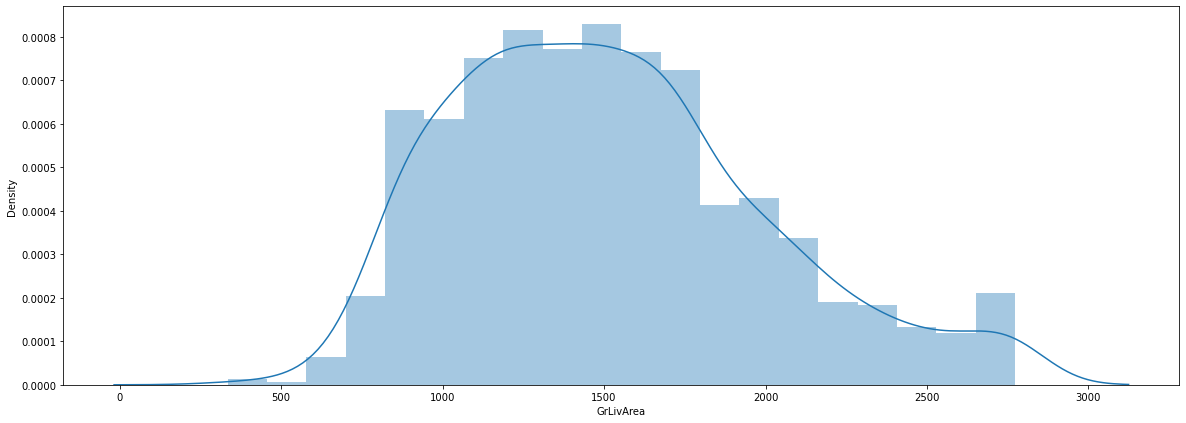

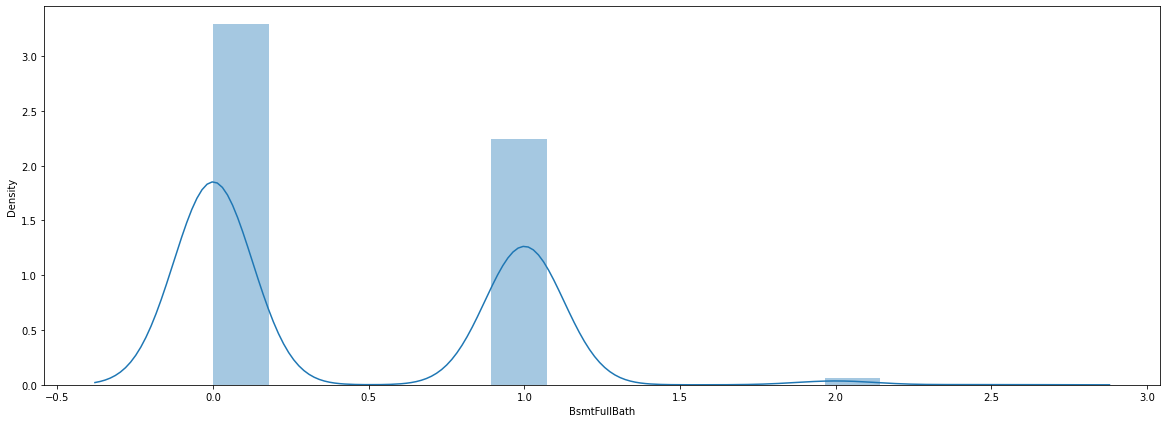

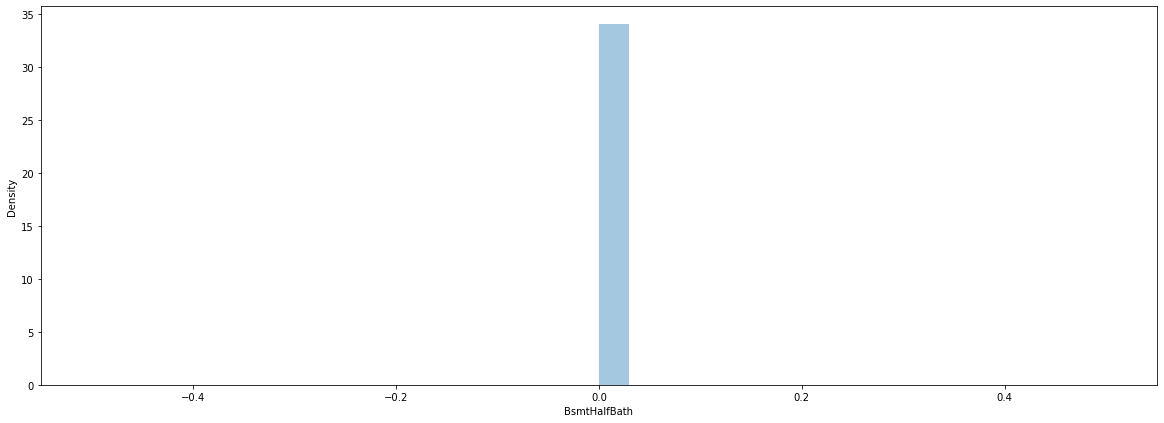

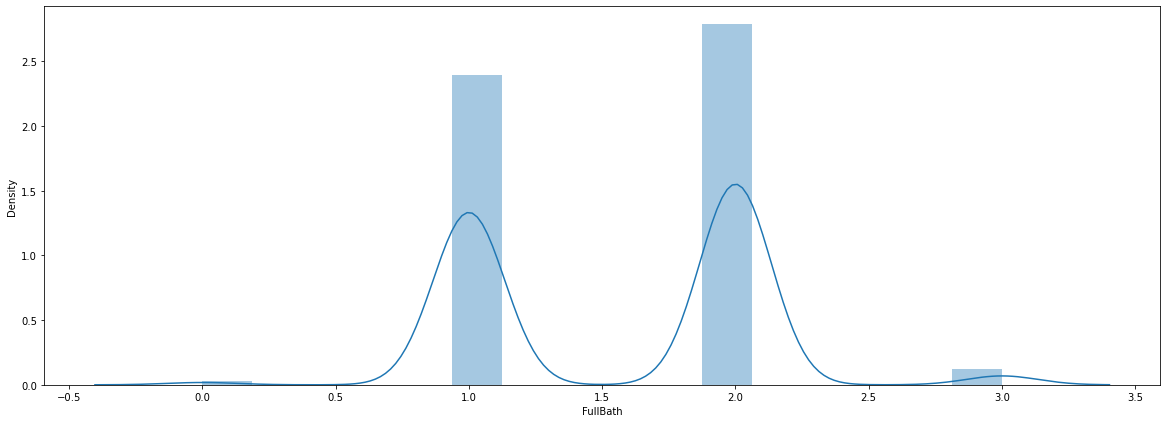

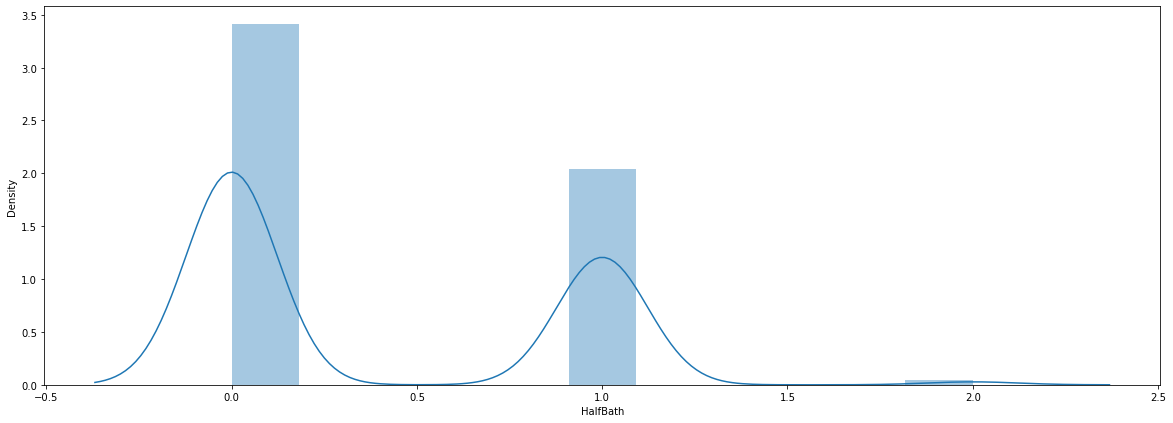

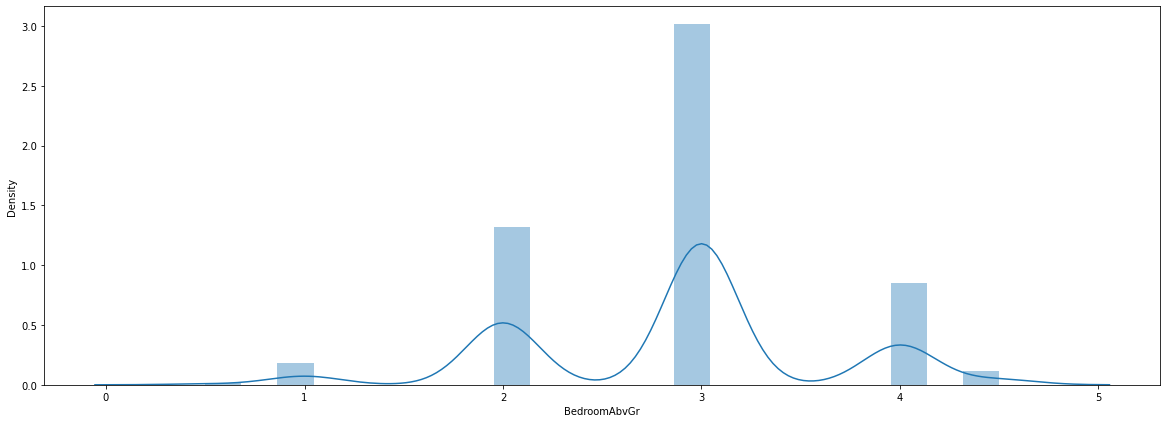

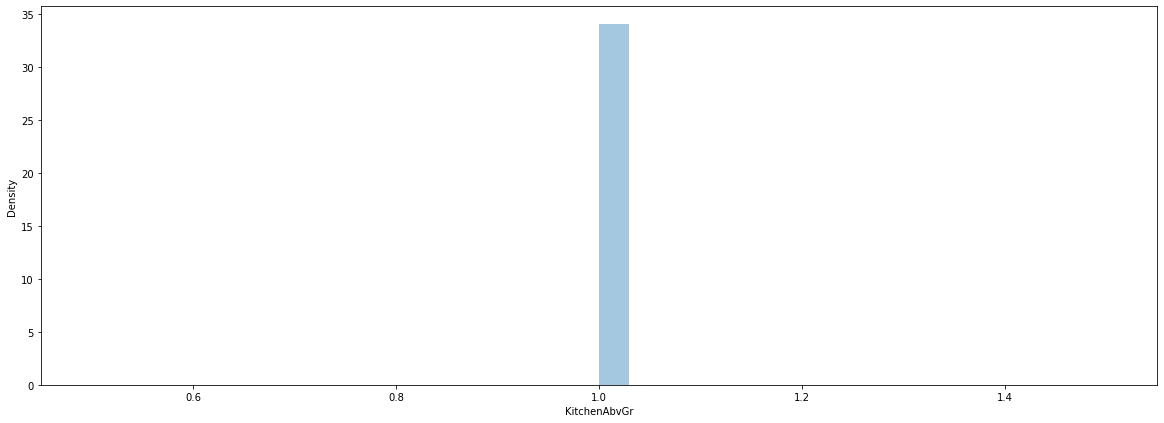

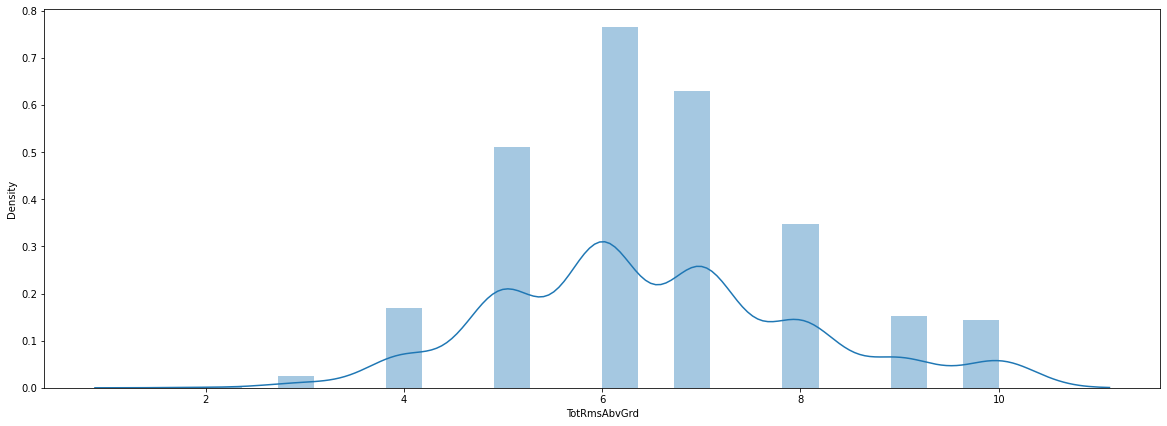

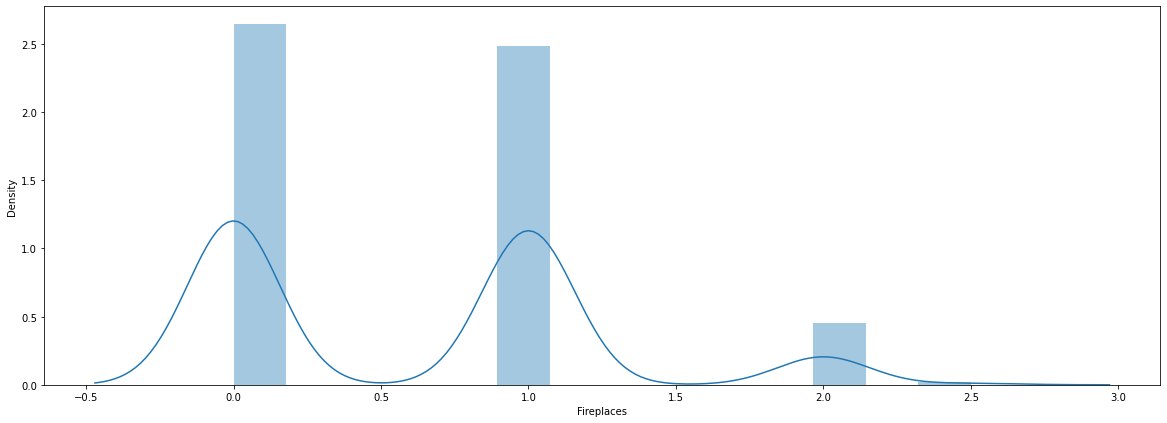

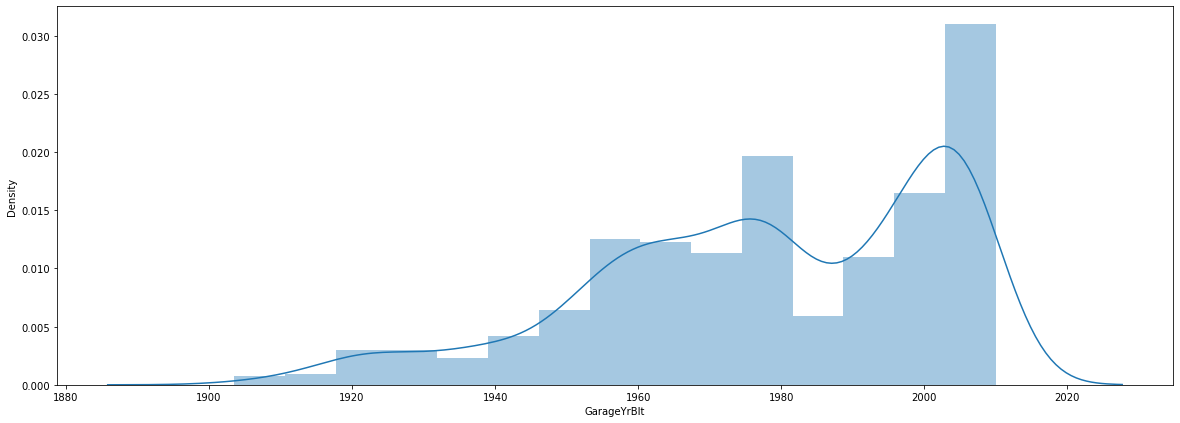

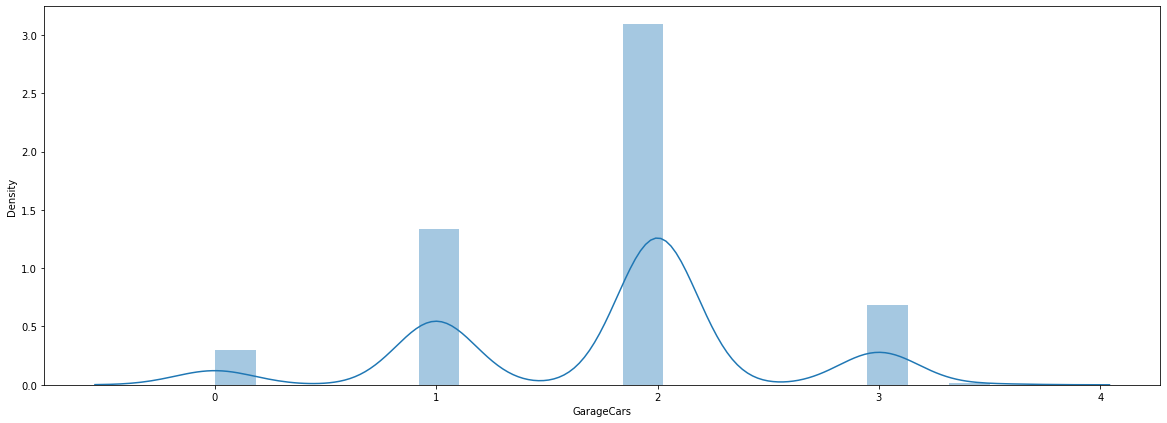

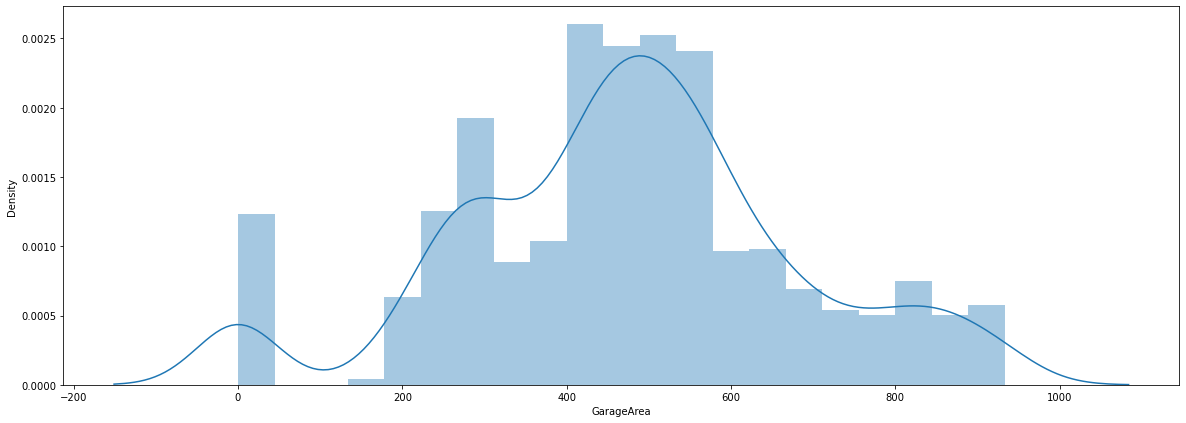

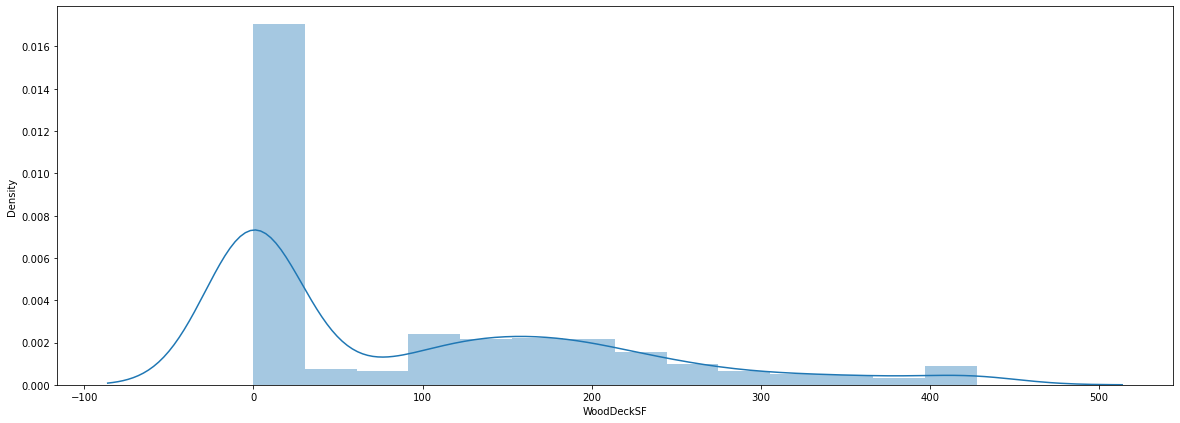

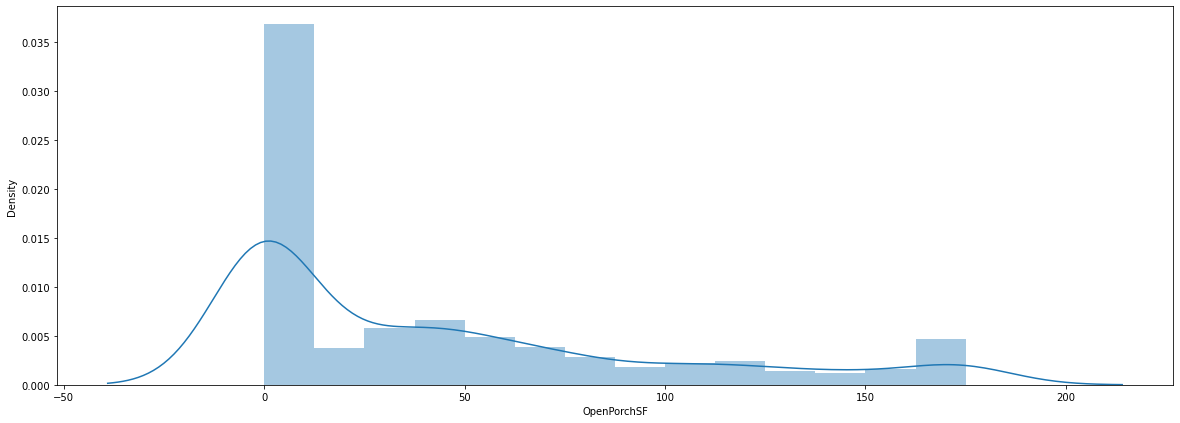

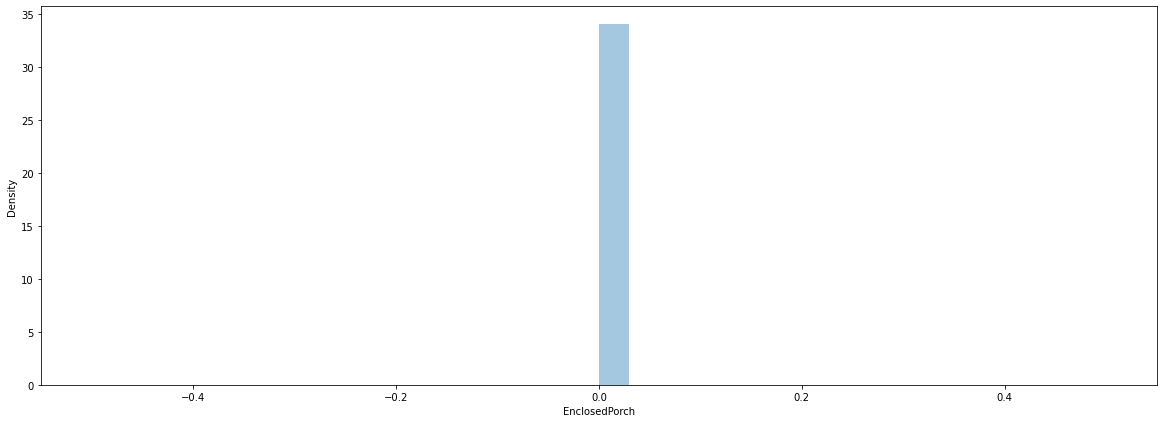

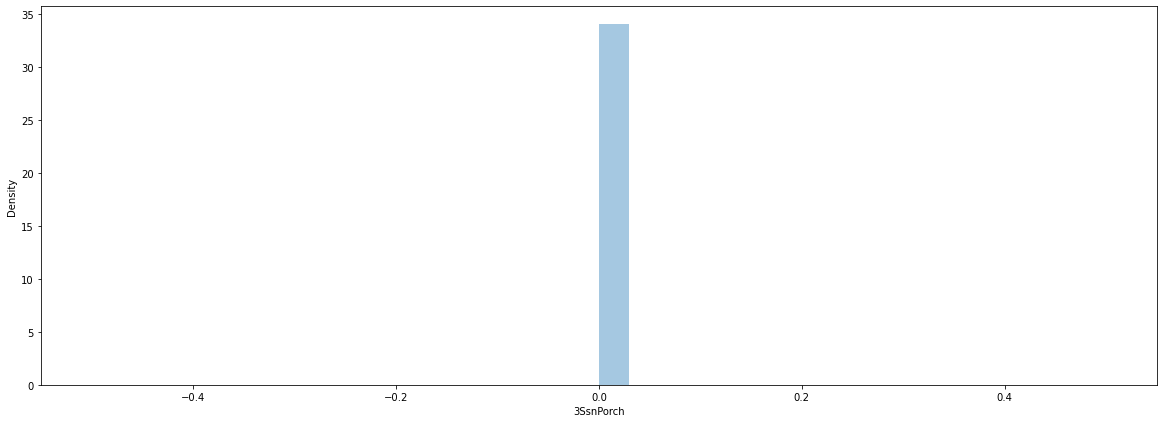

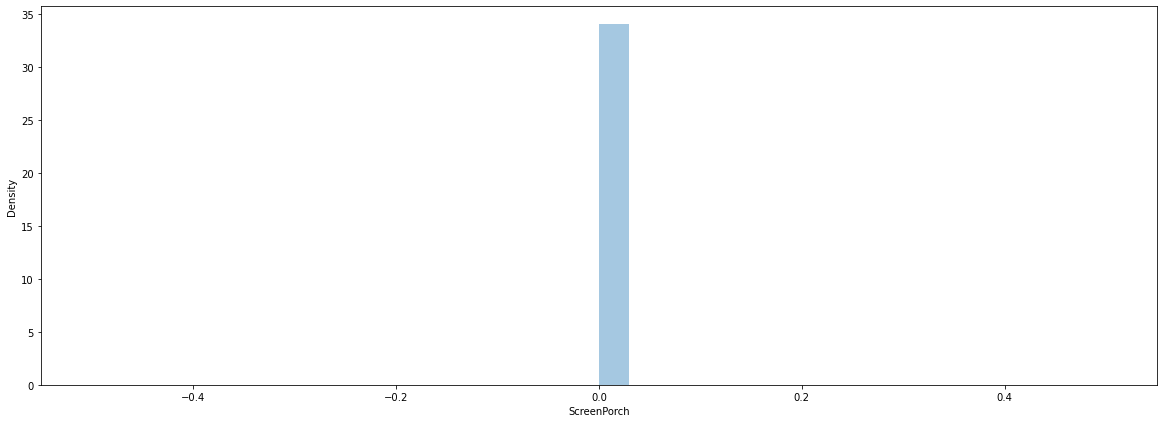

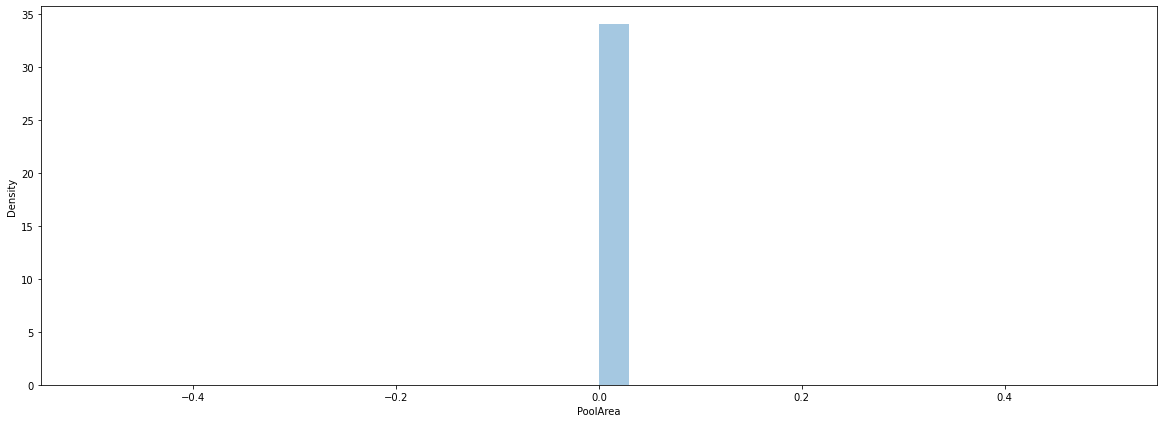

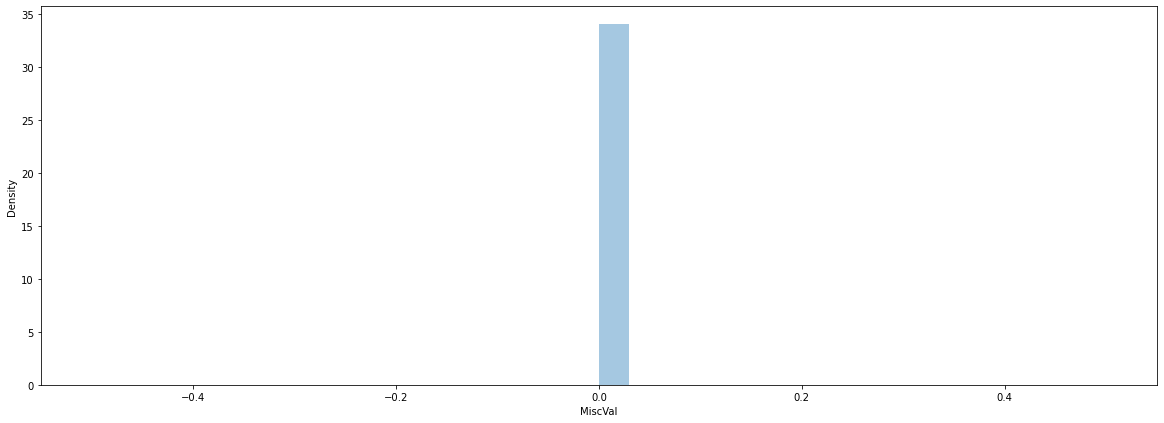

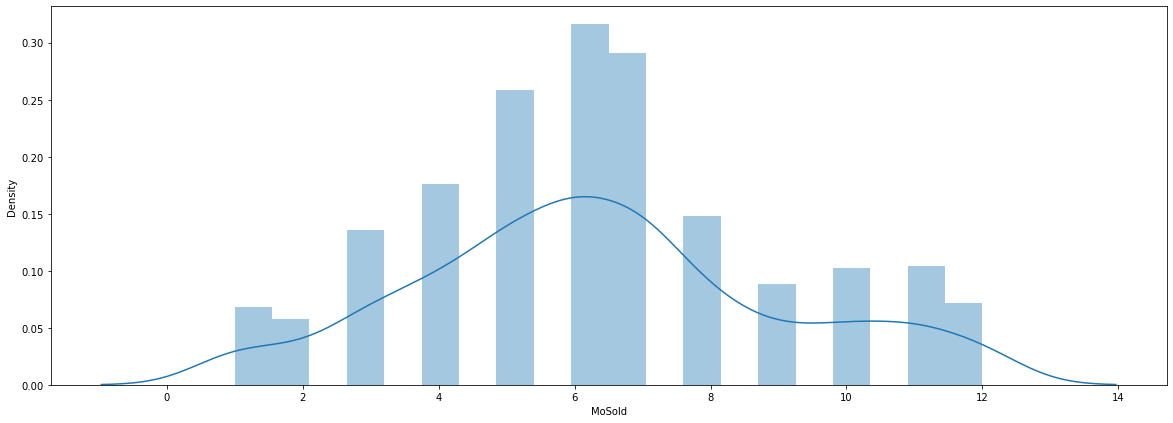

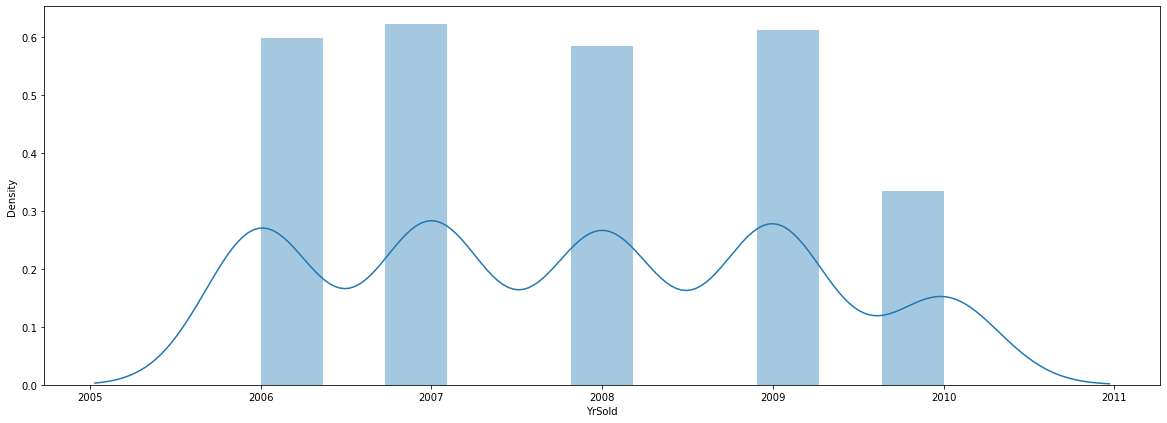

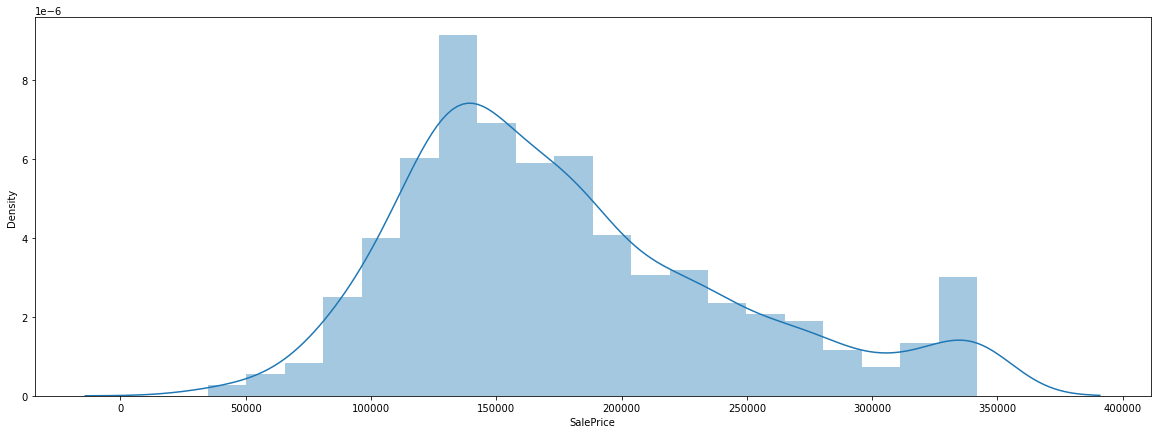

In [109]:
counter=1;
for i in range(0,len(continous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.distplot(df[continous_columns[i]])
        plt.show()

In [110]:
df.skew()

MSSubClass       1.016094
LotFrontage      0.038554
LotArea          0.184194
OverallQual      0.214841
OverallCond      0.519895
YearBuilt       -0.562031
YearRemodAdd    -0.495864
MasVnrArea       1.287681
BsmtFinSF1       0.742226
BsmtFinSF2       0.000000
BsmtUnfSF        0.789228
TotalBsmtSF      0.243671
1stFlrSF         0.663710
2ndFlrSF         0.808038
LowQualFinSF     0.000000
GrLivArea        0.587651
BsmtFullBath     0.586778
BsmtHalfBath     0.000000
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr    -0.245803
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.373806
Fireplaces       0.593950
GarageYrBlt     -0.660364
GarageCars      -0.407821
GarageArea      -0.107166
WoodDeckSF       1.060148
OpenPorchSF      1.154030
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.220979
YrSold           0.115765
SalePrice        0.786602
dtype: float64

In [111]:
from sklearn.preprocessing import power_transform

df[['SalePrice','OpenPorchSF','WoodDeckSF','GarageCars','GarageYrBlt','MSSubClass','Fireplaces','OverallQual','TotRmsAbvGrd','2ndFlrSF','1stFlrSF']]=power_transform(df[['SalePrice','OpenPorchSF','WoodDeckSF','GarageCars','GarageYrBlt','MSSubClass','Fireplaces','OverallQual','TotRmsAbvGrd','2ndFlrSF','1stFlrSF']])
   

# Encoding:

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          11         3           39       76       1         0            3   
1           0         3           64      804       1         0            3   
2           5         3           61      445       1         0            3   
3           0         3           74      628       1         0            3   
4           0         3           39      817       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          4          1  ...              0          0   
2          0          1          0  ...              0          0   
3          0          4          0  ...              0          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       1       1         8              4   
1            0         0        0       9       1         8              4   
2            0         0        0       5       1         8              4   
3            0         0        0       0       4         0              4   
4            0         0        0       5       3         8              4   

   SalePrice  
0        129  
1        468  
2        470  
3        326  
4        379  

[5 rows x 75 columns]

In [114]:
df1.shape

(1168, 75)

# Correlation using HEAT map:

In [115]:
# Checking the correlation between features and the target
cor = df1.corr()
cor


MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.010114    -0.342426 -0.298814 -0.023755   
MSZoning         0.010114  1.000000    -0.083345 -0.050975  0.140215   
LotFrontage     -0.342426 -0.083345     1.000000  0.574758 -0.039344   
LotArea         -0.298814 -0.050975     0.574758  1.000000 -0.056229   
Street          -0.023755  0.140215    -0.039344 -0.056229  1.000000   
LotShape         0.072124  0.053655    -0.151380 -0.305181 -0.012941   
LandContour     -0.014741  0.001175    -0.001180 -0.010924  0.105226   
Utilities             NaN       NaN          NaN       NaN       NaN   
LotConfig        0.067445 -0.027246    -0.194074 -0.201609  0.000153   
LandSlope       -0.026726 -0.023952     0.018906  0.107229 -0.141572   
Neighborhood     0.007961 -0.251833     0.097424  0.095968  0.001420   
Condition1      -0.044954 -0.025651    -0.020525  0.088015  0.002189   
Condition2      -0.015139  0.031959     0.005776  0.053699  0.001406   
BldgType         0.710065 -0.024776    -0.462809 -0.436481 -0.013606   
HouseStyle       0.447989 -0.110991     0.076034  0.068475  0.016793   
OverallQual      0.104602 -0.134614     0.238785  0.258701  0.057447   
OverallCond     -0.071068  0.189159    -0.056411 -0.029468  0.032228   
YearBuilt        0.053729 -0.297848     0.138664  0.103928  0.021603   
YearRemodAdd     0.065750 -0.174586     0.084121  0.083652  0.057866   
RoofStyle       -0.114012  0.000913     0.172122  0.125290 -0.006875   
RoofMatl        -0.020083  0.009719     0.066640  0.161020  0.007889   
Exterior1st     -0.090732 -0.012037     0.067852  0.063653  0.012482   
Exterior2nd     -0.112387  0.005548     0.094467  0.071112  0.014618   
MasVnrType      -0.033780 -0.033521    -0.078037 -0.054154  0.000822   
MasVnrArea       0.037476 -0.028336     0.224066  0.176810  0.028169   
ExterQual       -0.034690  0.184815    -0.168123 -0.154388  0.044509   
ExterCond        0.019230 -0.099269     0.053024  0.032609  0.017738   
Foundation       0.078238 -0.244844     0.091486  0.045901  0.032701   
BsmtQual        -0.065248  0.123822    -0.179965 -0.181179 -0.031959   
BsmtCond        -0.012313  0.002336     0.062879  0.005509 -0.017190   
BsmtExposure    -0.099189  0.037414    -0.120968 -0.154902  0.065253   
BsmtFinType1     0.039582  0.021518    -0.036630 -0.062226 -0.006420   
BsmtFinSF1      -0.058543 -0.045920     0.142875  0.193769 -0.012755   
BsmtFinType2     0.043867 -0.031322    -0.019185 -0.072340  0.045208   
BsmtFinSF2            NaN       NaN          NaN       NaN       NaN   
BsmtUnfSF       -0.130009 -0.024538     0.118458  0.073099  0.023506   
TotalBsmtSF     -0.243073 -0.074319     0.328877  0.361102  0.019769   
Heating          0.068306  0.051188    -0.044008 -0.039914  0.006981   
HeatingQC       -0.005883  0.119852    -0.059127 -0.055729 -0.047968   
CentralAir      -0.092664 -0.015887     0.097455  0.106185  0.043024   
Electrical       0.059179 -0.079205     0.081923  0.083592  0.038720   
1stFlrSF        -0.210842 -0.041014     0.366518  0.434685  0.013397   
2ndFlrSF         0.309630 -0.076083     0.150688  0.193633  0.041266   
LowQualFinSF          NaN       NaN          NaN       NaN       NaN   
GrLivArea        0.154675 -0.085288     0.327347  0.444415  0.047418   
BsmtFullBath    -0.002391 -0.007287     0.062129  0.101457 -0.036483   
BsmtHalfBath          NaN       NaN          NaN       NaN       NaN   
FullBath         0.184226 -0.188837     0.187633  0.236767  0.033208   
HalfBath         0.210882 -0.121209     0.063244  0.132080  0.045146   
BedroomAbvGr     0.015472  0.001639     0.281618  0.288824  0.027968   
KitchenAbvGr          NaN       NaN          NaN       NaN       NaN   
KitchenQual     -0.023904  0.111689    -0.159425 -0.153340 -0.012056   
TotRmsAbvGrd     0.112652 -0.029469     0.335290  0.401017  0.039050   
Functional       0.040903 -0.091684     0.035431 -0.030676 -0.015309   
Fireplaces      -0.007823  0.010658     0.223389  0.363

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5]),
 [Text(0, 0.5, 'MSSubClass'),
  Text(0, 1.5, 'MSZoning'),
  Text(0, 2.5, 'LotFrontage'),
  Text(0, 3.5, 'LotArea'),
  Text(0, 4.5, 'Street'),
  Text(0, 5.5, 'LotShape'),
  Text(0, 6.5, 'LandContour'),
  Text(0, 7.5, 'Utilities'),
  Text(0, 8.5, 'LotConfig'),
  Text(0, 9.5, 'LandSlope'),
  Text(0, 10.5, 'Neighborhood'),
  Text(0, 11.5, 'Condition1'),
  Text(0, 12.5, 'Condition2'),
  Text(0, 13.5, 'BldgType'),
  Text(0, 14.5, 'HouseStyle'),
  Text(0, 15.5, 'OverallQual'),
  Text(0, 16.5, '

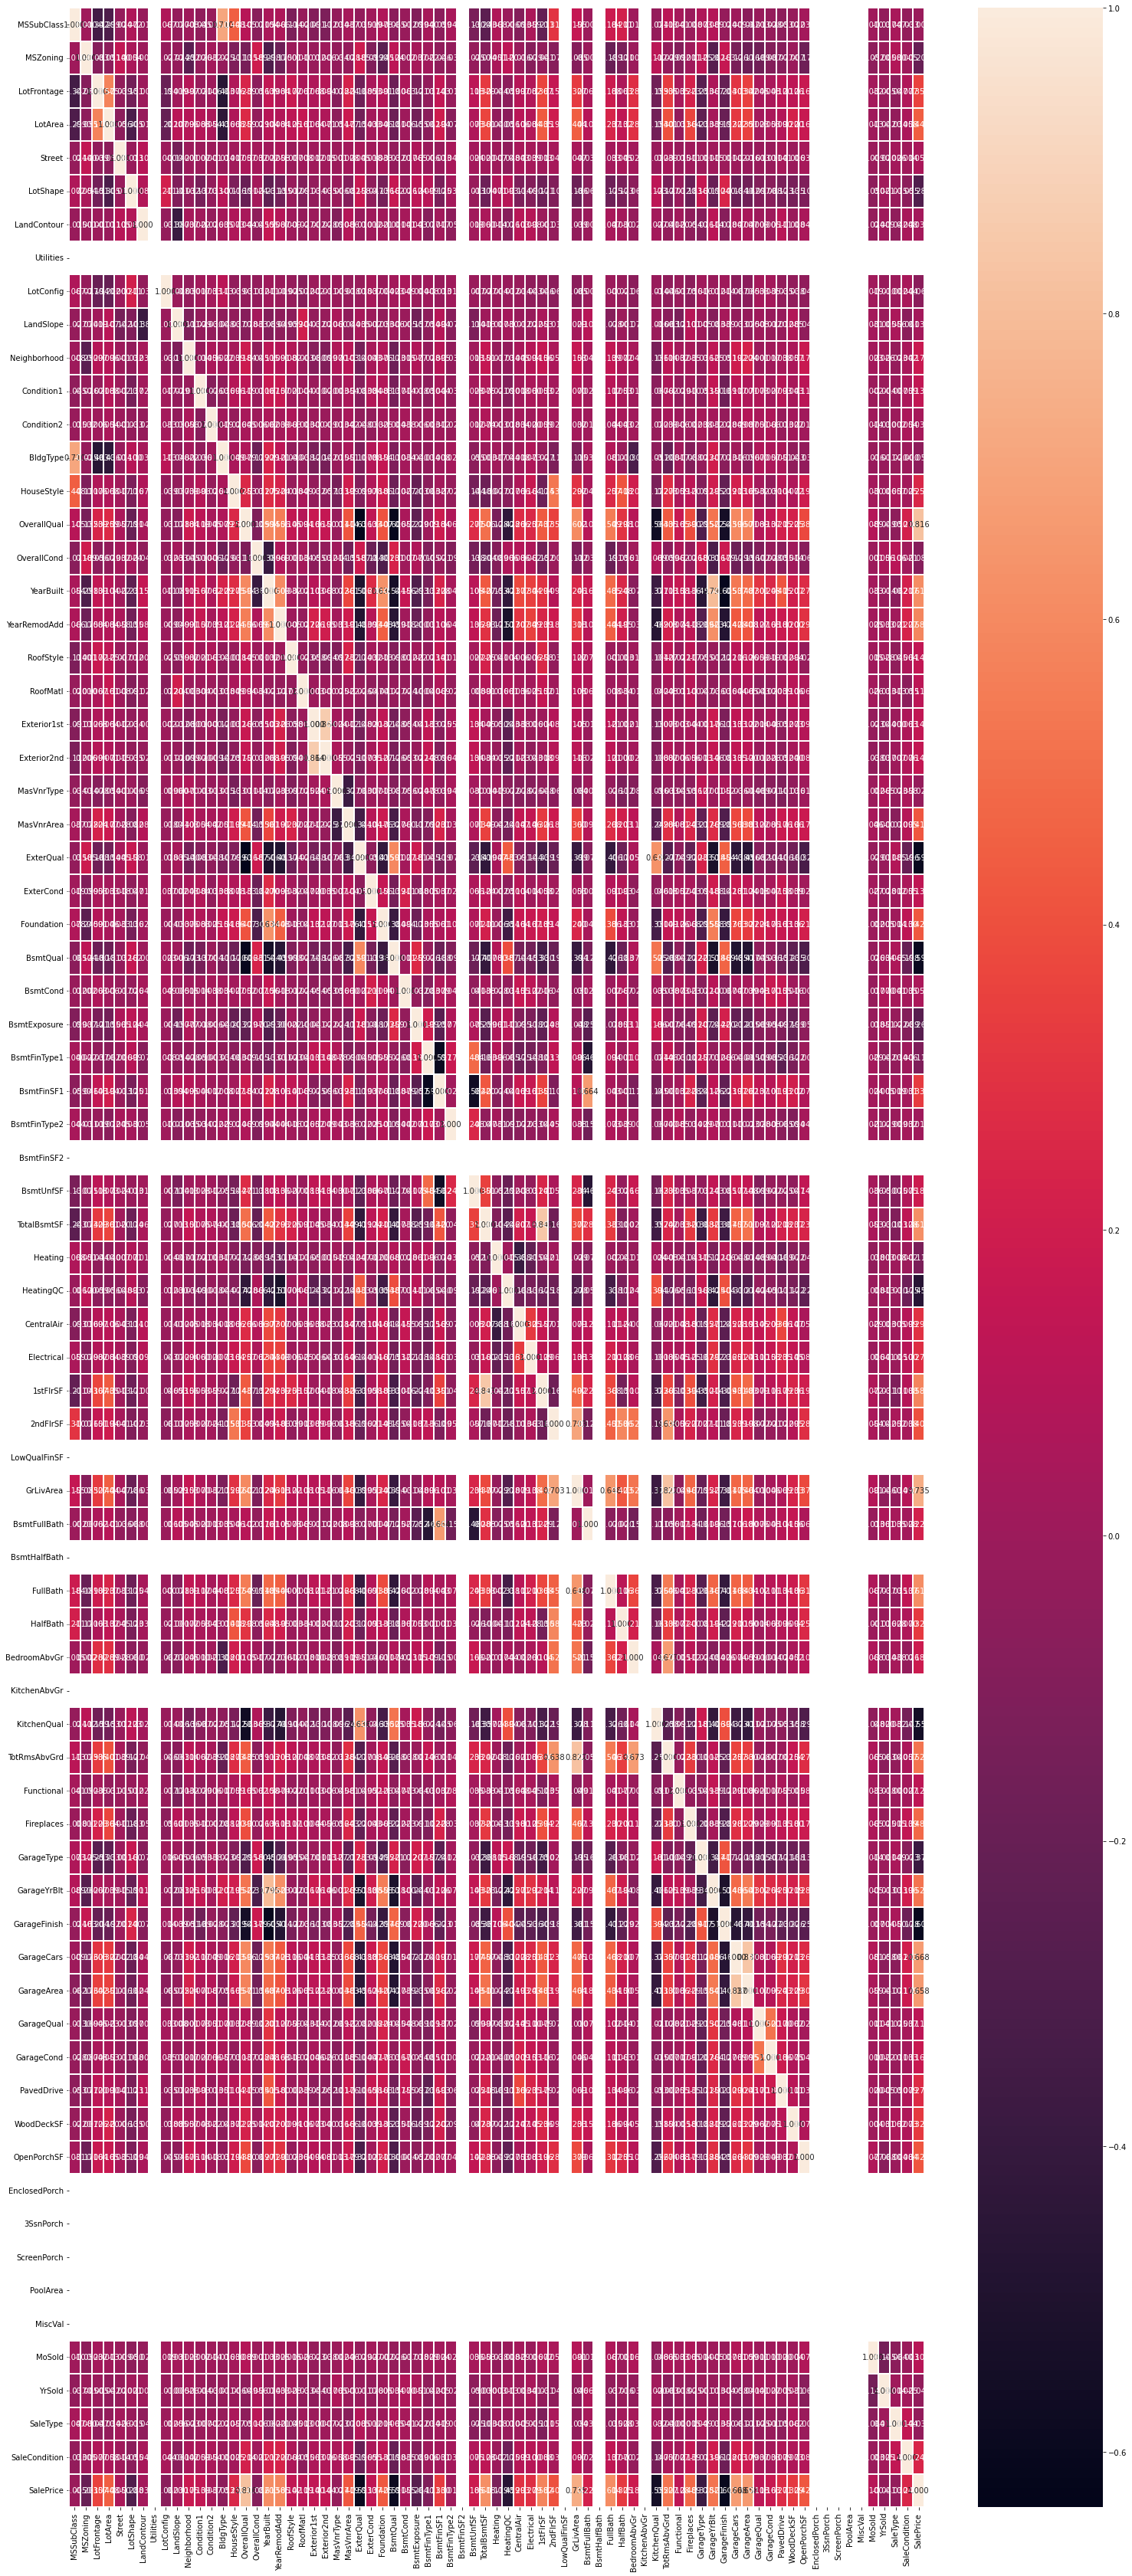

In [116]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,60))
sns.heatmap(df1.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [117]:
cor['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.815539
GrLivArea        0.734977
GarageCars       0.668251
GarageArea       0.657658
TotalBsmtSF      0.618133
FullBath         0.614479
YearBuilt        0.612614
YearRemodAdd     0.584670
1stFlrSF         0.582021
TotRmsAbvGrd     0.526730
GarageYrBlt      0.521480
Fireplaces       0.488701
LotArea          0.448233
Foundation       0.425140
OpenPorchSF      0.419613
MasVnrArea       0.419464
2ndFlrSF         0.405469
LotFrontage      0.356701
BsmtFinSF1       0.329685
WoodDeckSF       0.328641
HalfBath         0.324938
CentralAir       0.293371
Electrical       0.278728
PavedDrive       0.271384
HouseStyle       0.251775
SaleCondition    0.245029
BsmtFullBath     0.220252
BedroomAbvGr     0.188141
BsmtUnfSF        0.184626
Neighborhood     0.175134
GarageCond       0.162914
Exterior2nd      0.143811
RoofStyle        0.142035
Exterior1st      0.140486
Condition1       0.138546
ExterCond        0.136913
Functional       0.128365
RoofMatl    

In [118]:
df1.drop(['Utilities','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace=True,axis=1)

# Visualizing the correlation between label and features using bar plot

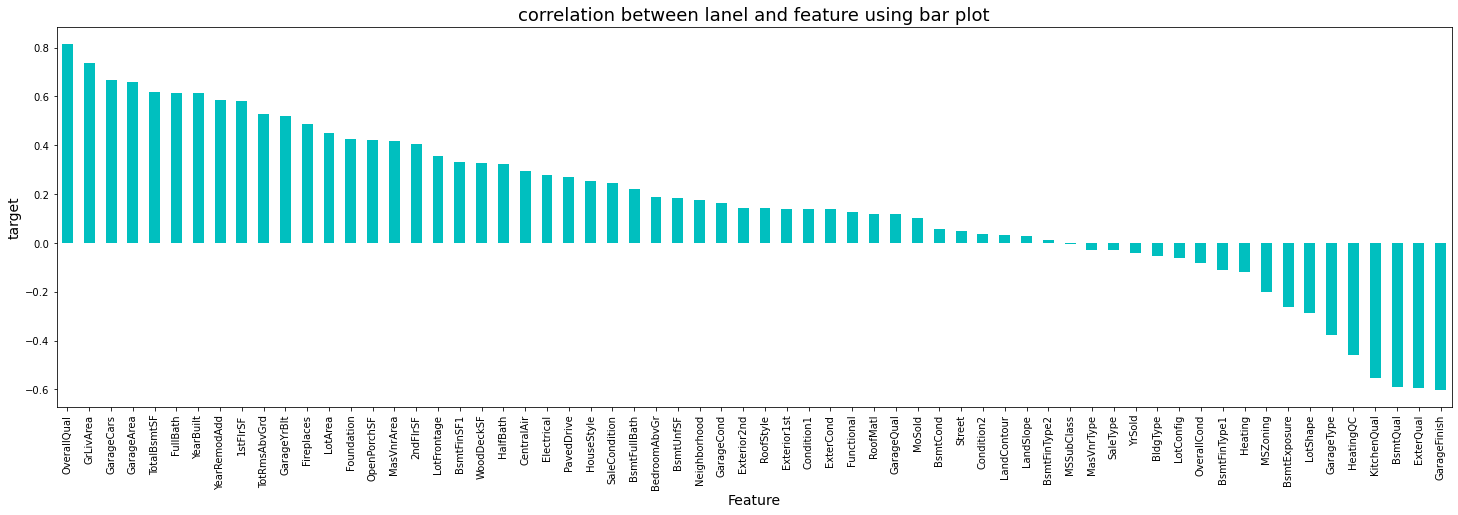

In [119]:
plt.figure(figsize=(25,7))
df1.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [120]:
df1.drop(['MSSubClass','BsmtFinType2'],inplace=True,axis=1)

# Dividing data in feature and Label

In [121]:
x=df1.drop(columns='SalePrice')#Feature
y=df1.SalePrice#Target

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.75      , 0.5       , 0.09178744, ..., 0.25      , 1.        ,
        0.8       ],
       [0.75      , 0.82051282, 0.97101449, ..., 0.25      , 1.        ,
        0.8       ],
       [0.75      , 0.78205128, 0.53743961, ..., 0.25      , 1.        ,
        0.8       ],
       ...,
       [0.75      , 0.        , 0.01328502, ..., 0.75      , 1.        ,
        0.8       ],
       [0.        , 0.23076923, 0.33333333, ..., 0.5       , 1.        ,
        0.8       ],
       [0.75      , 0.5       , 0.25966184, ..., 0.        , 1.        ,
        0.8       ]])

# Now use VIF for checking multicollinearity problem
VIF - > Variance Inflation Factor

In [123]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [124]:
vif

vif        feature
0    31.491271       MSZoning
1    11.802728    LotFrontage
2     8.455476        LotArea
3   213.081077         Street
4     3.670786       LotShape
5    20.890553    LandContour
6     4.957274      LotConfig
7     1.439265      LandSlope
8     6.340203   Neighborhood
9     7.270322     Condition1
10   65.876401     Condition2
11    2.144844       BldgType
12    7.327614     HouseStyle
13   36.640900    OverallQual
14   13.121320    OverallCond
15   51.463692      YearBuilt
16   11.177530   YearRemodAdd
17    4.797558      RoofStyle
18    4.472658       RoofMatl
19   37.201168    Exterior1st
20   35.554046    Exterior2nd
21   12.408796     MasVnrType
22    2.601944     MasVnrArea
23   37.423102      ExterQual
24   31.135838      ExterCond
25    9.831160     Foundation
26   18.191087       BsmtQual
27   21.495166       BsmtCond
28    7.269479   BsmtExposure
29    6.323138   BsmtFinType1
30    9.538482     BsmtFinSF1
31   14.568218      BsmtUnfSF
32   29.237002    TotalBsmtSF
33   16.283745        Heating
34    3.029038      HeatingQC
35   24.726896     CentralAir
36   18.417508     Electrical
37   34.795780       1stFlrSF
38   12.063283       2ndFlrSF
39   44.378879      GrLivArea
40    3.474279   BsmtFullBath
41   28.090291       FullBath
42    3.662110       HalfBath
43   38.675268   BedroomAbvGr
44   17.998658    KitchenQual
45   45.940556   TotRmsAbvGrd
46   40.488707     Functional
47    3.202701     Fireplaces
48    4.414724     GarageType
49   35.045302    GarageYrBlt
50    6.859012   GarageFinish
51   30.804896     GarageCars
52   15.764094     GarageArea
53   69.703662     GarageQual
54   93.356021     GarageCond
55   21.613713     PavedDrive
56    1.946411     WoodDeckSF
57    2.257484    OpenPorchSF
58    5.313844         MoSold
59    3.071931         YrSold
60   24.531903       SaleType
61   14.639321  SaleCondition

# Droping columns whose having multicollinearity

In [125]:
x.drop(columns=['Street','GarageCond','GarageQual','Condition2'],axis=1,inplace=True)

In [126]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

features        vif
0        MSZoning   1.307087
1     LotFrontage   2.044585
2         LotArea   2.250974
3        LotShape   1.279958
4     LandContour   1.300626
5       LotConfig   1.142765
6       LandSlope   1.412093
7    Neighborhood   1.248243
8      Condition1   1.132658
9        BldgType   1.859331
10     HouseStyle   2.050875
11    OverallQual   3.741770
12    OverallCond   1.918178
13      YearBuilt   7.608397
14   YearRemodAdd   2.930657
15      RoofStyle   1.248445
16       RoofMatl   1.156826
17    Exterior1st   4.226890
18    Exterior2nd   4.269410
19     MasVnrType   1.374705
20     MasVnrArea   1.783693
21      ExterQual   2.629249
22      ExterCond   1.201563
23     Foundation   2.002789
24       BsmtQual   2.254903
25       BsmtCond   1.152188
26   BsmtExposure   1.472943
27   BsmtFinType1   1.926747
28     BsmtFinSF1   4.851562
29      BsmtUnfSF   4.851525
30    TotalBsmtSF   8.702807
31        Heating   1.304477
32      HeatingQC   1.671752
33     CentralAir   1.640978
34     Electrical   1.359517
35       1stFlrSF   9.695088
36       2ndFlrSF   7.977602
37      GrLivArea  12.164233
38   BsmtFullBath   2.098230
39       FullBath   3.110301
40       HalfBath   2.284917
41   BedroomAbvGr   2.713700
42    KitchenQual   2.051632
43   TotRmsAbvGrd   4.718532
44     Functional   1.224597
45     Fireplaces   1.676585
46     GarageType   1.692188
47    GarageYrBlt   4.085630
48   GarageFinish   2.076427
49     GarageCars   4.576658
50     GarageArea   4.948414
51     PavedDrive   1.463376
52     WoodDeckSF   1.235530
53    OpenPorchSF   1.389444
54         MoSold   1.075490
55         YrSold   1.081431
56       SaleType   1.116376
57  SaleCondition   1.173003

# TRAIN TEST SPLIT

In [127]:
from sklearn.model_selection import train_test_split

# Model Building

# Logistic Regression

In [128]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score,mean_squared_error

In [129]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.8984506002511472
 At random state 0 , the testing accuracy is :- 0.9123808091579088


 At random state 1 , the Training accuracy is :- 0.9064768635252151
 At random state 1 , the testing accuracy is :- 0.8760767797606827


 At random state 2 , the Training accuracy is :- 0.9045778113651279
 At random state 2 , the testing accuracy is :- 0.8853870258547094


 At random state 3 , the Training accuracy is :- 0.9041738704850952
 At random state 3 , the testing accuracy is :- 0.8900187113967155


 At random state 4 , the Training accuracy is :- 0.9100096976295956
 At random state 4 , the testing accuracy is :- 0.8648336905081637


 At random state 5 , the Training accuracy is :- 0.9070364412136128
 At random state 5 , the testing accuracy is :- 0.877741568065682


 At random state 6 , the Training accuracy is :- 0.9018878515748566
 At random state 6 , the testing accuracy is :- 0.9012920490228242


 At random state 7 , the Training accuracy

For Logistic Regression we select Random State - 6

In [130]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=6)

In [131]:
lr.fit(x_train,y_train)

LinearRegression()

In [132]:
#Lets Print Training Score
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))

0.9018878515748566


In [133]:
#Lets Print Testing Score
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9012920490228242


# Cross Validation of the Model

In [134]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.8800680016365747 and accuracy for training is -0.8416527953584656 and accuracy for testing is -1.1764769781442794


At cross fold 3 the CV Score is 0.8848274505227129 and accuracy for training is -0.8416527953584656 and accuracy for testing is -1.1764769781442794


At cross fold 4 the CV Score is 0.8837655151608363 and accuracy for training is -0.8416527953584656 and accuracy for testing is -1.1764769781442794


At cross fold 5 the CV Score is 0.885805739209648 and accuracy for training is -0.8416527953584656 and accuracy for testing is -1.1764769781442794


At cross fold 6 the CV Score is 0.8865782300066734 and accuracy for training is -0.8416527953584656 and accuracy for testing is -1.1764769781442794


At cross fold 7 the CV Score is 0.8859869641282646 and accuracy for training is -0.8416527953584656 and accuracy for testing is -1.1764769781442794


At cross fold 8 the CV Score is 0.8858382922123551 and accuracy for training is -0.8416527953584656 a

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

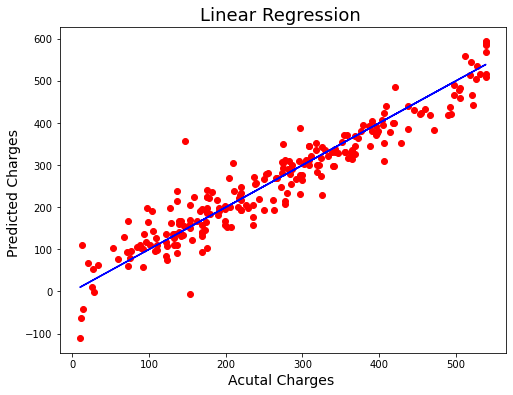

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [137]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm
import warnings
warnings.filterwarnings('ignore')


In [138]:
lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [139]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.05348347233120955

In [140]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.05348347233120955)

In [141]:
lasso_reg.score(x_train,y_train)#Testing Score

0.9018768409516426

In [142]:
lasso_reg.score(x_test,y_test) #Testing Score

0.9014646767514141

# Using Ridge Regression Model.

In [143]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [144]:
ridgecv.alpha_

0.030999999999999996

In [145]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.030999999999999996)

In [146]:
ridge_model.score(x_train,y_train)#Training Score

0.9018878495469989

In [147]:
ridge_model.score(x_test,y_test)#Testing Score

0.901300226127965

# Model Evaluation

In [148]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [149]:
y_pred=ridge_model.predict(x_test)

In [150]:
#MAE
mean_absolute_error(y_test,y_pred)

32.450306050931566

In [151]:
#MSE
mean_squared_error(y_test,y_pred)

1865.1610432956481

In [152]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

43.18751026970237

# Lets Plot With XGBOOST

In [153]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

In [154]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=i)
    xgb.fit(x_train,y_train)
    x_pred=xgb.predict(x_train)
    y_pred=xgb.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9999585855099768
 At random state 0 , the testing accuracy is :- 0.8886252121536459


 At random state 1 , the Training accuracy is :- 0.9999648971592505
 At random state 1 , the testing accuracy is :- 0.8492419719598618


 At random state 2 , the Training accuracy is :- 0.9999657315744652
 At random state 2 , the testing accuracy is :- 0.8910036599949818


 At random state 3 , the Training accuracy is :- 0.9999749234768023
 At random state 3 , the testing accuracy is :- 0.8541556353153453


 At random state 4 , the Training accuracy is :- 0.9999591782520167
 At random state 4 , the testing accuracy is :- 0.9015221021914199


 At random state 5 , the Training accuracy is :- 0.9999661953509476
 At random state 5 , the testing accuracy is :- 0.8928071258544245


 At random state 6 , the Training accuracy is :- 0.9999699625761637
 At random state 6 , the testing accuracy is :- 0.8837916579097469


 At random state 7 , the Training accurac

For XGBOOST we select Random State - 95

In [155]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=95)

In [156]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [157]:
#Lets Print Training Score
pred_train=xgb.predict(x_train)
print(r2_score(y_train,pred_train))

0.9999610361640991


In [158]:
#Lets Print Testing Score
train_pred=xgb.predict(x_test)
print(r2_score(y_test,train_pred))

0.9171206165286743


# Cross Validation of the Model

In [159]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(xgb,scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.8643789334355003 and accuracy for training is -1.034887893259473 and accuracy for testing is -1.1512366610081801


At cross fold 3 the CV Score is 0.8682033979737384 and accuracy for training is -1.034887893259473 and accuracy for testing is -1.1512366610081801


At cross fold 4 the CV Score is 0.8888061010514327 and accuracy for training is -1.034887893259473 and accuracy for testing is -1.1512366610081801


At cross fold 5 the CV Score is 0.8780205399420108 and accuracy for training is -1.034887893259473 and accuracy for testing is -1.1512366610081801


At cross fold 6 the CV Score is 0.8765111661995179 and accuracy for training is -1.034887893259473 and accuracy for testing is -1.1512366610081801


At cross fold 7 the CV Score is 0.8916774182820904 and accuracy for training is -1.034887893259473 and accuracy for testing is -1.1512366610081801


At cross fold 8 the CV Score is 0.8848758342785137 and accuracy for training is -1.034887893259473 and acc

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

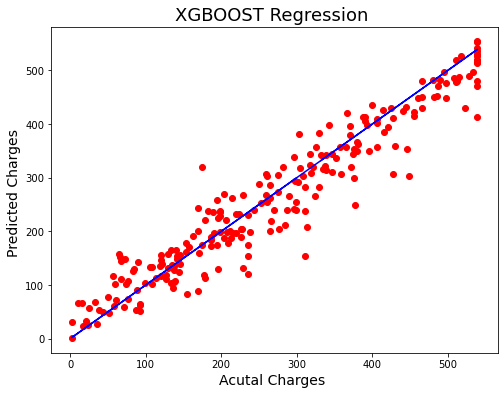

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("XGBOOST Regression ",fontsize=18)
plt.savefig('xgb.png')
plt.show()

# Lets Plot With Ada Boost Regressor

In [161]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [162]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=i)
    ada.fit(x_train,y_train)
    x_pred=ada.predict(x_train)
    y_pred=ada.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.8794990021649202
 At random state 0 , the testing accuracy is :- 0.8589649380358851


 At random state 1 , the Training accuracy is :- 0.8805132783280856
 At random state 1 , the testing accuracy is :- 0.8287814855210253


 At random state 2 , the Training accuracy is :- 0.8839578891138544
 At random state 2 , the testing accuracy is :- 0.8515731929091468


 At random state 3 , the Training accuracy is :- 0.8820944328629498
 At random state 3 , the testing accuracy is :- 0.8243653529913105


 At random state 4 , the Training accuracy is :- 0.8834385080015139
 At random state 4 , the testing accuracy is :- 0.8659130087490287


 At random state 5 , the Training accuracy is :- 0.885224395366638
 At random state 5 , the testing accuracy is :- 0.8375312173806226


 At random state 6 , the Training accuracy is :- 0.8847261978424457
 At random state 6 , the testing accuracy is :- 0.8493613350198557


 At random state 7 , the Training accuracy

For Ada Boost Regressor we select Random State - 0

In [163]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=0)

In [164]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [165]:
#Lets Print Training Score
pred_train=ada.predict(x_train)
print(r2_score(y_train,pred_train))

0.8777938928491866


In [166]:
#Lets Print Testing Score
train_pred=ada.predict(x_test)
print(r2_score(y_test,train_pred))

0.8567595163831578


# Cross Validation of the Model

In [167]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.8402443711984287 and accuracy for training is -0.6970817962860811 and accuracy for testing is -0.6239448034860515


At cross fold 3 the CV Score is 0.841524135228002 and accuracy for training is -0.6970817962860811 and accuracy for testing is -0.6239448034860515


At cross fold 4 the CV Score is 0.84151641760524 and accuracy for training is -0.6970817962860811 and accuracy for testing is -0.6239448034860515


At cross fold 5 the CV Score is 0.8397829960925938 and accuracy for training is -0.6970817962860811 and accuracy for testing is -0.6239448034860515


At cross fold 6 the CV Score is 0.8426425713325809 and accuracy for training is -0.6970817962860811 and accuracy for testing is -0.6239448034860515


At cross fold 7 the CV Score is 0.8392897265835628 and accuracy for training is -0.6970817962860811 and accuracy for testing is -0.6239448034860515


At cross fold 8 the CV Score is 0.8369948342683017 and accuracy for training is -0.6970817962860811 and

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

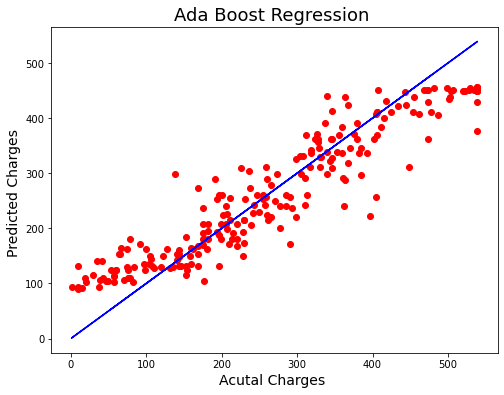

In [168]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Ada Boost Regression ",fontsize=18)
plt.savefig('ada.png')
plt.show()

# Lets Plot With Gradient Boosting Regressor

In [169]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [170]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=i)
    gbr.fit(x_train,y_train)
    x_pred=gbr.predict(x_train)
    y_pred=gbr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9672047985324607
 At random state 0 , the testing accuracy is :- 0.9213544500929867


 At random state 1 , the Training accuracy is :- 0.9710984369817358
 At random state 1 , the testing accuracy is :- 0.872977214531185


 At random state 2 , the Training accuracy is :- 0.9676045709891724
 At random state 2 , the testing accuracy is :- 0.8986952897355338


 At random state 3 , the Training accuracy is :- 0.9680372941688695
 At random state 3 , the testing accuracy is :- 0.8883429784710953


 At random state 4 , the Training accuracy is :- 0.9672807316694182
 At random state 4 , the testing accuracy is :- 0.9023685427741172


 At random state 5 , the Training accuracy is :- 0.96696656481689
 At random state 5 , the testing accuracy is :- 0.9090025616473637


 At random state 6 , the Training accuracy is :- 0.965794237901171
 At random state 6 , the testing accuracy is :- 0.9122006157886453


 At random state 7 , the Training accuracy is

In [171]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=24)

In [172]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [173]:
#Lets Print Training Score
pred_train=gbr.predict(x_train)
print(r2_score(y_train,pred_train))

0.9661204218689962


In [174]:
#Lets Print Testing Score
train_pred=gbr.predict(x_test)
print(r2_score(y_test,train_pred))

0.9297653298310319


#  Cross Validation of the Model

In [175]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(gbr,scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.8859265941141109 and accuracy for training is -1.0237385967185353 and accuracy for testing is -0.7651187473282974


At cross fold 3 the CV Score is 0.8998514506229318 and accuracy for training is -1.0237385967185353 and accuracy for testing is -0.7651187473282974


At cross fold 4 the CV Score is 0.8971262317876919 and accuracy for training is -1.0237385967185353 and accuracy for testing is -0.7651187473282974


At cross fold 5 the CV Score is 0.9007749290560717 and accuracy for training is -1.0237385967185353 and accuracy for testing is -0.7651187473282974


At cross fold 6 the CV Score is 0.9014323504661085 and accuracy for training is -1.0237385967185353 and accuracy for testing is -0.7651187473282974


At cross fold 7 the CV Score is 0.9024137943689937 and accuracy for training is -1.0237385967185353 and accuracy for testing is -0.7651187473282974


At cross fold 8 the CV Score is 0.9019566606008691 and accuracy for training is -1.0237385967185353 

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

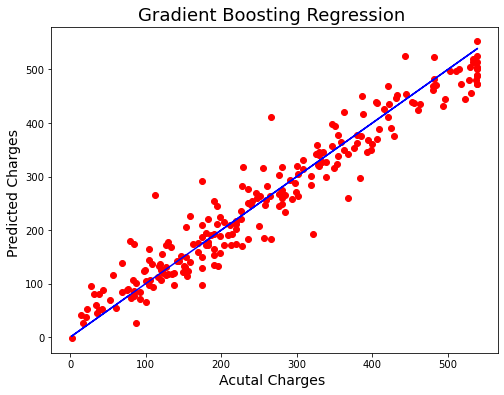

In [176]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Gradient Boosting Regression ",fontsize=18)
plt.savefig('gbr.png')
plt.show()

# Lets Plot With Random Forest

In [177]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [178]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9829850755114631
 At random state 0 , the testing accuracy is :- 0.9082848824691369


 At random state 1 , the Training accuracy is :- 0.9847022608697349
 At random state 1 , the testing accuracy is :- 0.8652354624912917


 At random state 2 , the Training accuracy is :- 0.983659501470441
 At random state 2 , the testing accuracy is :- 0.893766753303519


 At random state 3 , the Training accuracy is :- 0.9848801486877775
 At random state 3 , the testing accuracy is :- 0.8663349652519461


 At random state 4 , the Training accuracy is :- 0.9828543202321433
 At random state 4 , the testing accuracy is :- 0.9017196884174392


 At random state 5 , the Training accuracy is :- 0.9835816876910284
 At random state 5 , the testing accuracy is :- 0.8923556048792978


 At random state 6 , the Training accuracy is :- 0.9839281446821107
 At random state 6 , the testing accuracy is :- 0.8900167917642964


 At random state 7 , the Training accuracy 

Here we select random state 95

In [179]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=95)

In [180]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [181]:
#Lets Print Training Score
pred_train=rf.predict(x_train)
print(r2_score(y_train,pred_train))

0.9823826572087677


In [182]:
#Lets Print Testing Score
train_pred=rf.predict(x_test)
print(r2_score(y_test,train_pred))

0.9155465853013497


# Cross Validation of the Model

In [183]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.8687395661695012 and accuracy for training is -0.932285375709154 and accuracy for testing is -1.0493496842042287


At cross fold 3 the CV Score is 0.8768918164047209 and accuracy for training is -0.932285375709154 and accuracy for testing is -1.0493496842042287


At cross fold 4 the CV Score is 0.8809053412074561 and accuracy for training is -0.932285375709154 and accuracy for testing is -1.0493496842042287


At cross fold 5 the CV Score is 0.8836838553198202 and accuracy for training is -0.932285375709154 and accuracy for testing is -1.0493496842042287


At cross fold 6 the CV Score is 0.8842156067207609 and accuracy for training is -0.932285375709154 and accuracy for testing is -1.0493496842042287


At cross fold 7 the CV Score is 0.8849162633011469 and accuracy for training is -0.932285375709154 and accuracy for testing is -1.0493496842042287


At cross fold 8 the CV Score is 0.8861896286695183 and accuracy for training is -0.932285375709154 and acc

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

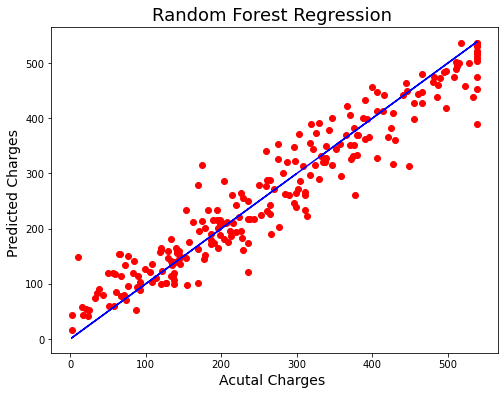

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Random Forest Regression ",fontsize=18)
plt.savefig('rf.png')
plt.show()

# We got accuracy So we dont do the hyperparameter tuning.

In [185]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [186]:
parameter={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':range(10,15),
          'min_samples_split':range(9,10),
          'min_samples_leaf':range(5,6)}

In [187]:
rf = RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 9}


In [188]:
rf=RandomForestRegressor(criterion='mse',max_features='log2',max_depth=11,min_samples_leaf=5,min_samples_split=9)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)
rfs_score=cross_val_score(rf,scaled,y,cv=5)
rfc=rfs_score.mean()
print('Cross Val Score',rfc*100)

R2 Score 89.15756215373236
Cross Val Score 86.55687675094133


# Plot Actual VS Predicted

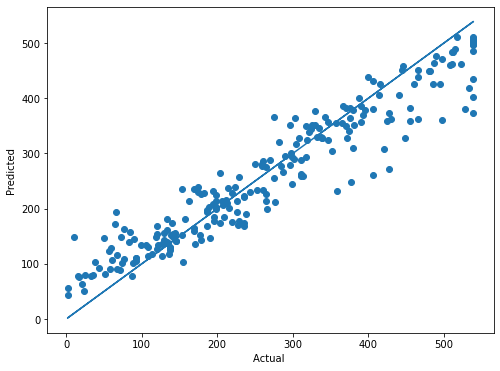

In [189]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision)
plt.plot(y_test,y_test)
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.show()

# Lets Save Our Model

In [190]:
import pickle
filename=('Housing')
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [226]:
loaded_model=pickle.load(open('Housing','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

89.15756215373236


In [227]:
# Flip Robo